# Bank Customer Churn Analysis

## Materials

* [Dashboard](https://public.tableau.com/views/_16938672598280/sheet1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)
* [Presentation](https://disk.yandex.ru/i/cdAKRbsBTtKixw)

## Project Description

**Client:**

Regional bank "Metanprom"

**Purpose of the study:**

Perform a customer analysis for the regional bank to pinpoint customer segments that exhibit a propensity to discontinue their utilization of the bank's services. These segments can be characterized by specific profiles based on 2-3 distinguishing features.

**Research objectives:**

1. Data exploration

2. Data preprocessing

3. Exploratory Data Analysis (EDA)

4. Interim conclusion

5. Statistical analysis and hypothesis testing

6. Conclusion and recommendations

**Dataset Columns:**

- USERID - user identifier,
- score - credit scoring points,
- city - city,
- gender - gender,
- age - age,
- equity - number of owned objects,
- balance - account balance,
- products - number of products used by the client,
- credit_card - presence of a credit card (yes/no),
- last_activity - active client (yes/no),
- EST_SALARY - estimated salary of the client,
- churn - churn status (whether the client left or not).

## Data loading and exploration

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st 
import plotly.express as px
from plotly import graph_objects as go
import warnings; warnings.filterwarnings(action = 'ignore')
import matplotlib.gridspec as gridspec

palette = sns.color_palette('muted')
warnings.filterwarnings('ignore')

In [62]:
# remove the limit on the number of columns
pd.set_option('display.max_columns', 50)

# remove the restriction on column width
pd.set_option('display.max_colwidth', 120)

# ignore warnings
pd.set_option('chained_assignment', 'warn')
warnings.simplefilter(action='ignore', category=FutureWarning)

# set a limit on displaying decimal places
pd.options.display.float_format = '{:,.2f}'.format

# set the chart style
sns.set(rc={'figure.dpi':200, 'savefig.dpi':300})   
sns.set_context('notebook') 
sns.set_style('ticks') 
sns.set_style('whitegrid')

### Dataset loading

In [63]:
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
except:
    data = pd.read_csv('/datasets/bank_scrooge.csv')

In [64]:
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,"67,353.16",1


### Data exploration

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


The original dataset contains 10,000 rows and 12 columns. The columns contain basic information about bank clients (city, gender, age, account balance, etc.). There are gaps in the age and balance columns. It might be better to change the score and age column types to integer to save processing power.

In [66]:
for c in data.columns:
    print('Column', c)
    print('List of unique values:',data[c].unique())
    print('Total unique values:', data[c].nunique())
    print()

Column USERID
List of unique values: [183012 146556 120722 ... 115639 148700  96267]
Total unique values: 9927

Column score
List of unique values: [ 850.  861.  892.  866.  730.  856.  807.  825.  923.  906.  927.  921.
  845.  837.  815.  731.  829.  793.  876.  922.  772.  896.  871.  732.
  898.  806.  766.  776.  868.  946.  828.  786.  944.  863.  822.  794.
  924.  811.  814.  956.  935.  826.  849.  901.  893.  792.  888.  831.
  748.  820.  860.  914.  930.  948.  789.  737.  812.  933.  809.  749.
  873.  859.  950.  937.  835.  768.  767.  785.  846.  750.  816.  894.
  891.  788.  758.  787.  821.  855.  779.  791.  838.  971.  797.  841.
  915.  985.  870.  897.  763.  774.  686. 1000.  875.  819.  869.  854.
  810.  761.  802.  958.  917.  745.  736.  908.  928.  884.  853.  780.
  726.  881.  975.  852.  965.  899.  890.  836.  818.  880.  795.  916.
  775.  902.  918.  842.  771.  895.  801.  721.  966.  804.  885.  986.
  753.  832.  979.  798.  754.  756.  823.  658. 

The USERID column has 9927 unique values out of a total of 10000 rows in the column. This indicates duplicates, which will be discussed next. It is also possible that there are duplicates in the EST_SALARY column, but this requires additional checking.

## Data preprocessing

### Changing Data Types

In [67]:
# changing the data type of the age and score columns to integer:

data['age'] = pd.array(data['age'], dtype=pd.Int64Dtype())
data['score'] = pd.array(data['score'], dtype=pd.Int64Dtype())

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  Int64  
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   Int64  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: Int64(2), float64(2), int64(6), object(2)
memory usage: 957.2+ KB


### Renaming Columns

In [69]:
# converting column names to lower case
data.columns = map(str.lower, data.columns)

# giving the column an easy-to-read name
data = data.rename(columns={"userid": "user_id"})

### Finding exact duplicates

In [70]:
data.duplicated().sum()

0

### Finding partial duplicates

Upon analysis, we observed that the number of unique user identifiers (user_id) is lower than the total number of completed rows in the column. This suggests the presence of duplicates in this column, prompting further investigation and raising questions.

In [71]:
data['user_id'].duplicated().sum()

73

In [72]:
user_id_duplicates = data[data['user_id'].duplicated()]['user_id'].unique()
data[data['user_id'].isin(user_id_duplicates)].sort_values('user_id').head(20)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883,Рыбинск,Ж,55,1,"362,756.49",3,0,1,"175,920.48",1
7694,116540,887,Ярославль,Ж,38,0,NaN,1,0,1,"119,247.61",0
7542,117943,880,Ярославль,Ж,40,0,NaN,1,1,0,"137,718.93",0
4866,117943,855,Рыбинск,Ж,32,6,"1,036,832.93",4,1,1,"107,792.71",1
5896,120258,905,Ярославль,М,30,0,NaN,1,1,1,"146,427.96",0
5863,120258,908,Рыбинск,Ж,38,4,"2,213,581.63",2,0,1,"160,327.77",1
1411,123461,829,Ярославль,Ж,59,0,"96,222.44",2,0,1,"102,771.55",1
8638,123461,934,Рыбинск,М,34,0,NaN,2,1,0,"291,619.27",0
8164,124450,859,Ярославль,Ж,38,6,"516,811.20",1,1,1,"95,144.63",1
9775,124450,758,Рыбинск,Ж,36,0,"73,574.07",2,0,1,"79,963.59",0


We can assume that this phenomenon is associated with a situation where the same client is registered in two different bank branches. However, it is worth noting that these clients are of different ages and genders. Additional parameters such as account balance and churn trends are also inconsistent. Therefore, we decided to keep these duplicate records because when aggregating data using the count function, it will not affect the correctness of the results.

To find out the reasons for such repetitions of unique identifiers, we intend to transfer information about duplicates and the formulated problem to the IT department.

We'll look at the duplicates in the est_salary column:

In [73]:
data['est_salary'].duplicated().sum()

4

In [74]:
salary_duplicates = data[data['est_salary'].duplicated()]['est_salary'].unique()
data[data['est_salary'].isin(salary_duplicates)].sort_values('est_salary')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
513,120675,832,Рыбинск,Ж,37,2,"430,220.82",2,1,1,"49,742.87",0
2442,152240,861,Ростов,Ж,60,3,"599,546.80",2,0,1,"49,742.87",0
4642,133759,831,Ярославль,М,50,5,"560,145.71",2,1,1,"108,250.17",0
6050,202056,979,Рыбинск,Ж,30,2,"820,572.71",3,1,0,"108,250.17",0
884,214629,772,Ярославль,М,53,2,"335,295.37",2,1,1,"176,348.18",0
8376,217828,947,Ярославль,М,30,5,"393,215.11",1,1,0,"176,348.18",0
4343,141945,929,Рыбинск,М,33,0,NaN,1,1,0,"381,868.89",0
9457,141945,929,Ярославль,М,<NA>,0,NaN,1,1,0,"381,868.89",0


Based on the information provided, we can conclude that these are entirely different individuals. The only issue is that their salaries match to the nearest hundredth

### Handling outlier values

In [75]:
# finding out how many clients do not use banking products
products = data[data["products"] == 0]
products

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962,Рыбинск,Ж,79,3,NaN,0,0,0,"25,063.96",1


In [76]:
# deleting so as not to distort the graphs
user_id_to_delete = 147837
data = data[data['user_id'] != user_id_to_delete]

### Processing missing data

Let's see what the ratio of gaps to data in the dataset columns is:

In [77]:
pd.DataFrame(round(data.isna().mean()*100,2)).style.background_gradient(cmap='YlOrRd')

,0
user_id,0.000000
score,0.000000
city,0.000000
gender,0.000000
age,0.260000
equity,0.000000
balance,22.940000
products,0.000000
credit_card,0.000000
last_activity,0.000000


The percentage of missing values ​​in the "age" column is less than 1%, which allows us to exclude rows with missing data in this column. Presumably, the reason for the omissions is due to technical anomalies.

In [78]:
# removing gaps in the age column
data = data[data.age.notna()]

We'll check the degree of correlation of the number of gaps in the balance column with other data in order to justify the impossibility of filling them correctly with one or more values.

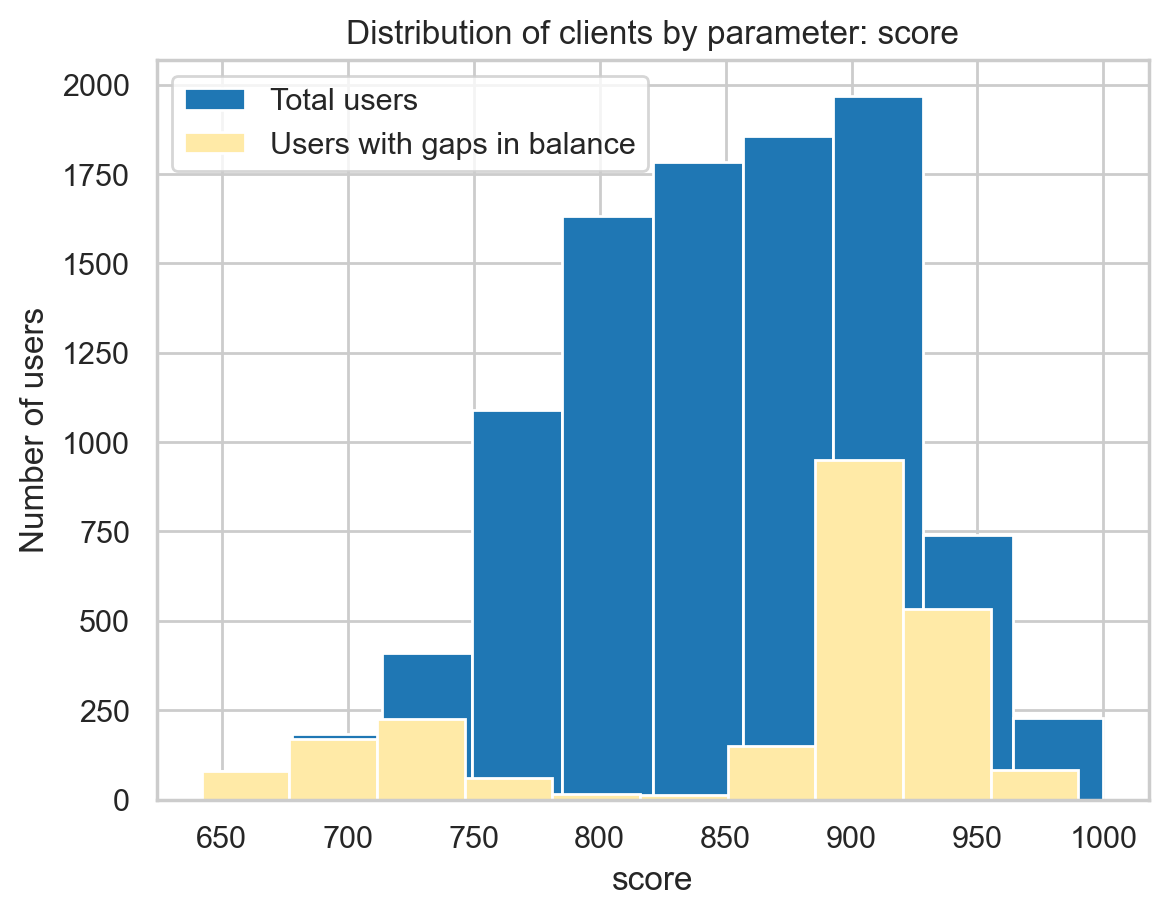

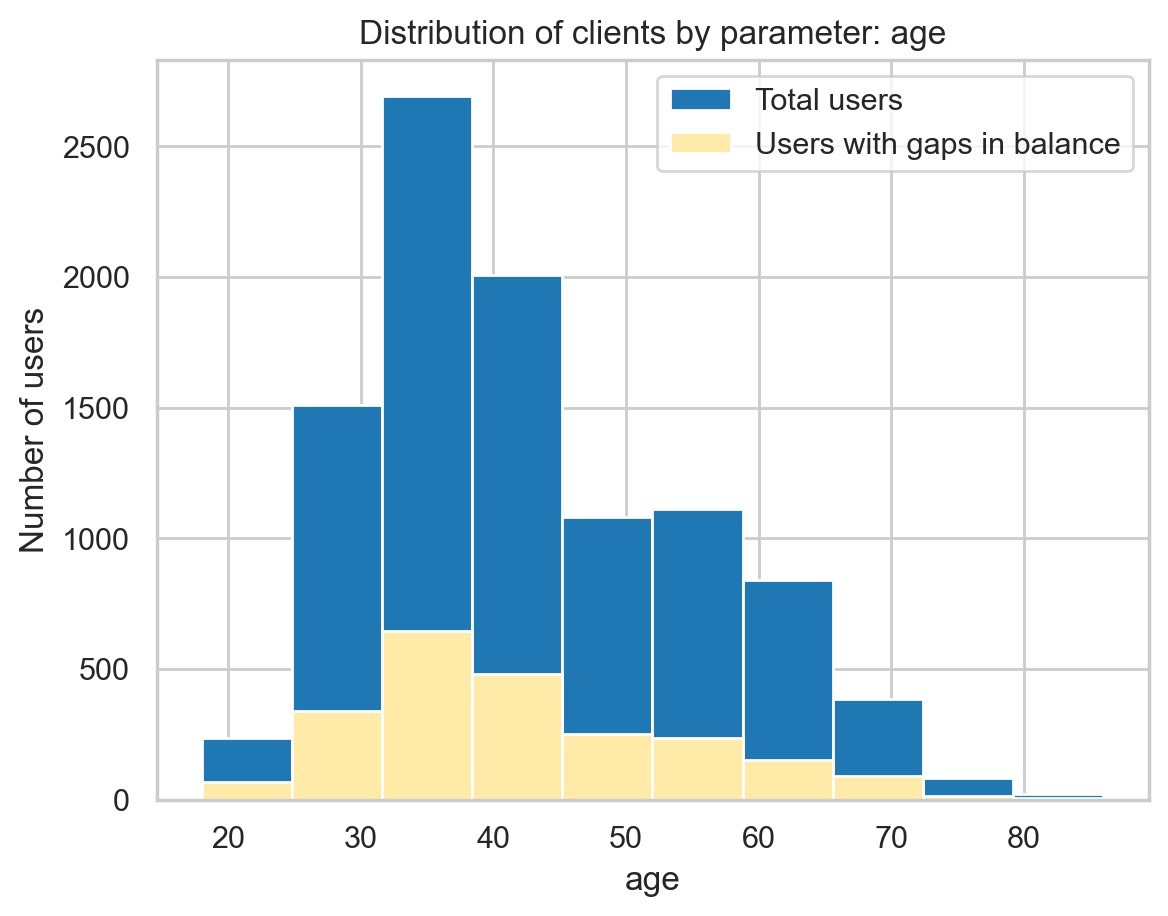

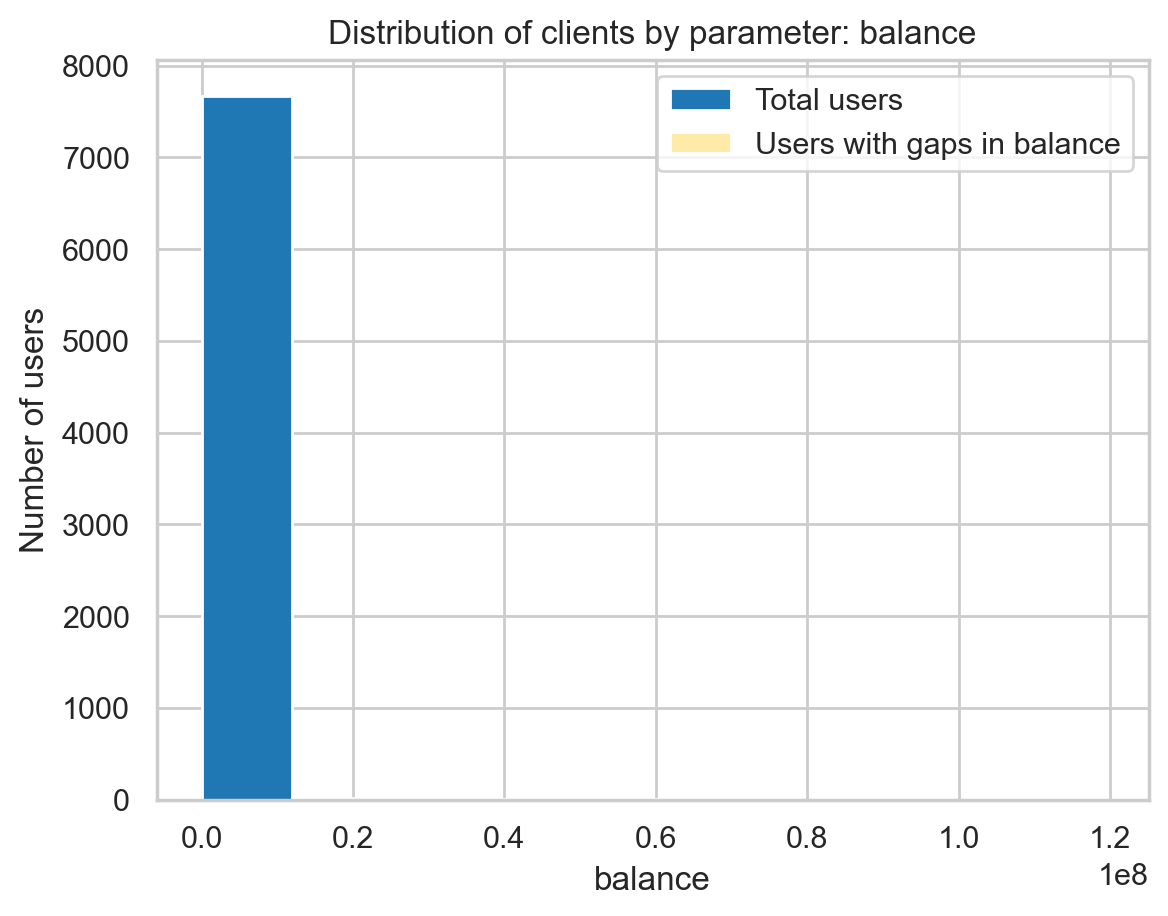

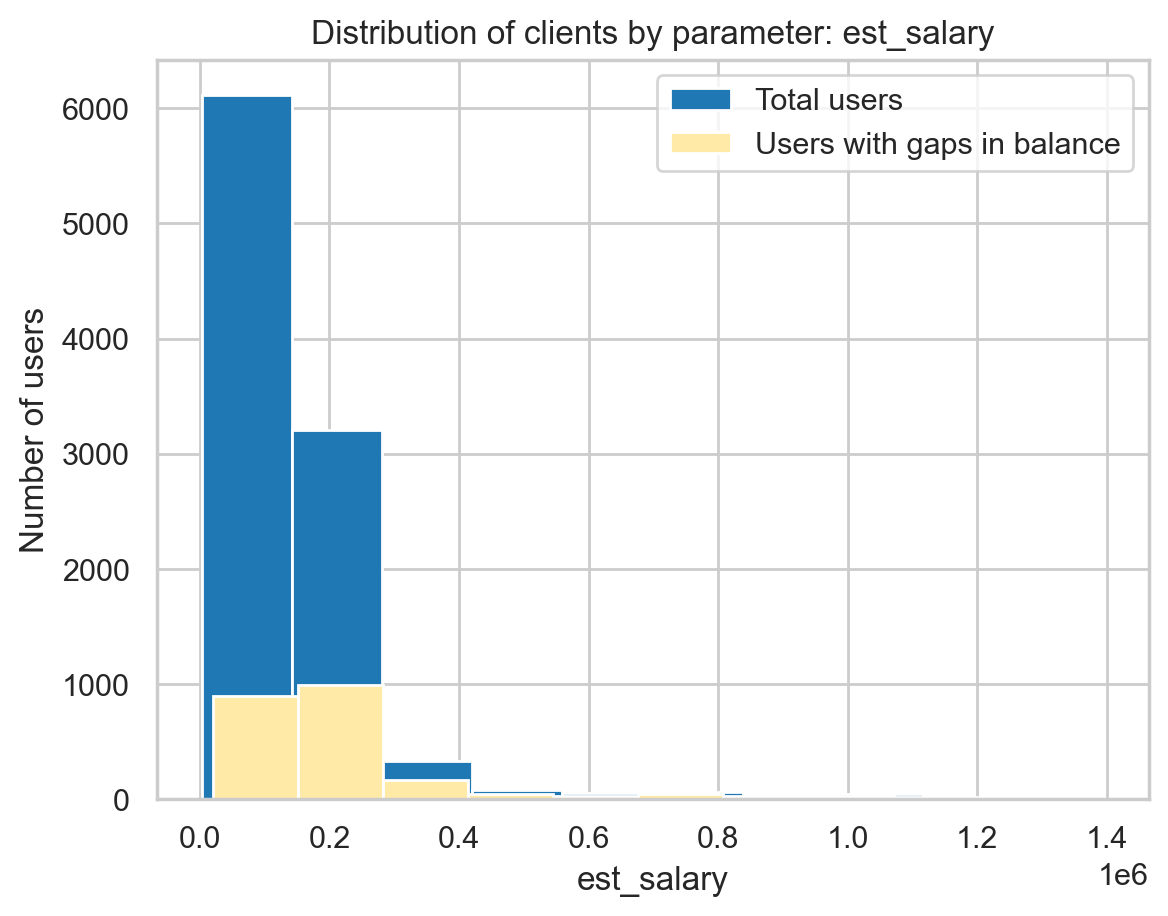

In [79]:
balance_null = data[data['balance'].isna()]

# highlighting categorical features for visualization
categorical = ['gender', 'city', 'credit_card', 'last_activity', 'churn', 'equity', 'products']

# highlighting quantitative features for visualization 
quantitative = ['score', 'age', 'balance',  'est_salary']


for c in quantitative:
    
    data[c].hist(color='#1f77b4',label='Total users')
    balance_null[c].hist(color='#ffeaa7',label='Users with gaps in balance')

    # Adding axis labels
    plt.title(f'Distribution of clients by parameter: {c}', fontsize = 12)
    plt.xlabel(c)
    plt.ylabel('Number of users')

    # Adding a legend
    plt.legend()

    # Displaying a histogram
    plt.show()

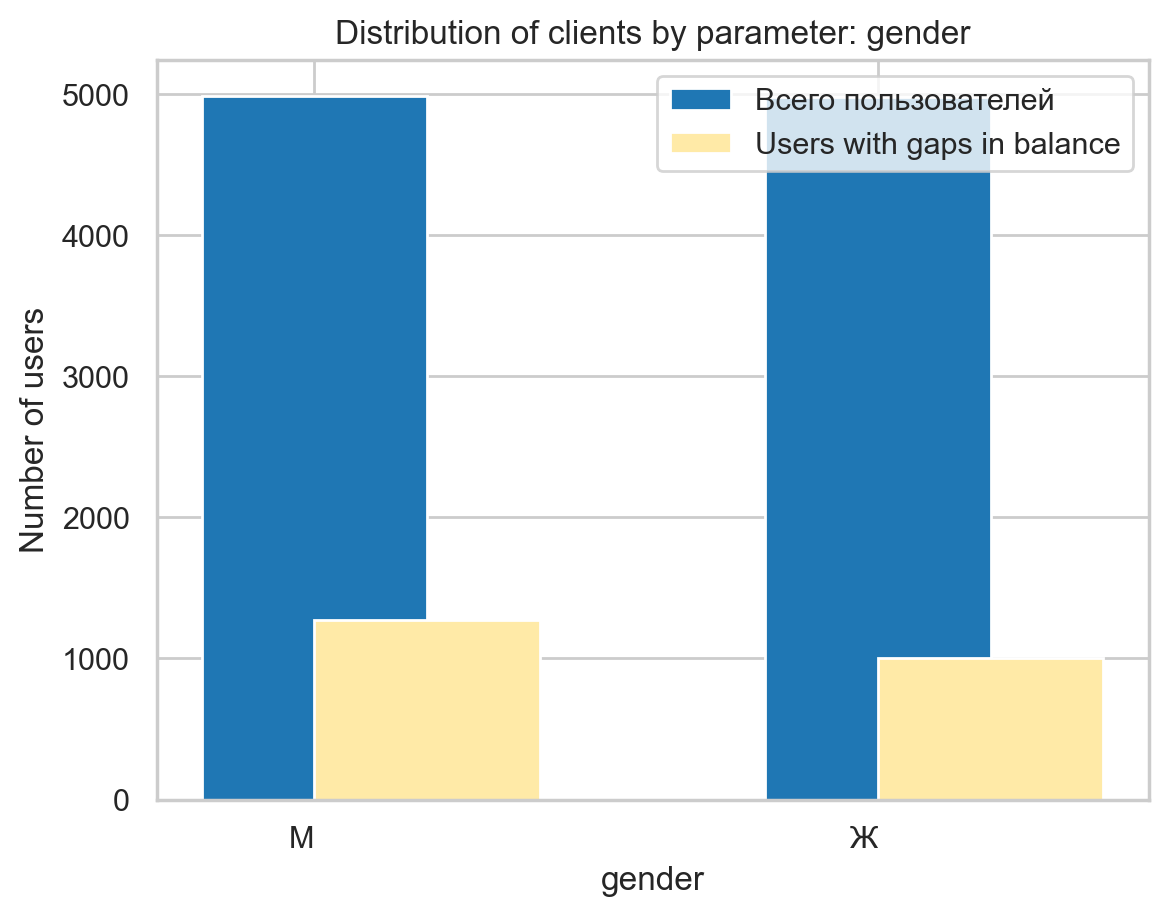

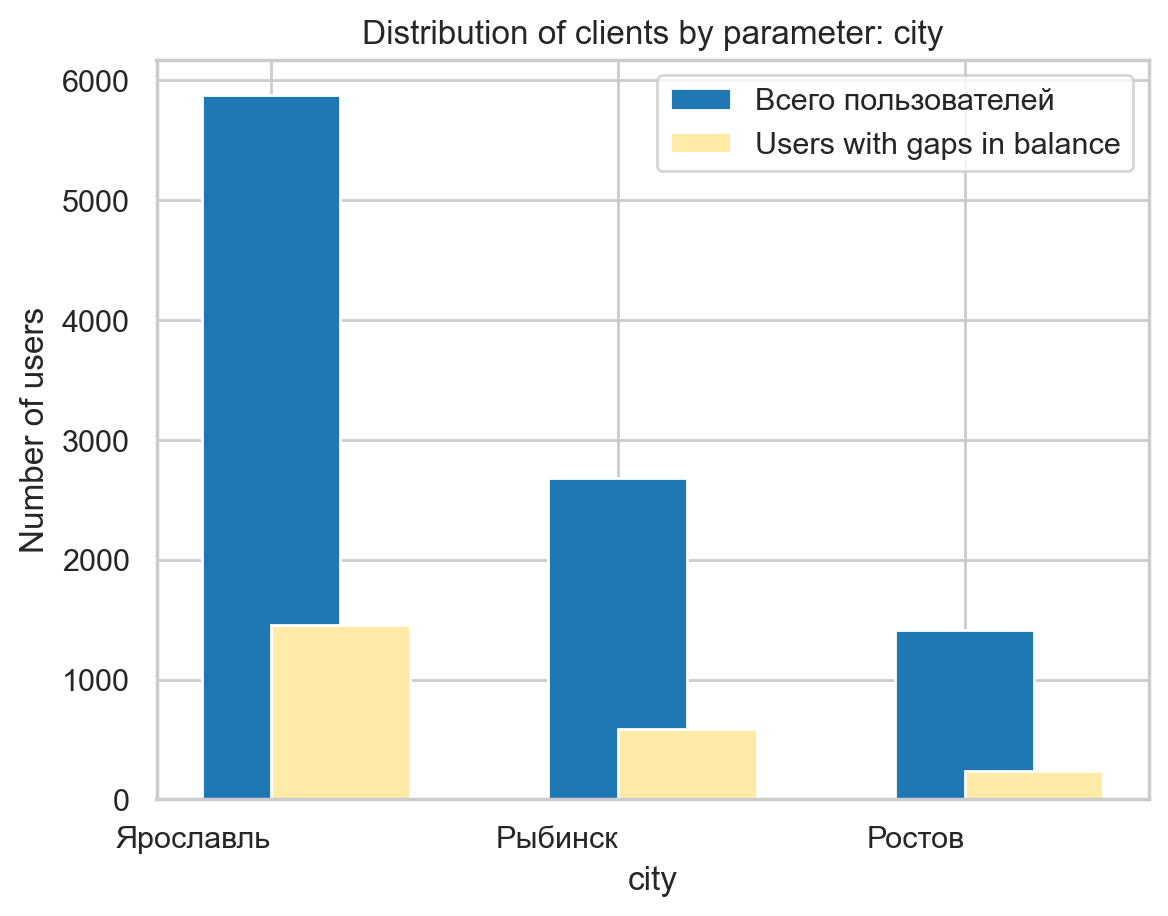

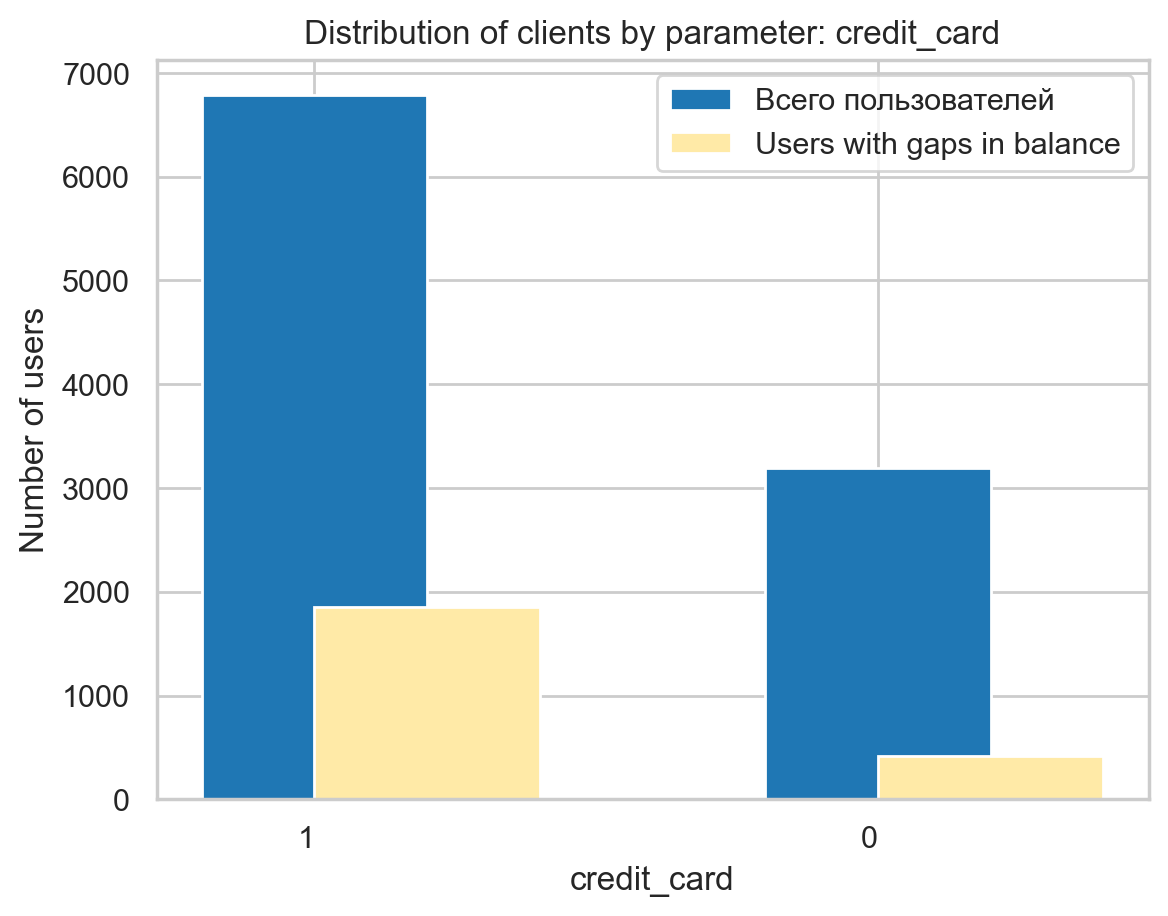

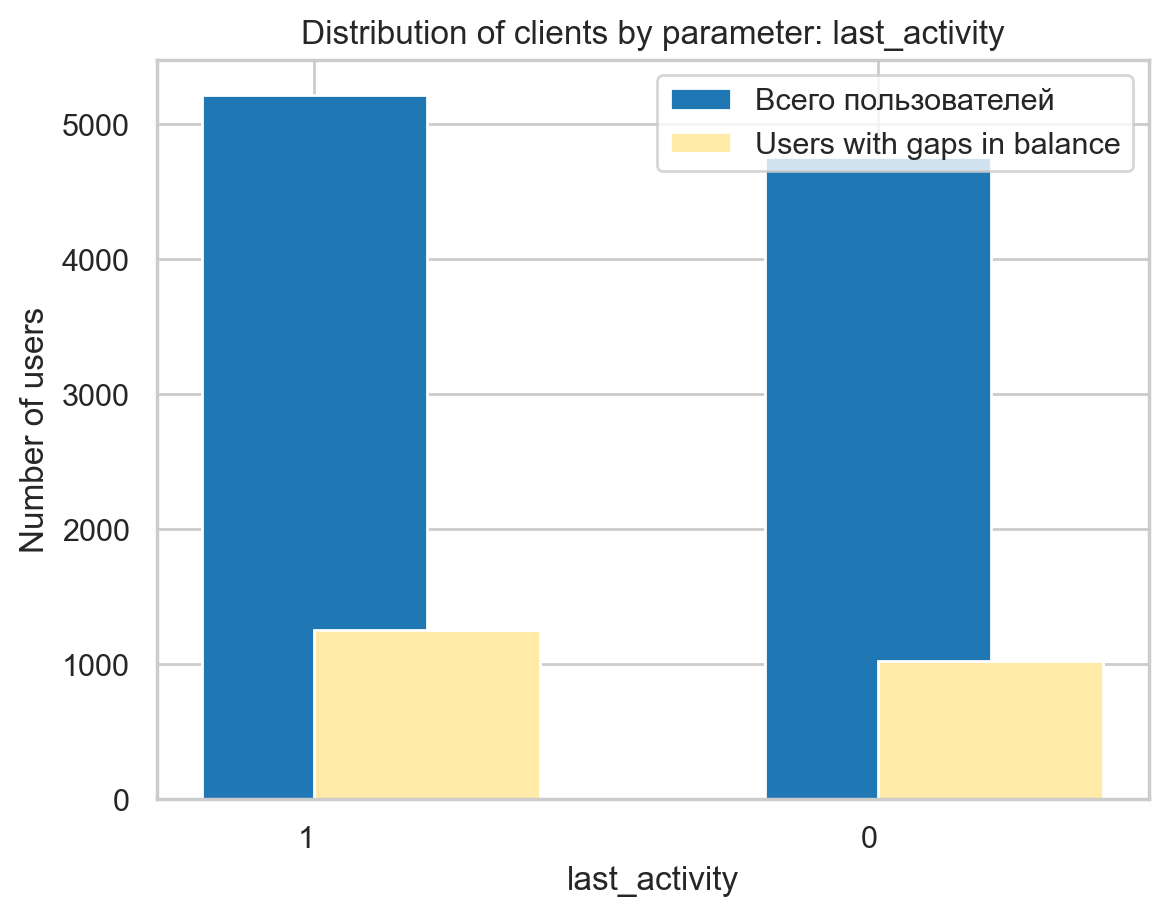

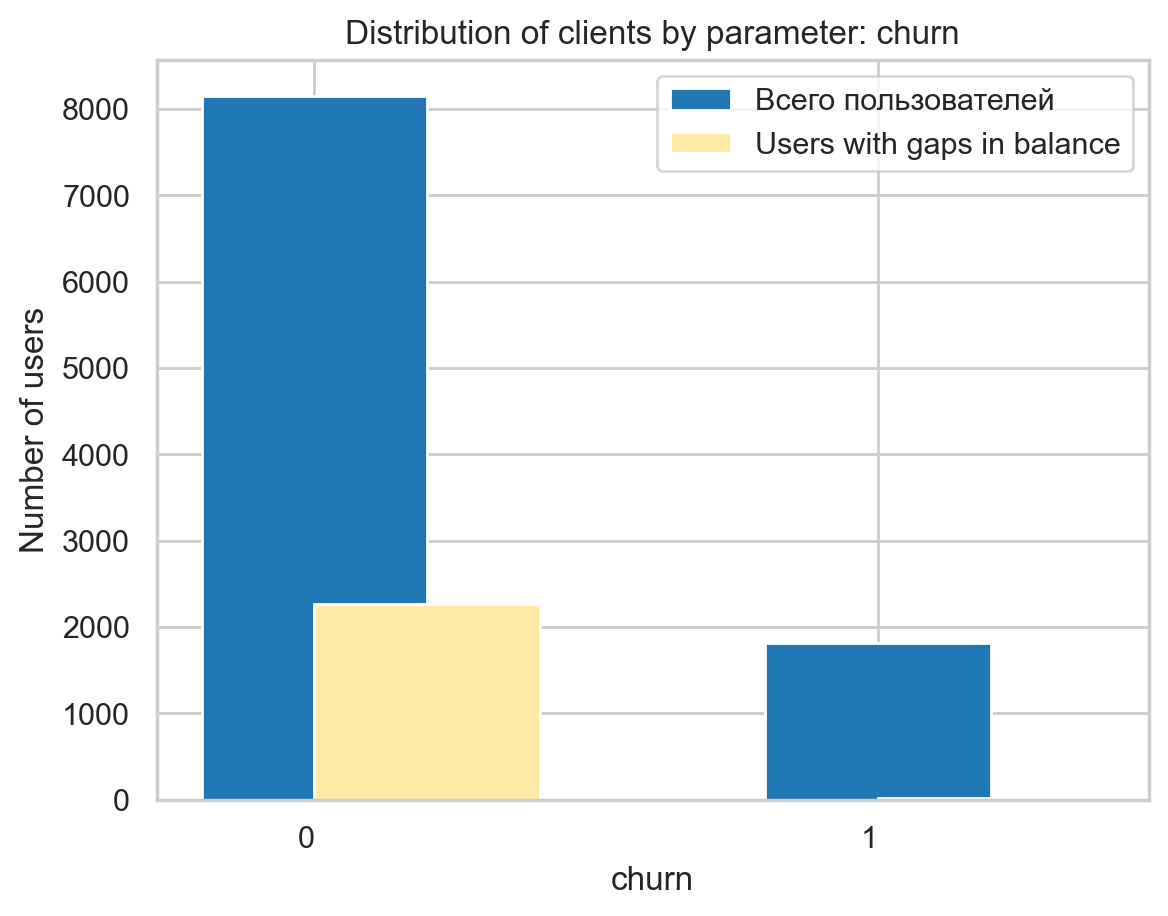

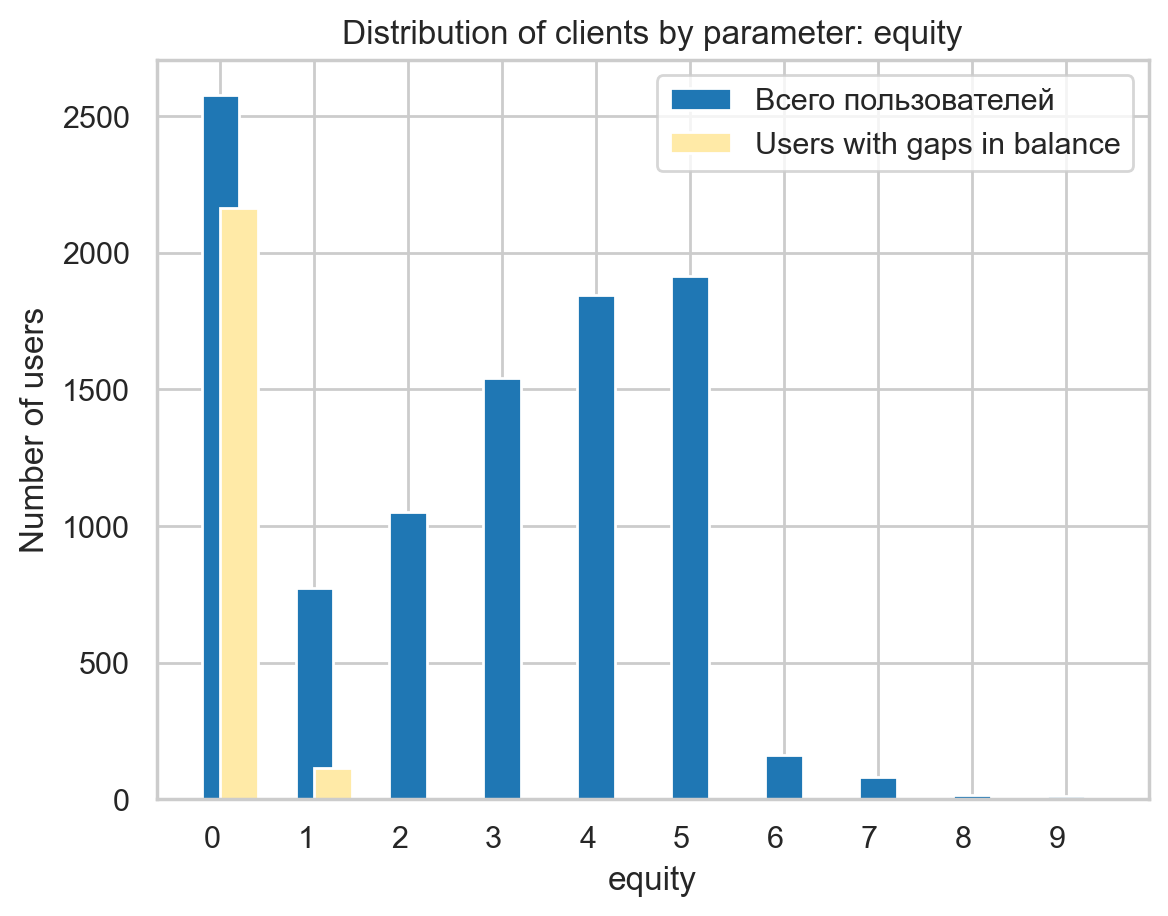

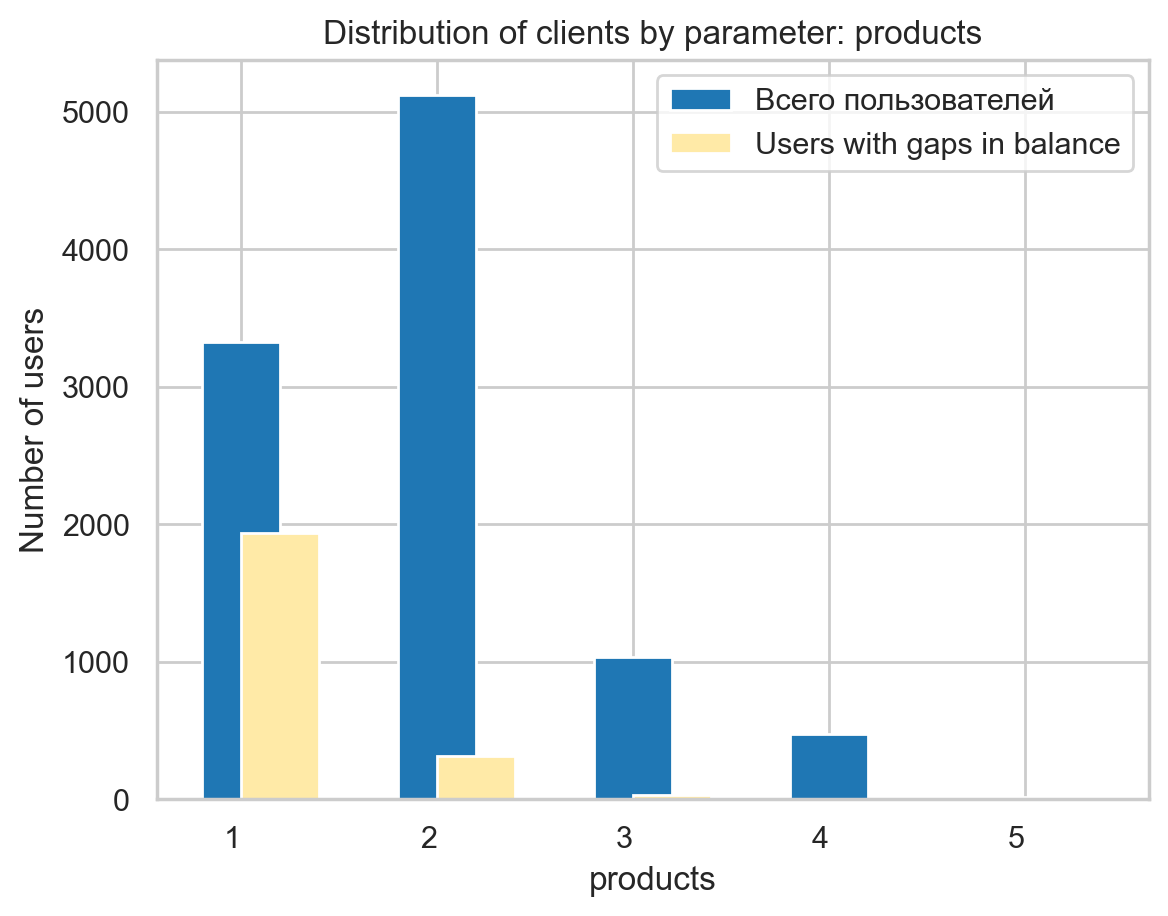

In [80]:
for c in categorical:
    # counting the number of occurrences of each category in a column for all users
    all_users_counts = data[c].value_counts()
    
    # counting the number of occurrences of each category in the column for users with a missing balance
    missing_balance_counts = balance_null[c].value_counts()

    # get unique categories for the X axis
    unique_categories = all_users_counts.index.union(missing_balance_counts.index)

    # create an empty list to store counters for each category
    all_users_counts_list = []
    missing_balance_counts_list = []

    for category in unique_categories:
        all_users_counts_list.append(all_users_counts.get(category, 0))
        missing_balance_counts_list.append(missing_balance_counts.get(category, 0))


    x = range(len(unique_categories))

 
    plt.bar(x, all_users_counts_list, width=0.4, color='#1f77b4', label='Всего пользователей', align='center')

  
    plt.bar(x, missing_balance_counts_list, width=0.4, color='#ffeaa7', label='Users with gaps in balance', align='edge')

    # Adding axis labels
    plt.xticks(x, unique_categories, ha='right')
    plt.xlabel(c)
    plt.ylabel('Number of users')
    plt.title(f'Distribution of clients by parameter: {c}', fontsize=12)

    # Adding a legend
    plt.legend()

    plt.show()

Let's look at the gaps in the "balance" column, taking into account the generally accepted classification of types of gaps. Based on the distribution of gaps across the parameters “score”, “gender”, “products” and “churn”, we can conclude that these gaps are of the MNAR (Missing Not At Random) type:

According to credit scoring, users with low scores (less than 750) tend to have gaps in the “balance” column, which may indicate a zero balance. There are also many absences among clients with high scores (900-950 points). However, without additional information about the technical details, no definite conclusions can be drawn.

In terms of gender, men have more gaps in the "balance" column.

Gaps are mainly found among clients using 1-2 bank products.

The largest number of gaps is observed among clients from Yaroslavl.

Gaps are found among clients who do not own property.

Gaps are observed only for clients who remain at the bank.

Based on this information, we can conclude that gaps in the "balance" column are data dependent and cannot be filled with the same value, as this will distort the statistics. Therefore, it was decided not to fill in the blanks in this column.

### Data Encoding

Clients in the dataset have two text parameters:

- gender (M - male or F - female)
- city (Rostov, Rybinsk, Yaroslavl)

To be able to look for dependencies between churn and these parameters, they need to be coded.

We'll use the get_dummies function. The function will create indicator variables (1 or 0), that is, it will transform the value of each parameter into a new column and assign the value of 1 or 0 (True / False) to the column.

In [81]:
# leaving copies of the original columns
data['city_copy'] = data['city'].copy()
data['gender_copy'] = data['gender'].copy()

# encoding the columns we need
data = pd.get_dummies(data,columns=['city','gender'])
data.head()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_copy,gender_copy,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,183012,850,25,1,"59,214.82",2,0,1,"75,719.14",1,Рыбинск,Ж,0,1,0,1,0
1,146556,861,37,5,"850,594.33",3,1,0,"86,621.77",0,Рыбинск,Ж,0,1,0,1,0
2,120722,892,30,0,NaN,1,1,1,"107,683.34",0,Рыбинск,Ж,0,1,0,1,0
3,225363,866,51,5,"1,524,746.26",2,0,1,"174,423.53",1,Ярославль,Ж,0,0,1,1,0
4,157978,730,34,5,174.00,1,1,0,"67,353.16",1,Ярославль,М,0,0,1,0,1


During preprocessing:

- column names have been converted to lower case
- rows with gaps in the age column were removed
- gaps in the balance column were analyzed and left unchanged
- no exact duplicates were identified
- partial duplicates were identified in the user_id column, but after analysis they were left unchanged

## Exploratory Data Analysis (EDA)

In [82]:
data.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
count,"9,973.00","9,973.00","9,973.00","9,973.00","7,695.00","9,973.00","9,973.00","9,973.00","9,973.00","9,973.00","9,973.00","9,973.00","9,973.00","9,973.00","9,973.00"
mean,"171,757.62",848.67,42.73,2.63,"827,245.59",1.87,0.68,0.52,"147,799.12",0.18,0.14,0.27,0.59,0.50,0.50
std,"33,696.37",65.39,12.18,1.98,"1,980,327.41",0.79,0.47,0.50,"139,287.08",0.39,0.35,0.44,0.49,0.50,0.50
min,"94,561.00",642.00,18.00,0.00,0.00,1.00,0.00,0.00,"2,546.30",0.00,0.00,0.00,0.00,0.00,0.00
25%,"142,757.00",802.00,33.00,0.00,"295,698.71",1.00,0.00,0.00,"75,252.02",0.00,0.00,0.00,0.00,0.00,0.00
50%,"172,651.00",853.00,40.00,3.00,"524,295.33",2.00,1.00,1.00,"119,643.06",0.00,0.00,0.00,1.00,0.00,1.00
75%,"201,164.00",900.00,51.00,4.00,"980,051.21",2.00,1.00,1.00,"174,499.96",0.00,0.00,1.00,1.00,1.00,1.00
max,"229,145.00","1,000.00",86.00,9.00,"119,113,552.01",5.00,1.00,1.00,"1,395,064.45",1.00,1.00,1.00,1.00,1.00,1.00


So what can we say in advance:

- the age of clients ranges from 18 to 86 years, the average age is 43 years;
- the client can either not own real estate at all or own 9 objects;
- on average, clients have two bank products;
- 68% of clients use a bank credit card;
- median credit scoring 853 points;
- average churn rate - 18.2%;
- most clients are registered in Yaroslavl (59%), followed by Rybinsk (27%) and Rostov (14%)
- the number of men and women is almost equal

Let's start by looking at the overall distributions of each of the columns.
Because columns have different data types, they require different types of graphs. Let's divide the columns into categorical and quantitative.

We include those that have a small number of characteristics as categorical.
To visualize categorical features, we use a countplot graph, which will show how many clients there are for each feature.

Quantitative features include continuous features, as well as those in which there are a lot of unique values ​​(for example, age will be inconvenient to visualize using a histogram, since there are too many values).
To visualize quantitative characteristics, we will use a histplot graph to look at the overall distribution and highlight the interval in which the largest number of clients is.

In [83]:
# highlighting categorical features for visualization
categorical = ['gender_copy', 'city_copy', 'credit_card', 'last_activity', 'churn', 'equity', 'products']

# highlighting quantitative features for visualization  
quantitative = ['score', 'age', 'balance',  'est_salary']


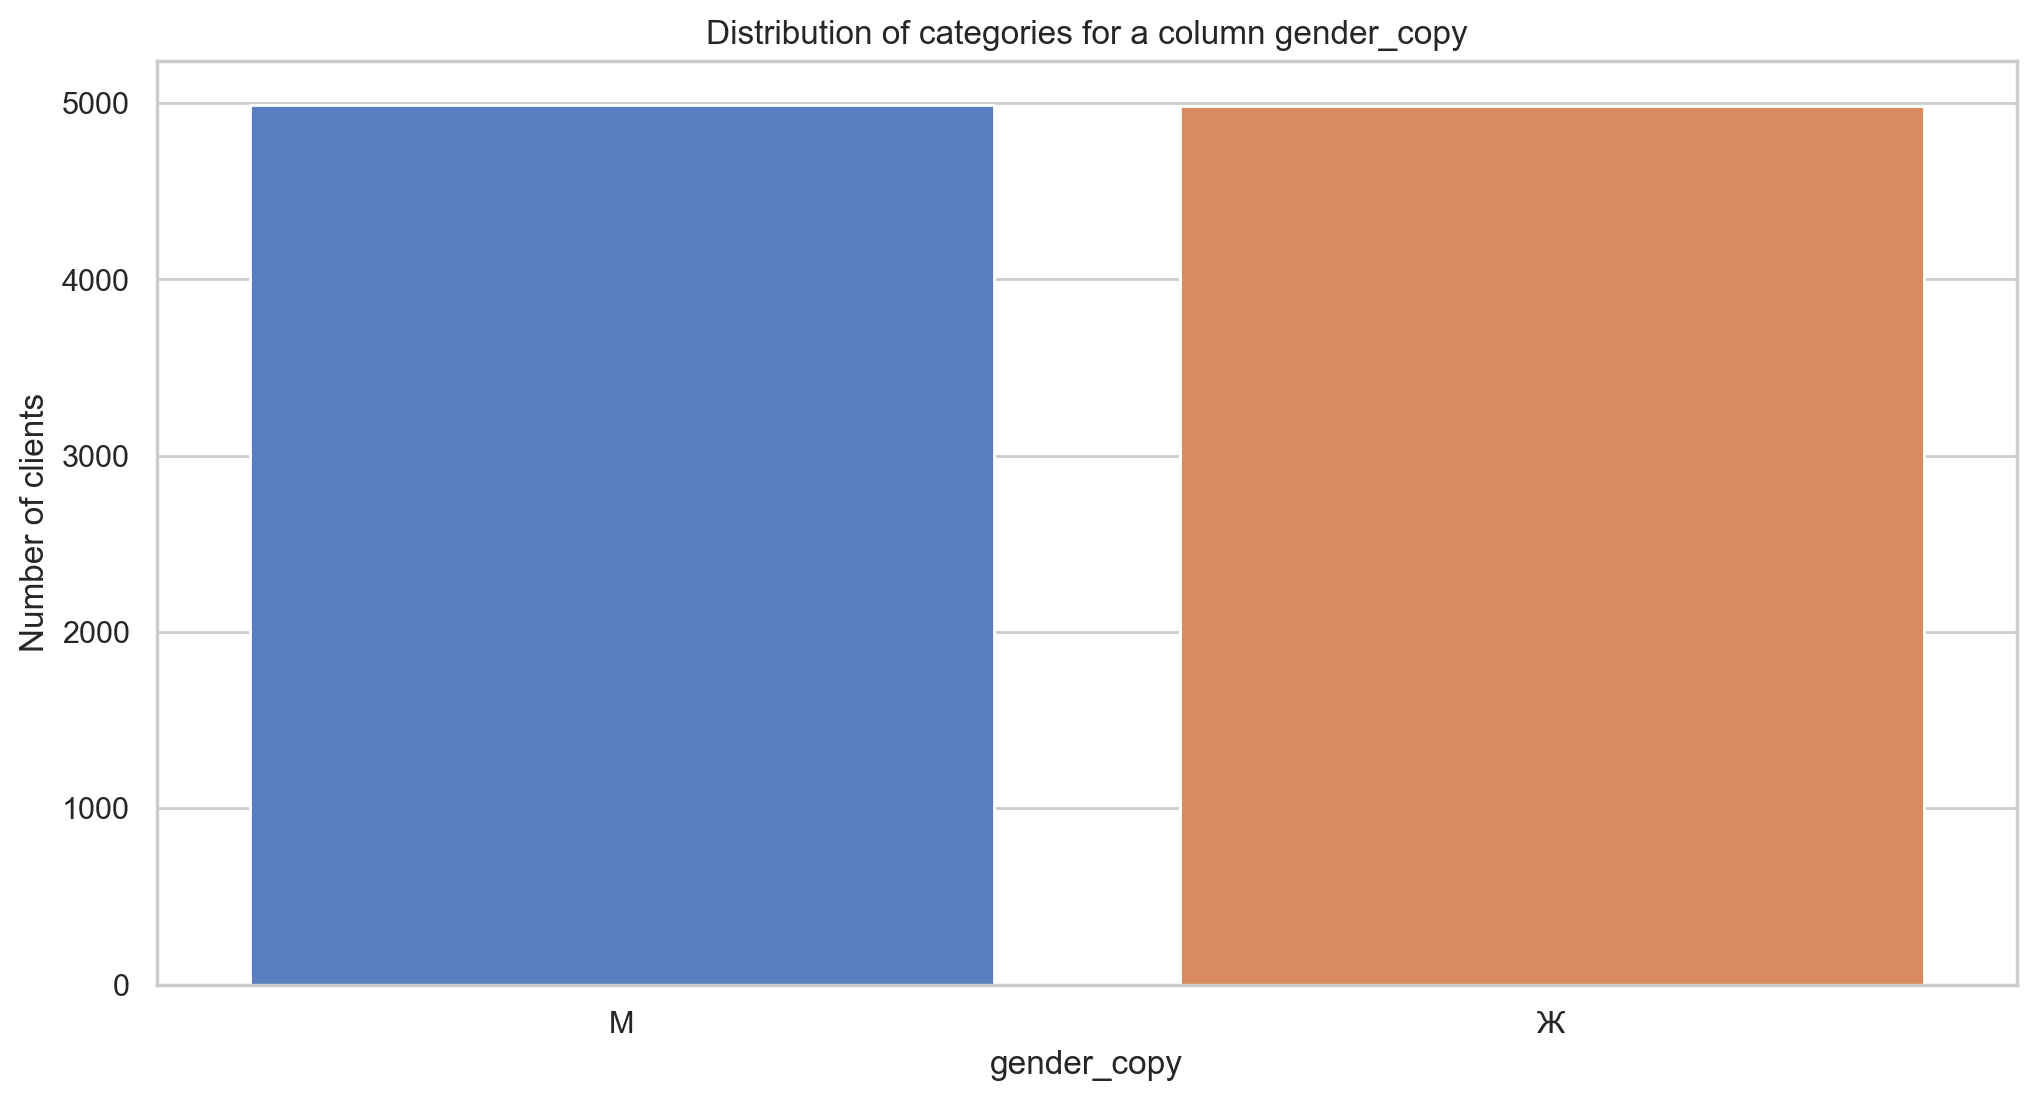

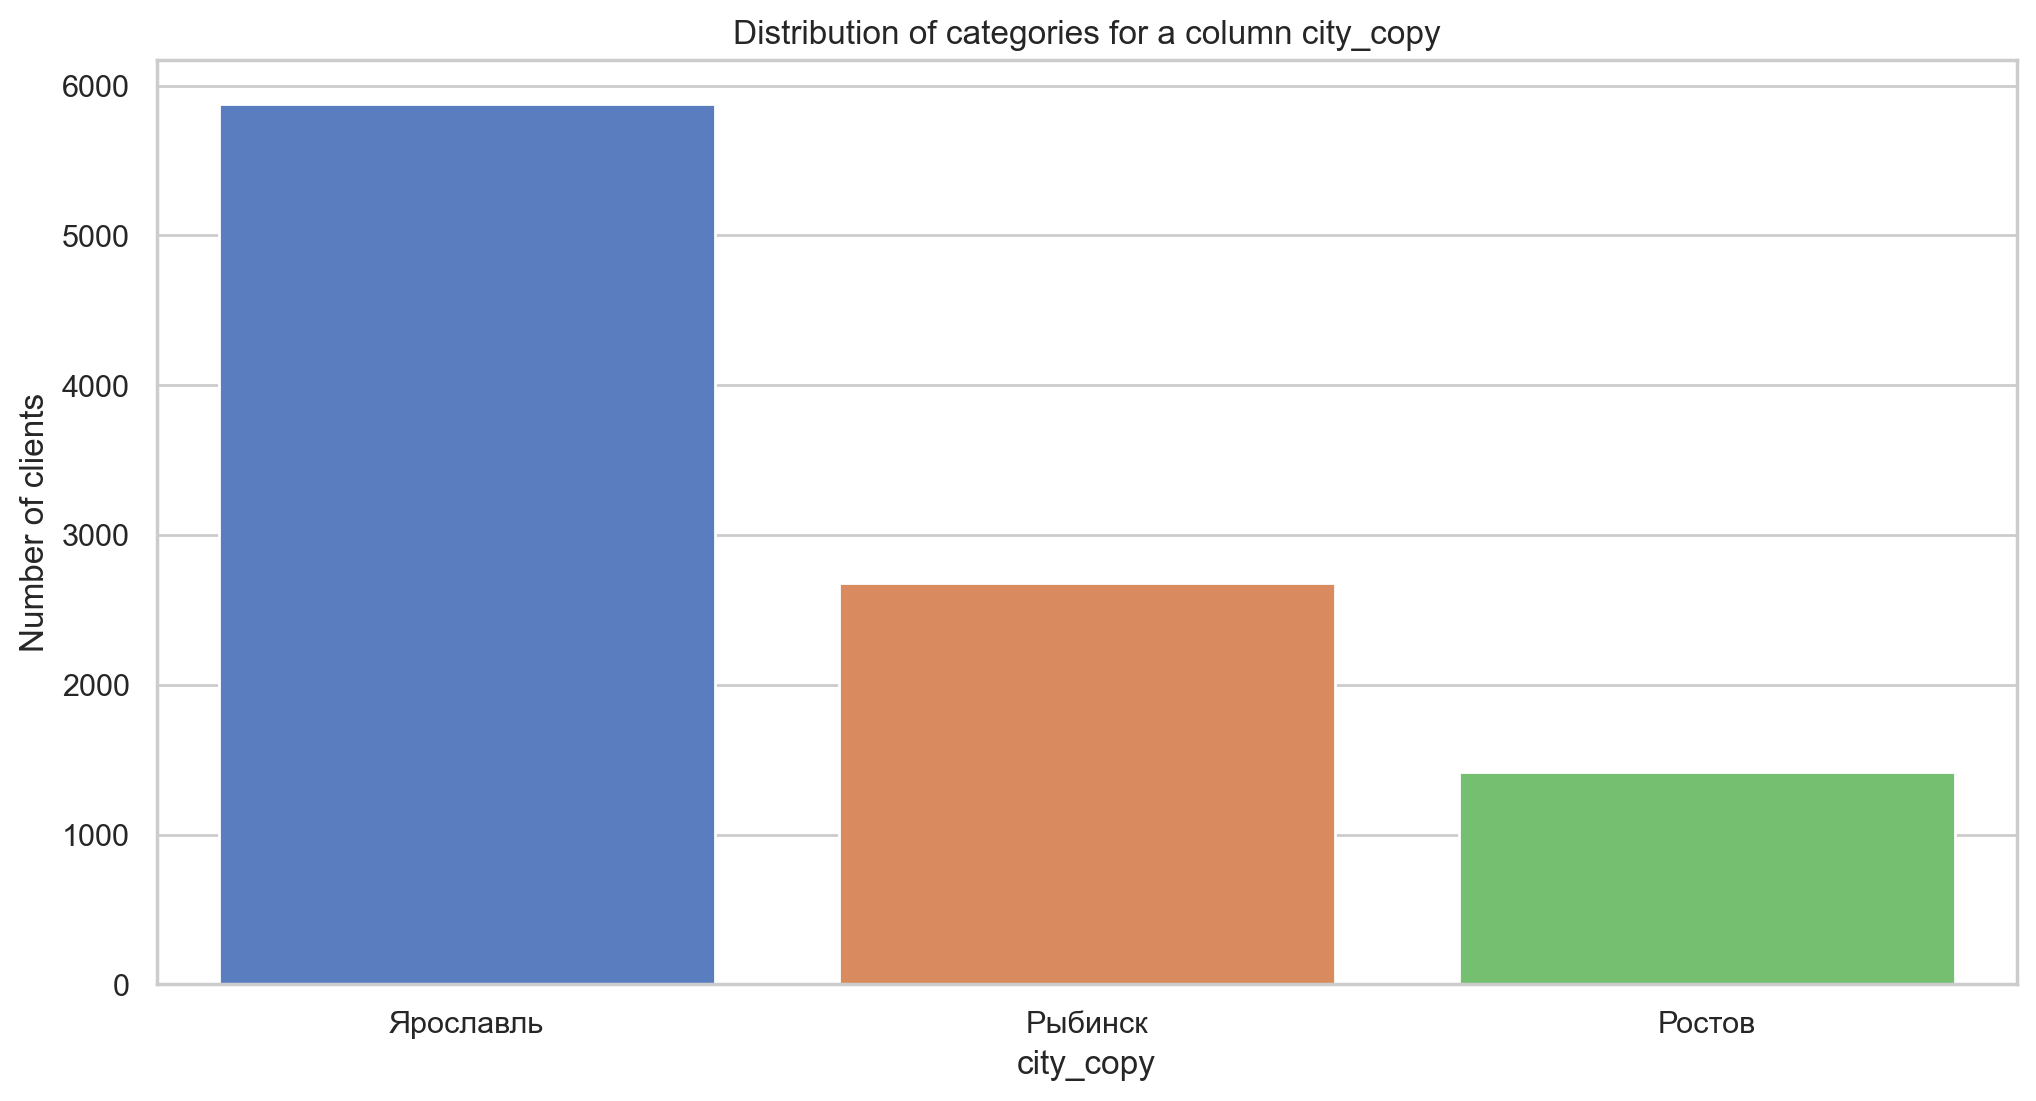

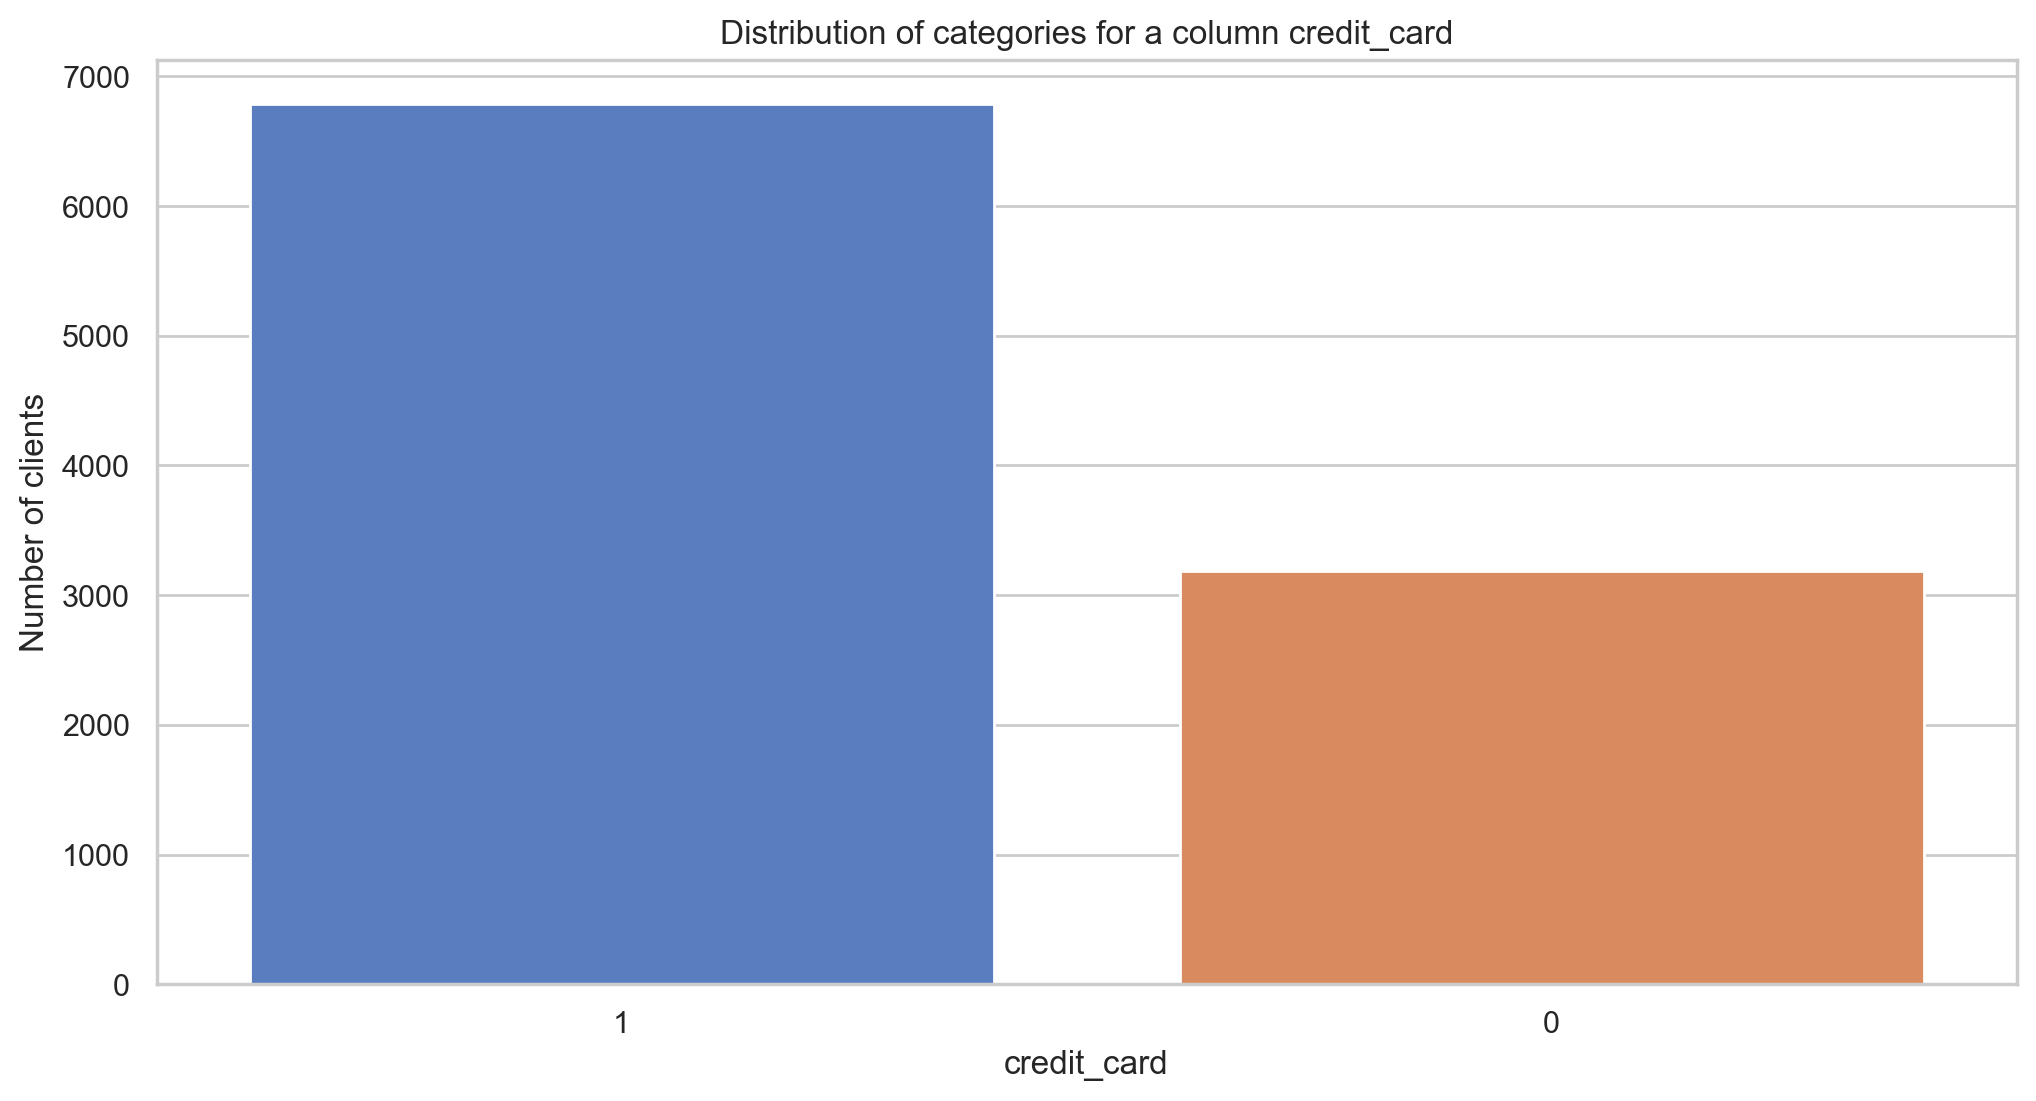

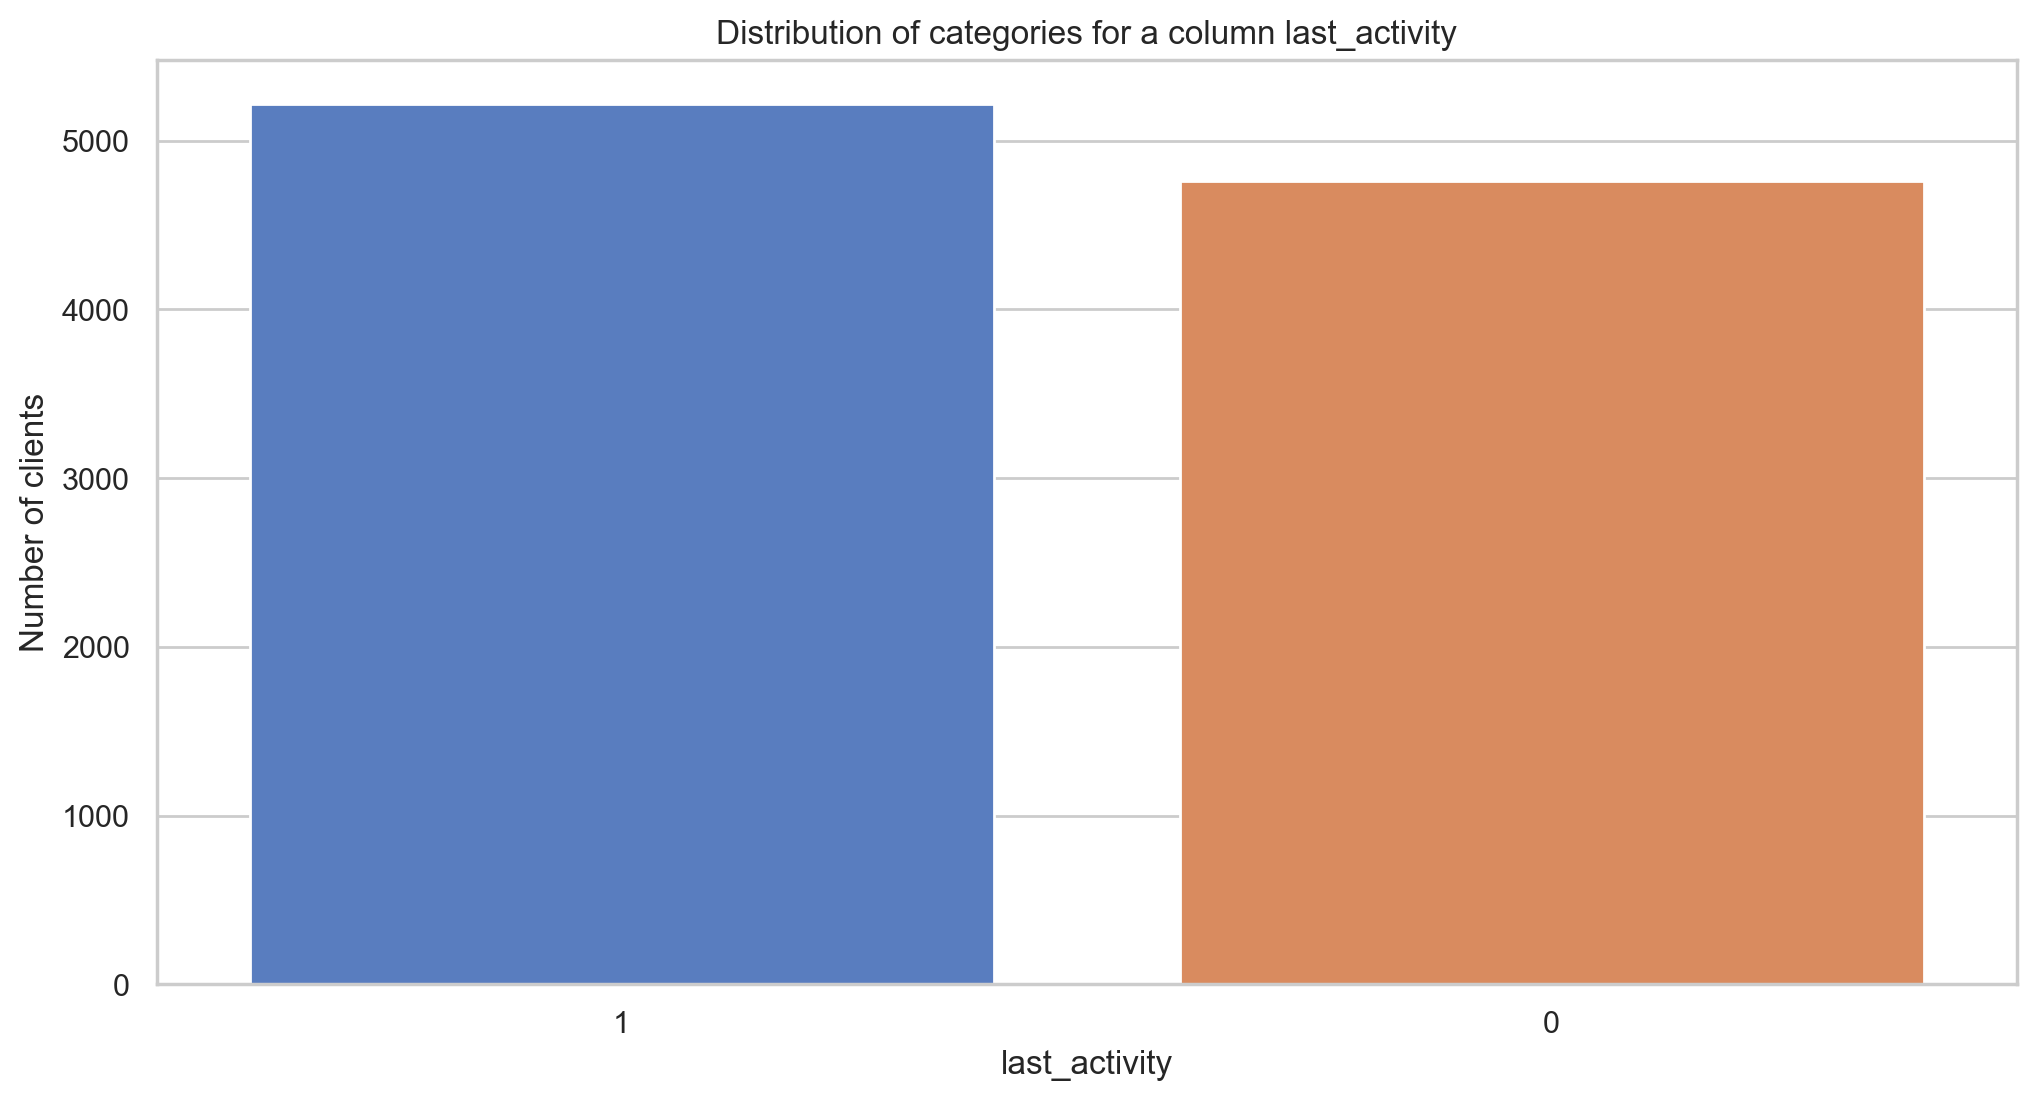

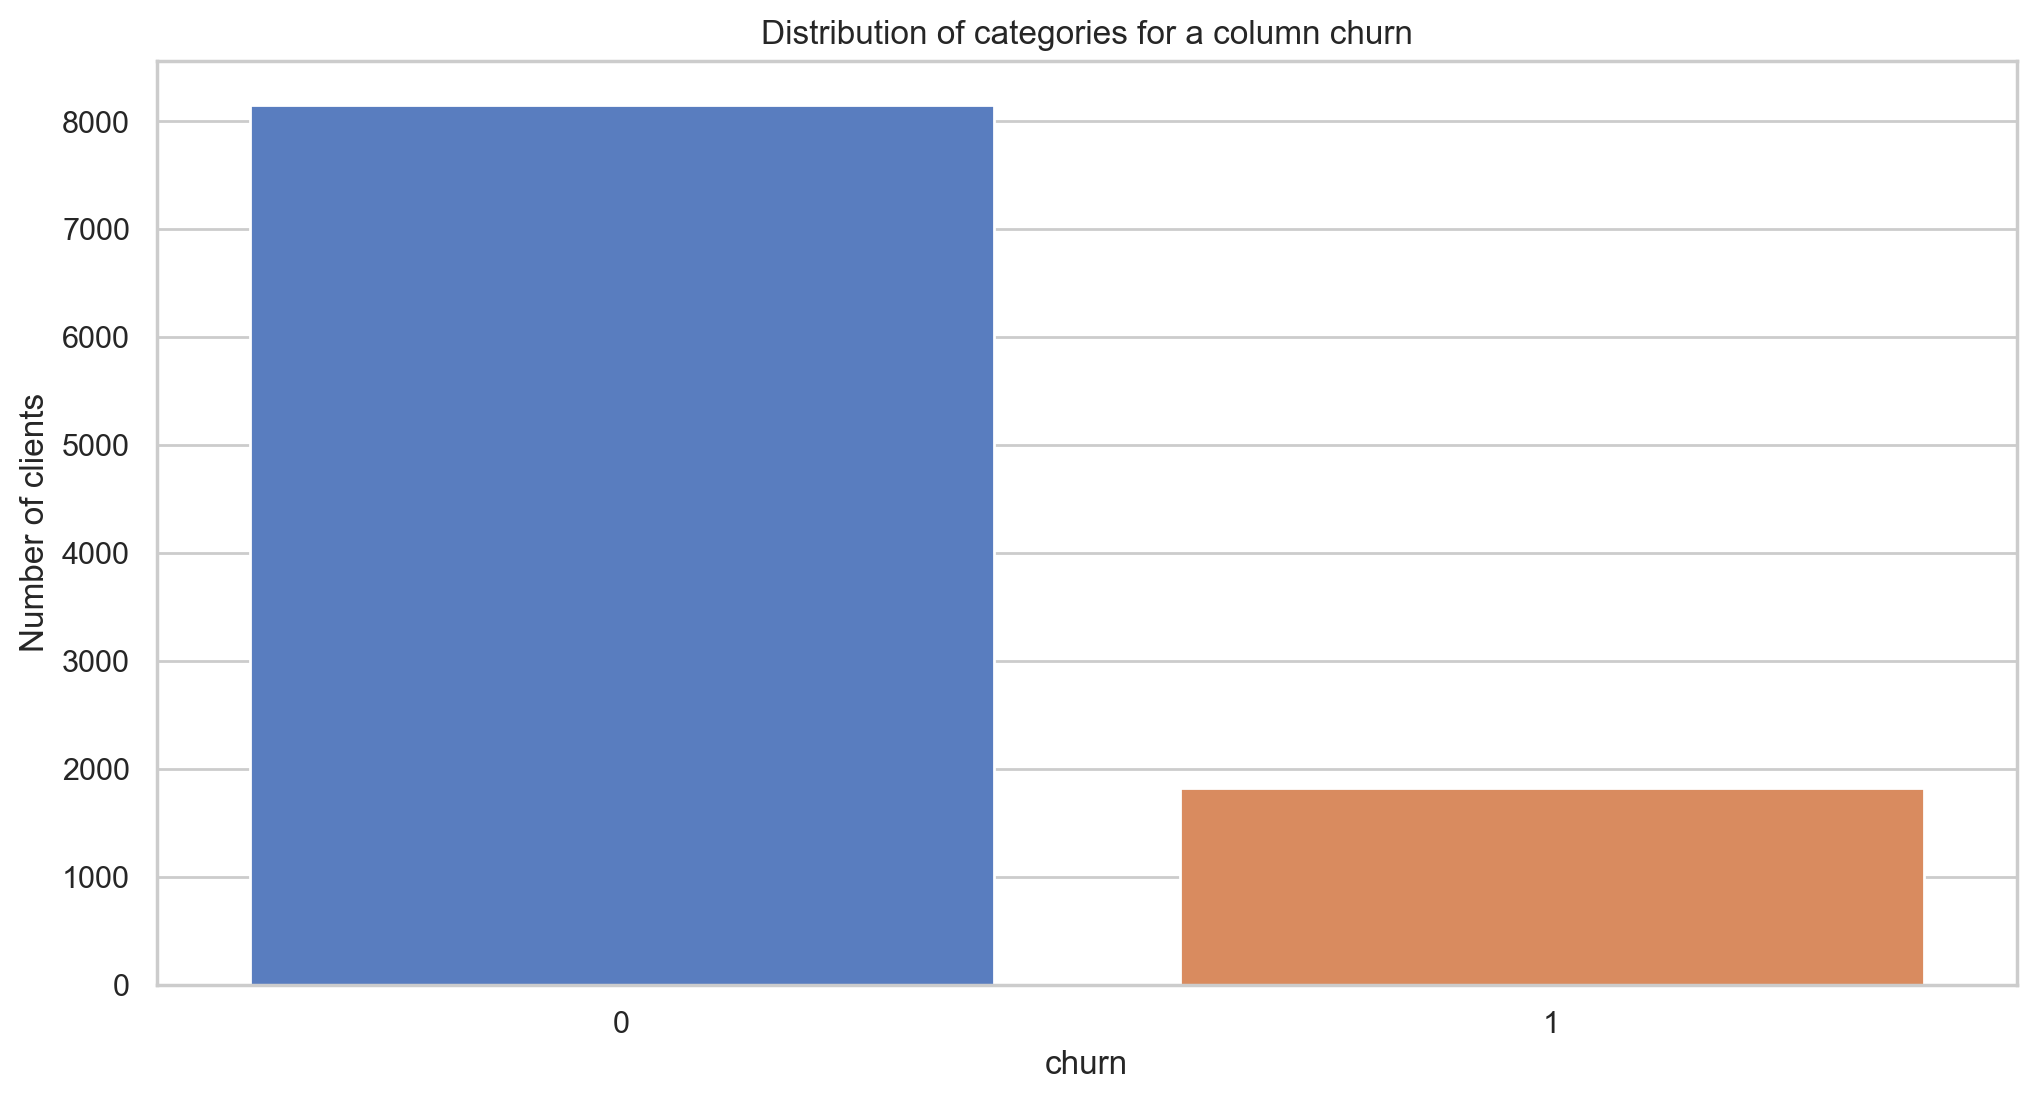

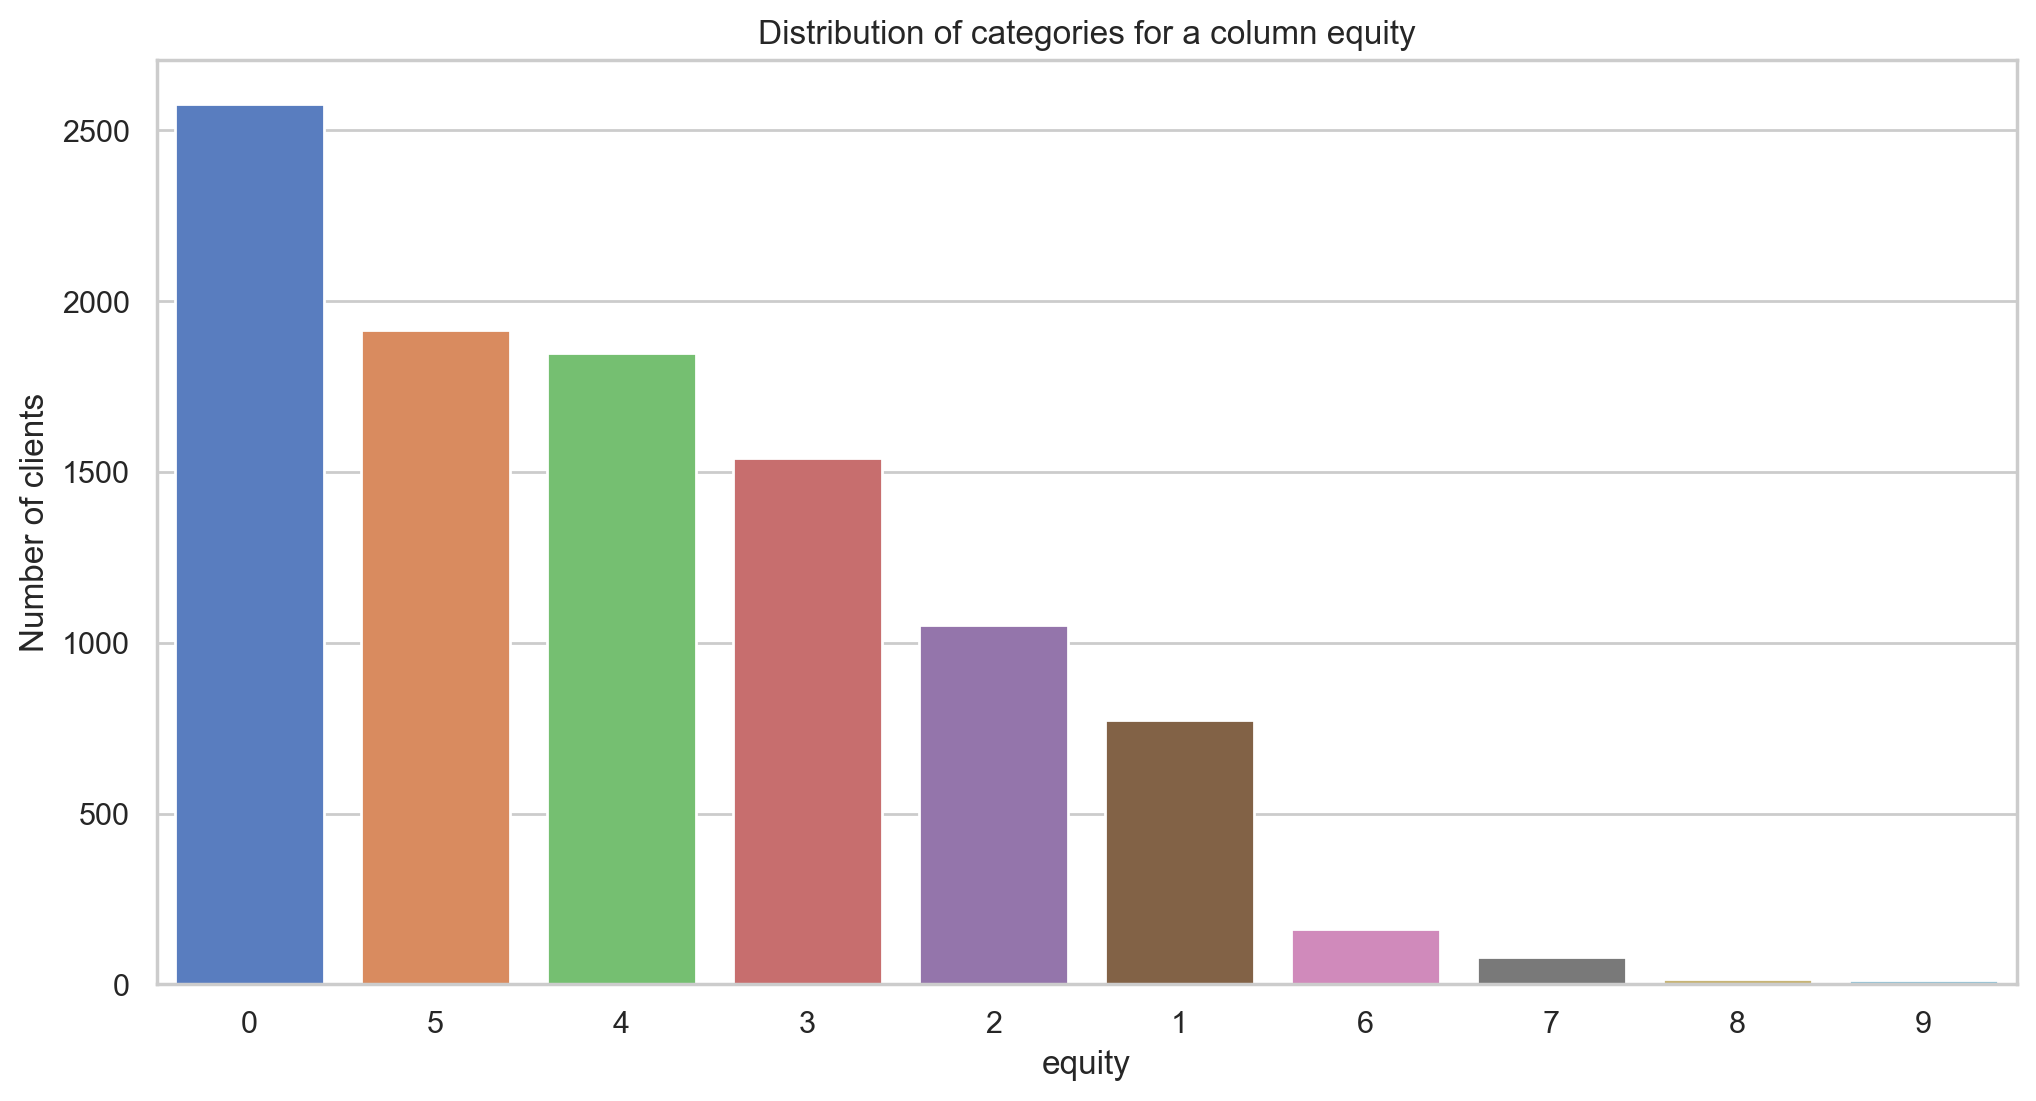

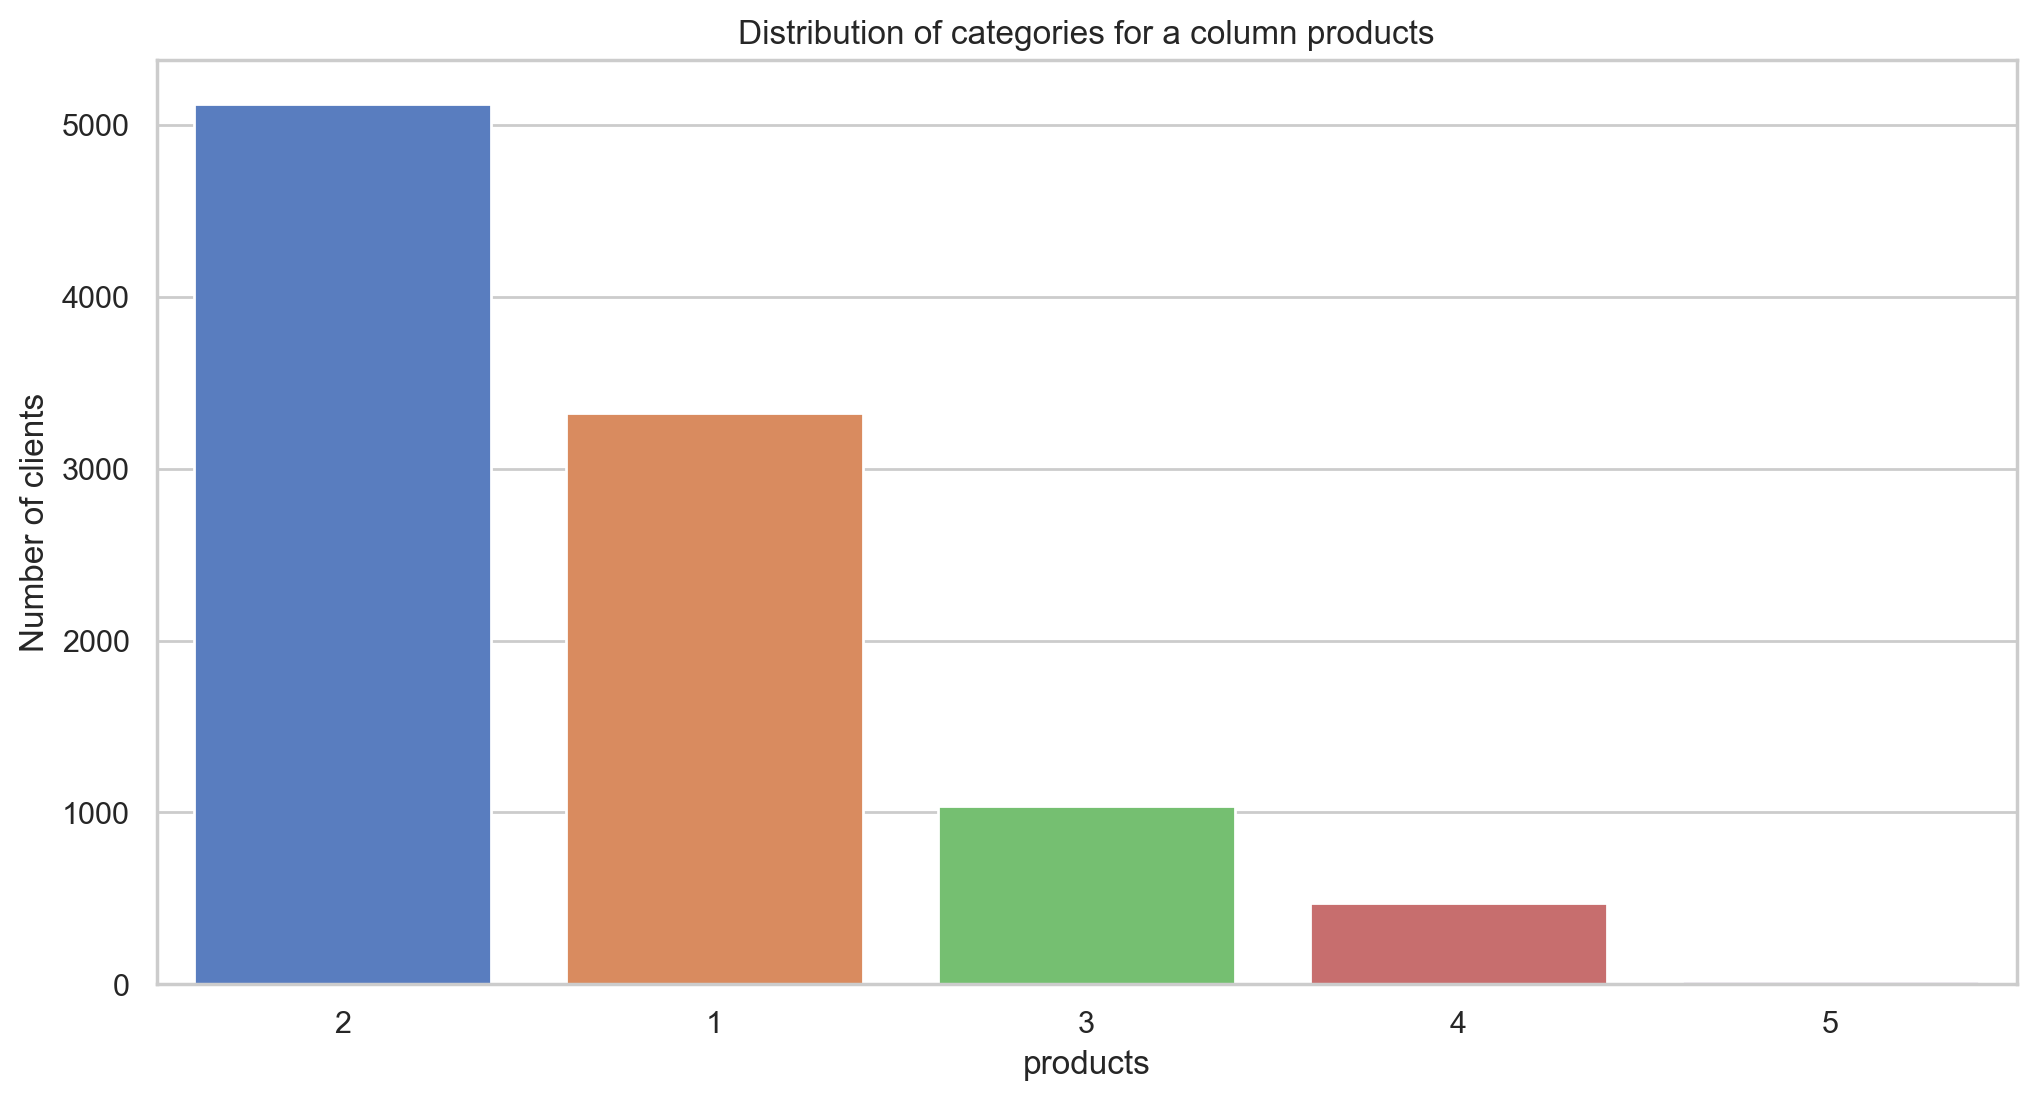

In [84]:
# visualizing categorical features
for c in categorical:
    plt.figure(figsize = (12, 6))
    ax = sns.countplot(x=data[c], order = data[c].value_counts().index, palette=palette)
    plt.title(f'Distribution of categories for a column {c}')
    plt.ylabel('Number of clients')
    plt.show()

From the graphs the following conclusions can be drawn:
1. Approximately the same number of male and female clients
2. Most clients are in Yaroslavl, followed by Rybinsk and Rostov
3. 68% of customers use a bank credit card
4. 52% of clients are active
5. Average churn rate - 18.2%
6. Most clients in the categories who have no property and who have 5 property points
7. All clients use bank products, most people use 2 products, followed by a category with 1 product

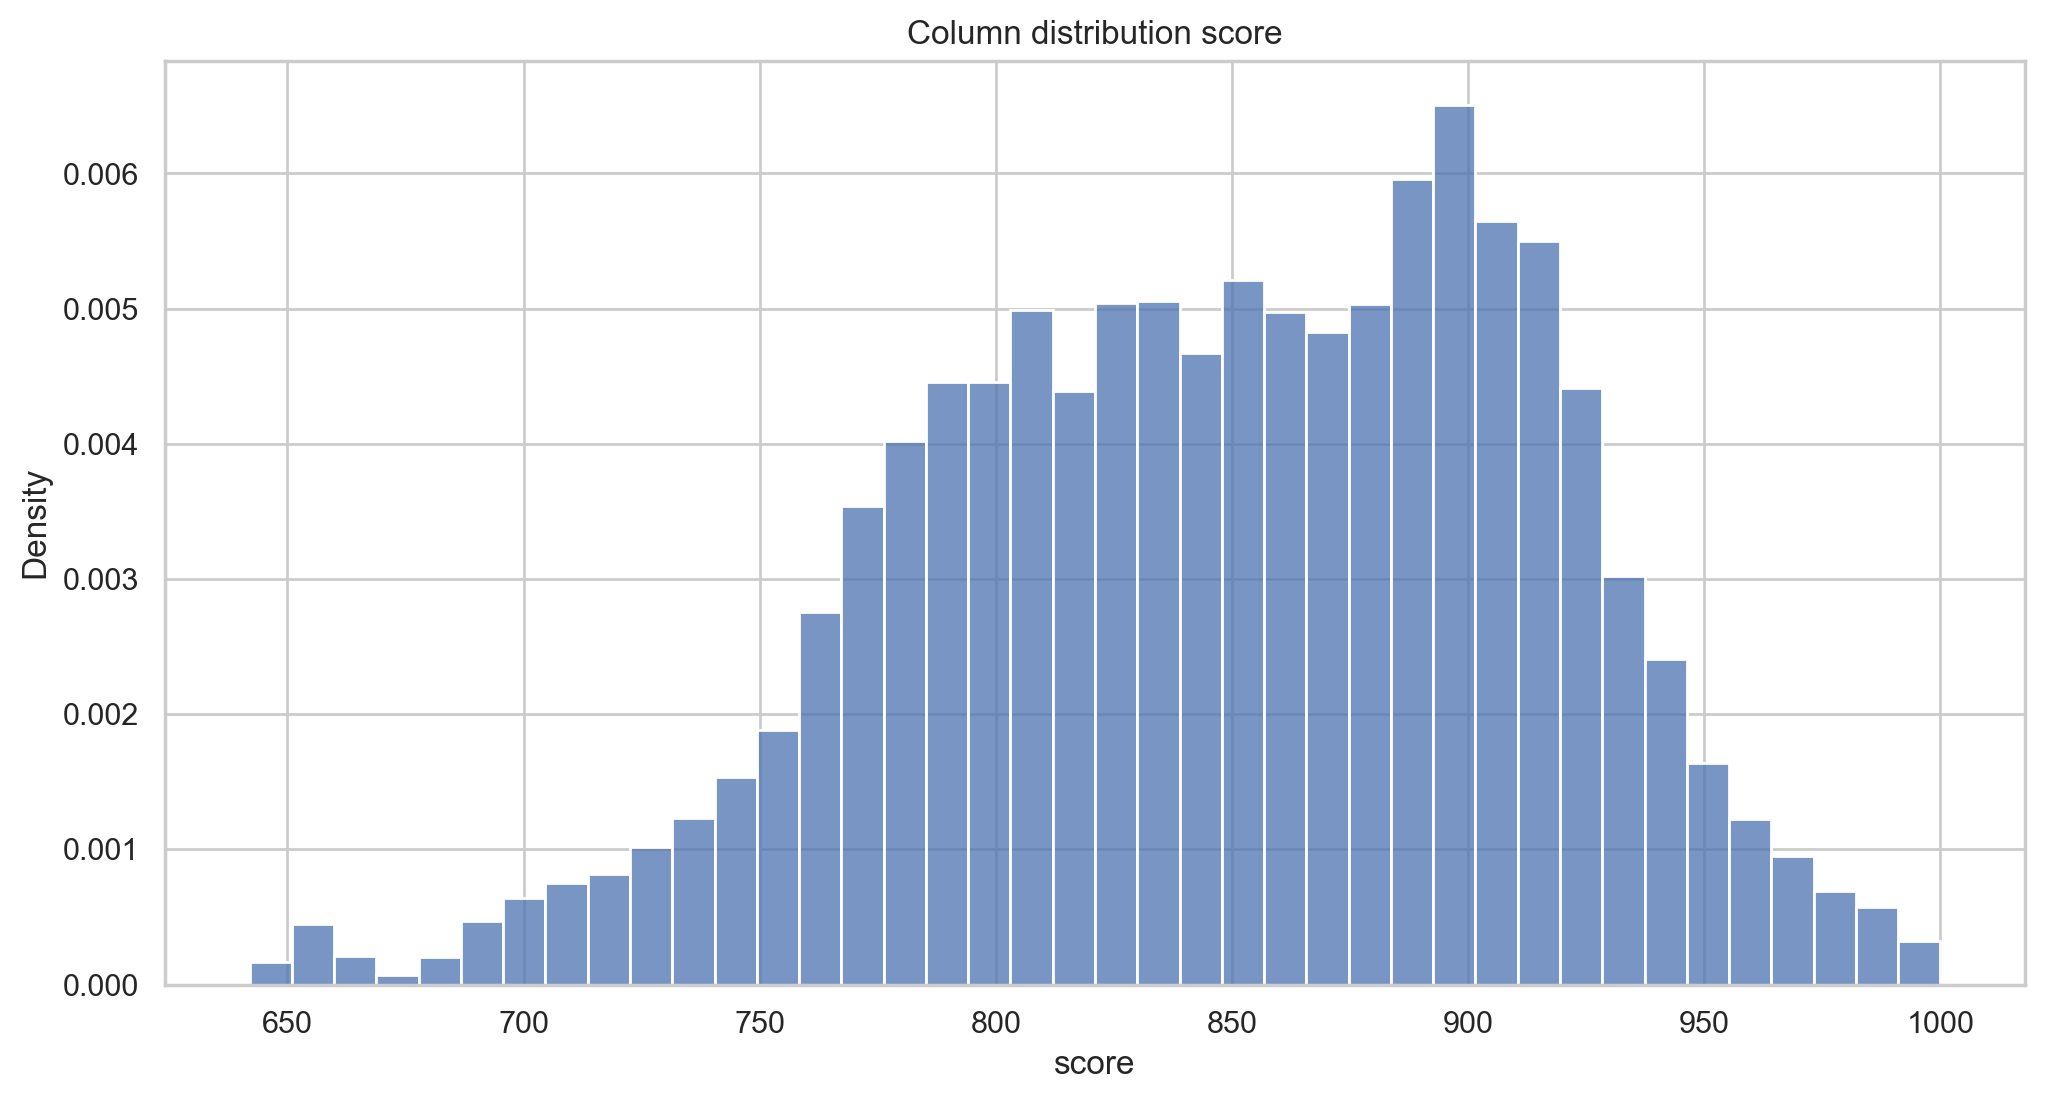

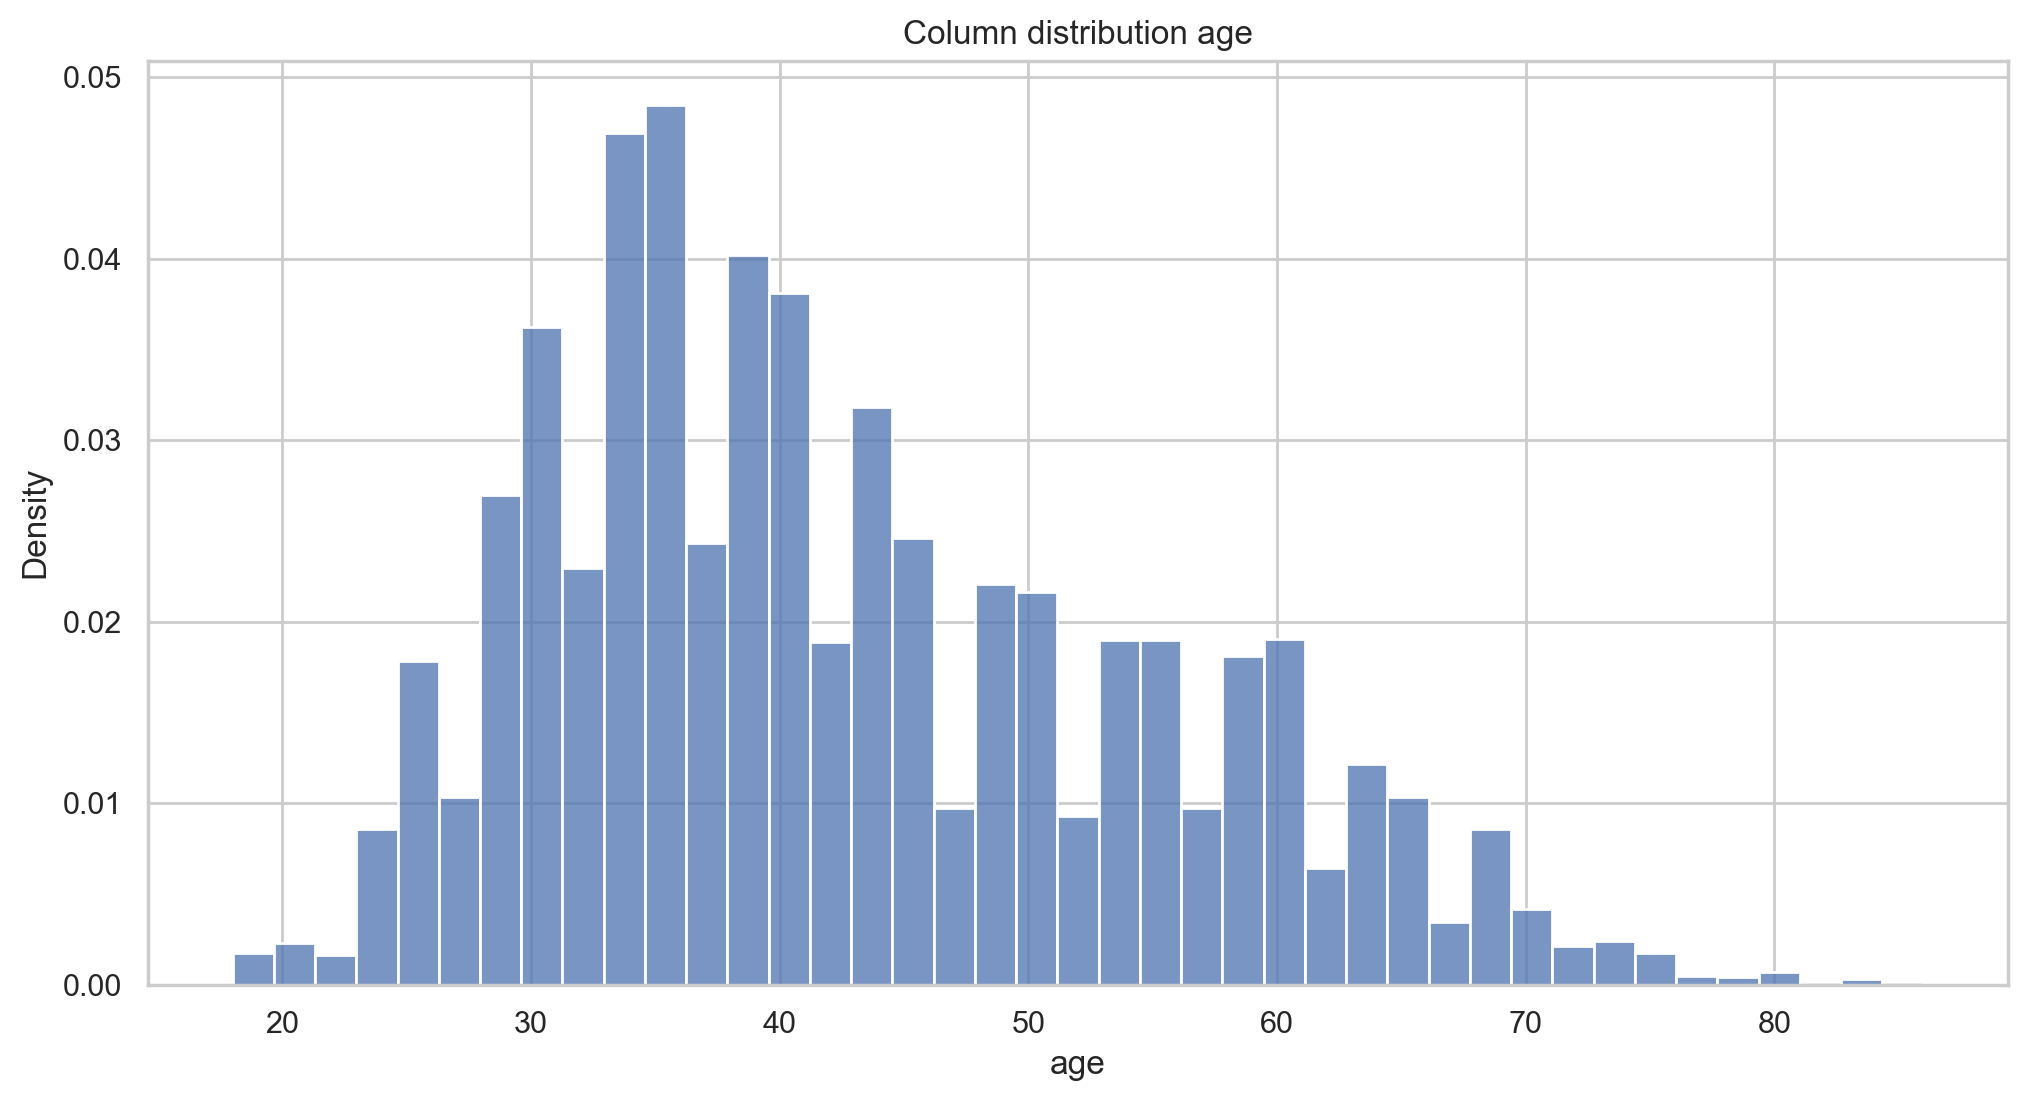

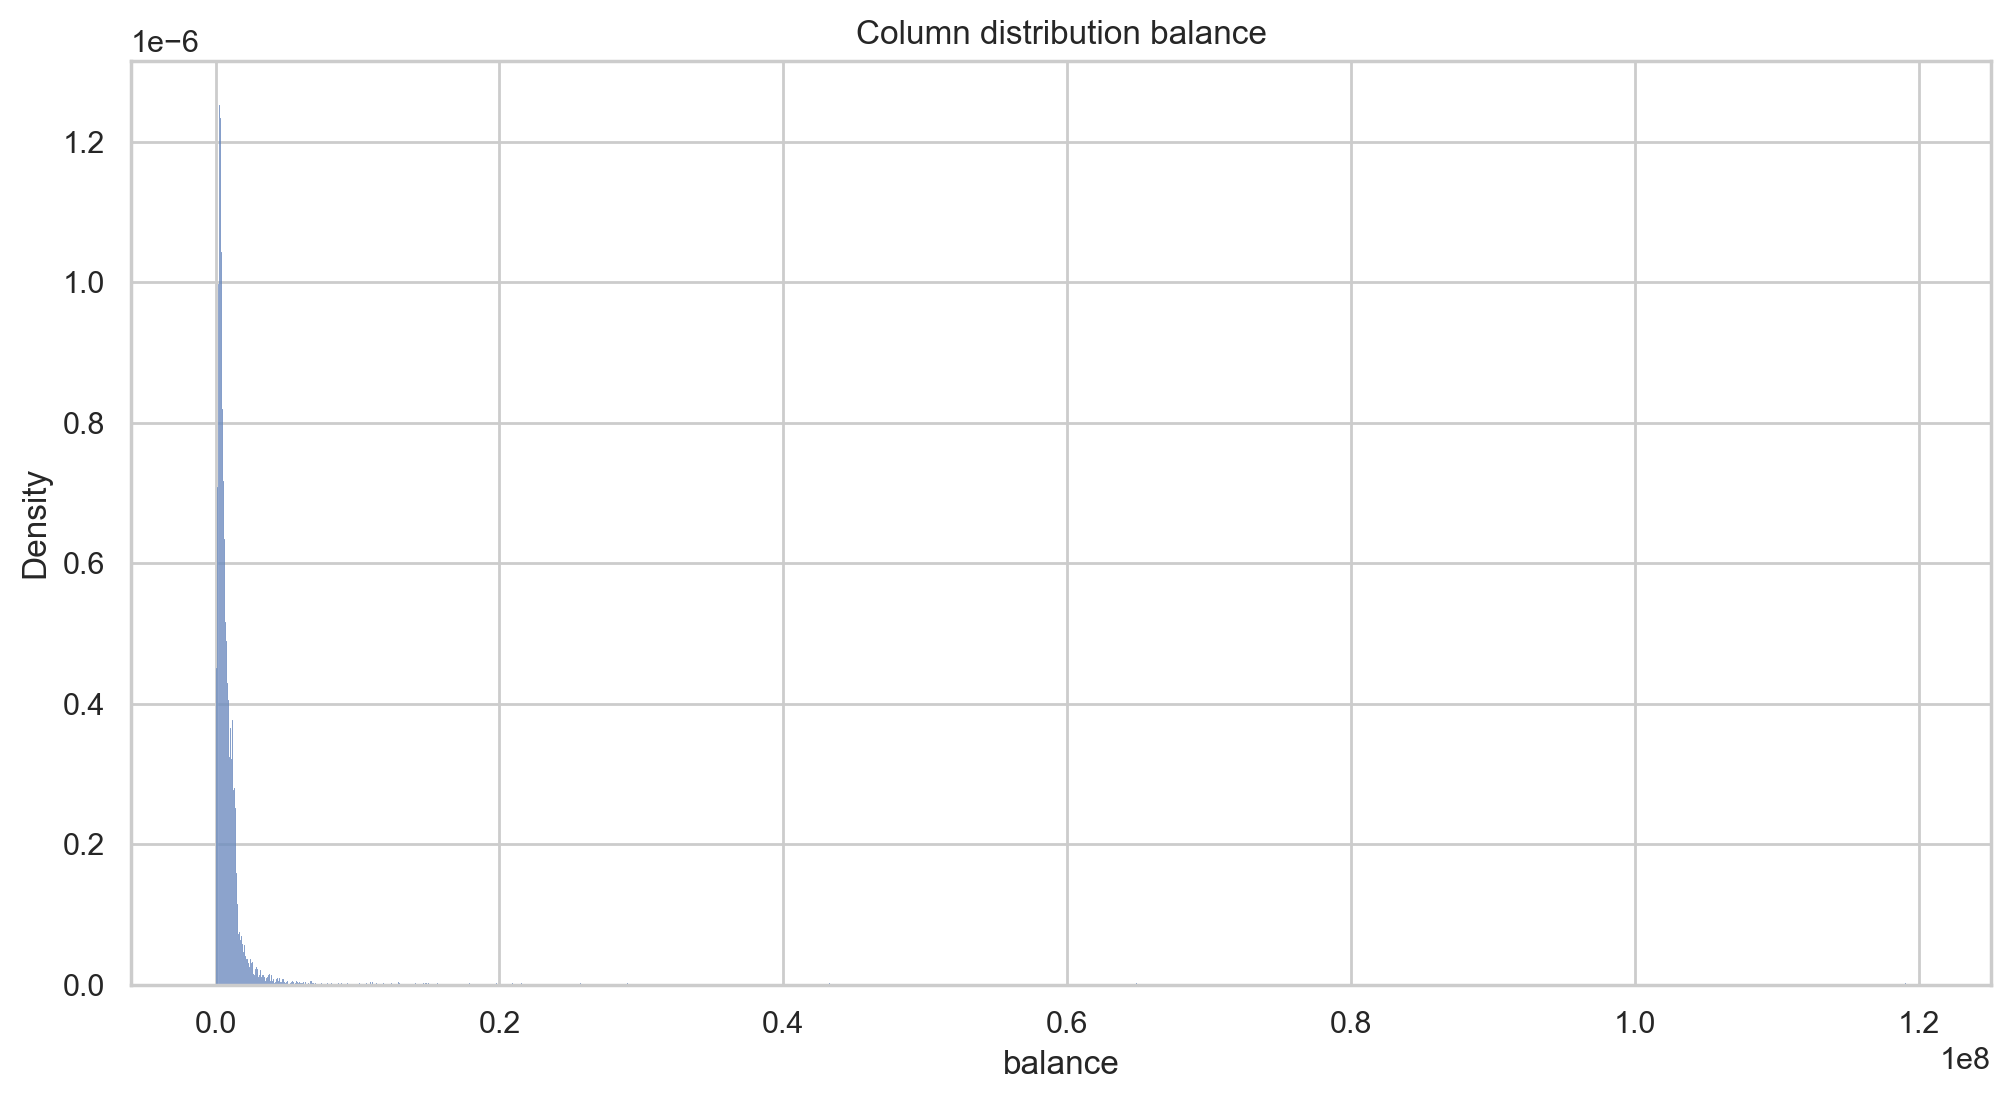

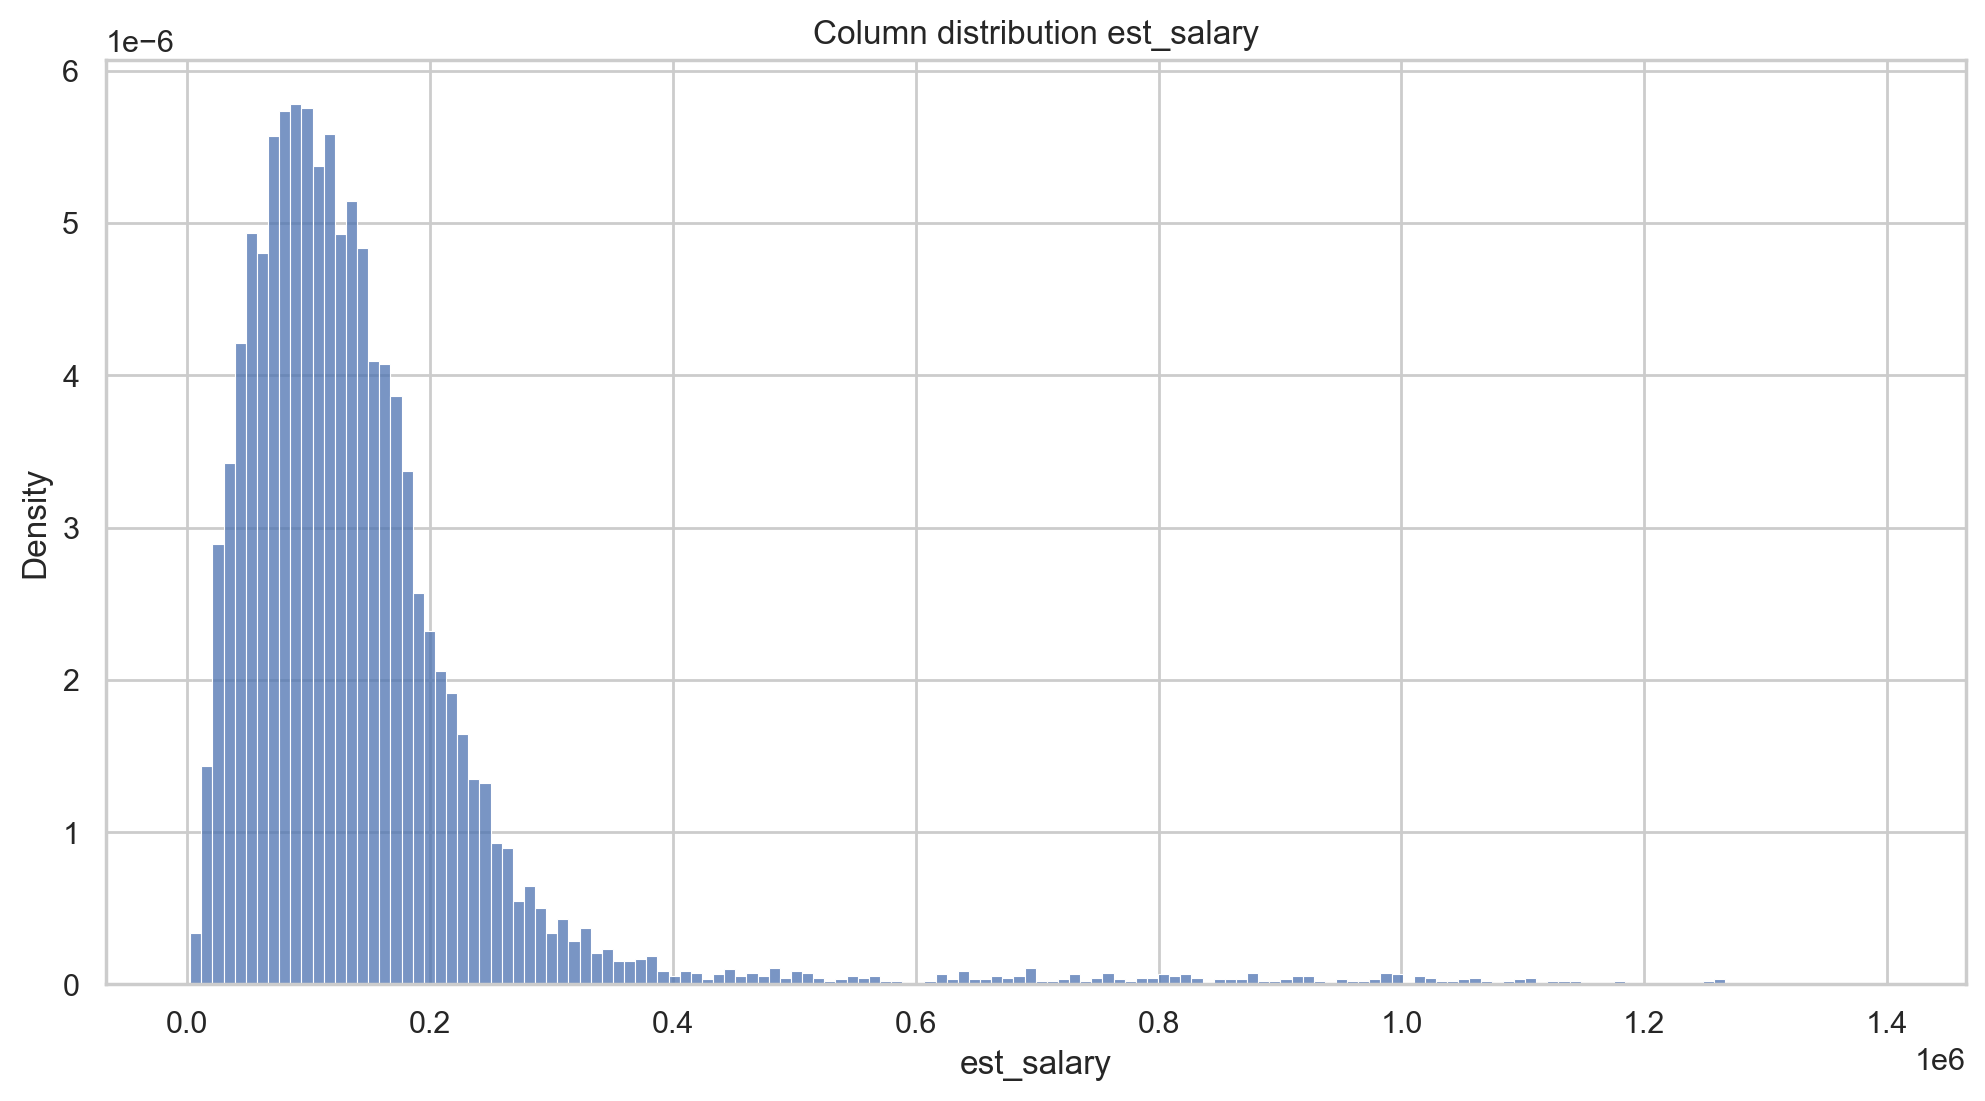

In [85]:
# visualizing quantitative characteristics
for i in quantitative:
    plt.figure(figsize = (12, 6))
    sns.histplot(x=data[i], stat="density",common_norm=False)
    plt.title(f'Column distribution {i}')
    plt.show()

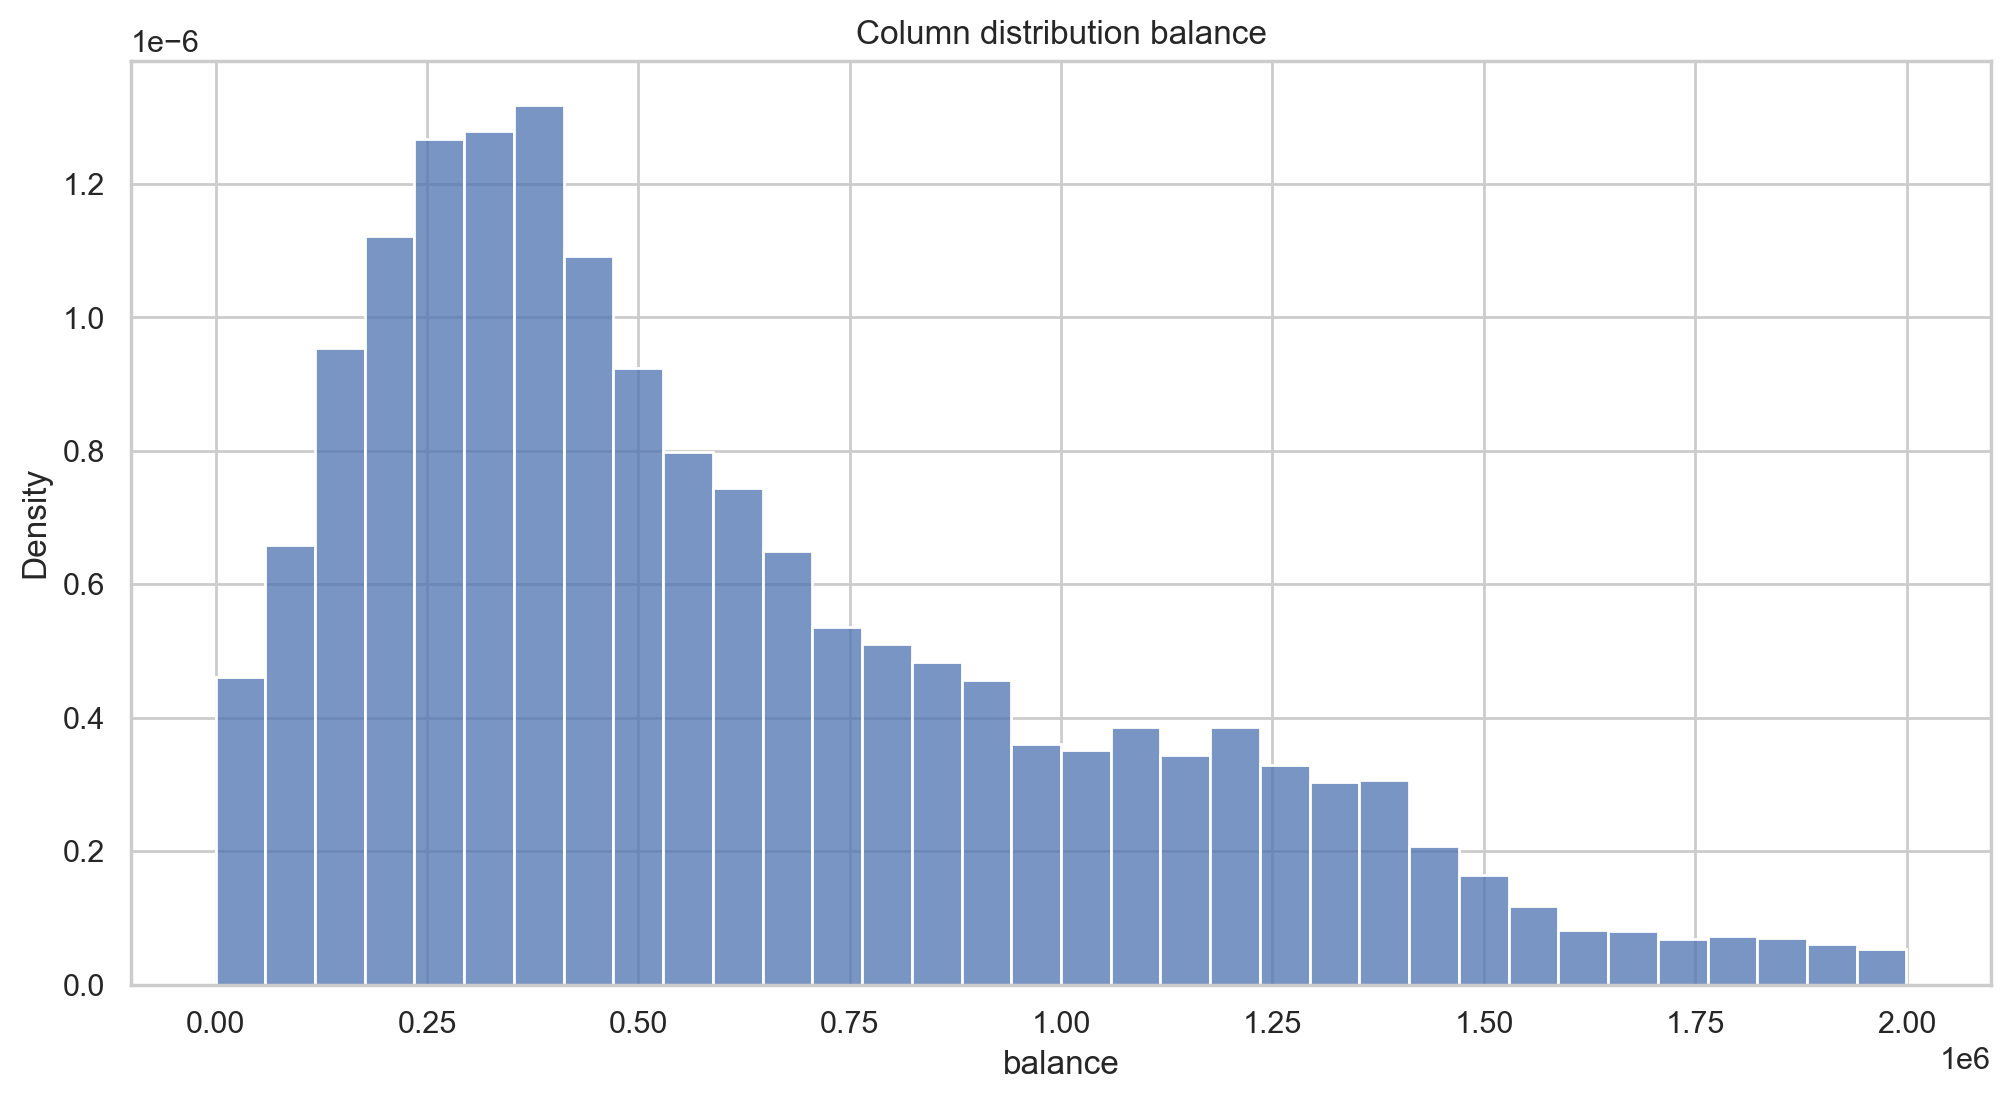

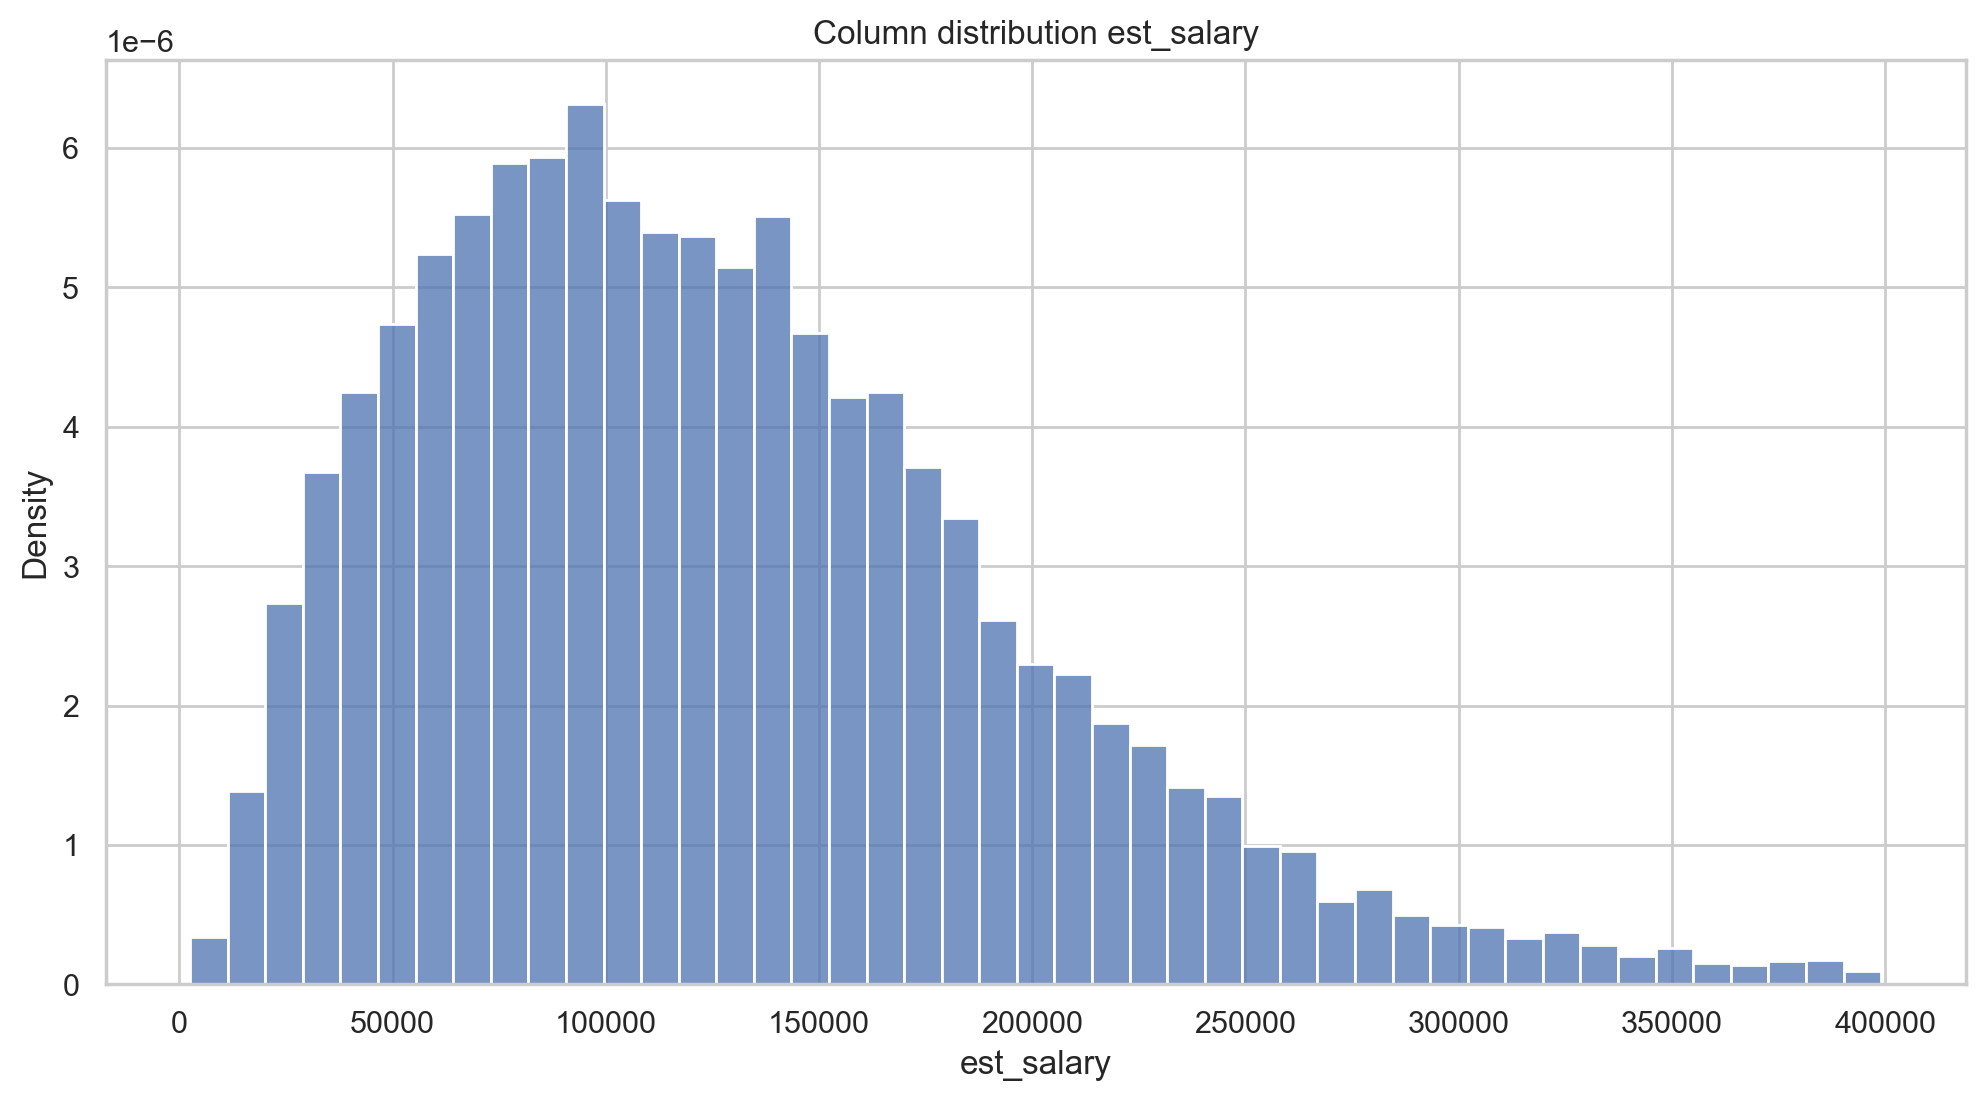

In [86]:
# cuting off values that are too large and rarely encountered to better visualize the graph
plt.figure(figsize = (12, 6))
sns.histplot(x=data.query('balance < 2000000')['balance'], stat="density",common_norm=False)
plt.title('Column distribution balance')
plt.show()

plt.figure(figsize = (12, 6))
sns.histplot(x=data.query('est_salary < 400000')['est_salary'], stat="density",common_norm=False)
plt.title('Column distribution est_salary')
plt.show()

From the graphs the following conclusions can be drawn:
1. Credit scores range from 640 to 1000
2. Ages range from 18 to 86. Most clients are between 25 and 45 years old
3. Some clients have a very large account balance, but mostly clients have a balance from 100 thousand to 600 thousand
4. The majority of bank clients have salaries from 50 thousand to 170 thousand

### Study of data distributions in terms of churn

In [87]:
# function for generating distribution graphs

def charts (data, hue):
    # discrete quantities:
    for column in categorical:
        common_churn_level = data['churn'].mean() * 100
        columns_churn = data.groupby(column)['churn'].mean() * 100
        
        plt.figure(figsize=(8, 5))
        plt.axhline(y= common_churn_level, linewidth=2, linestyle='--', color='k')
        ax = columns_churn.plot(kind='bar', color='m')
        plt.xticks(rotation=0)
        plt.title(f'Customer churn rate by category {column} relative to the bank average')
        plt.show()

    # continuous:
    for column in quantitative:
        plt.figure(figsize=(8,5))
        sns.histplot(data=data, x=column, hue=hue, stat="density", common_norm=False);
        plt.title(f'Distribution of clients by attribute {column}')
        plt.show()
        

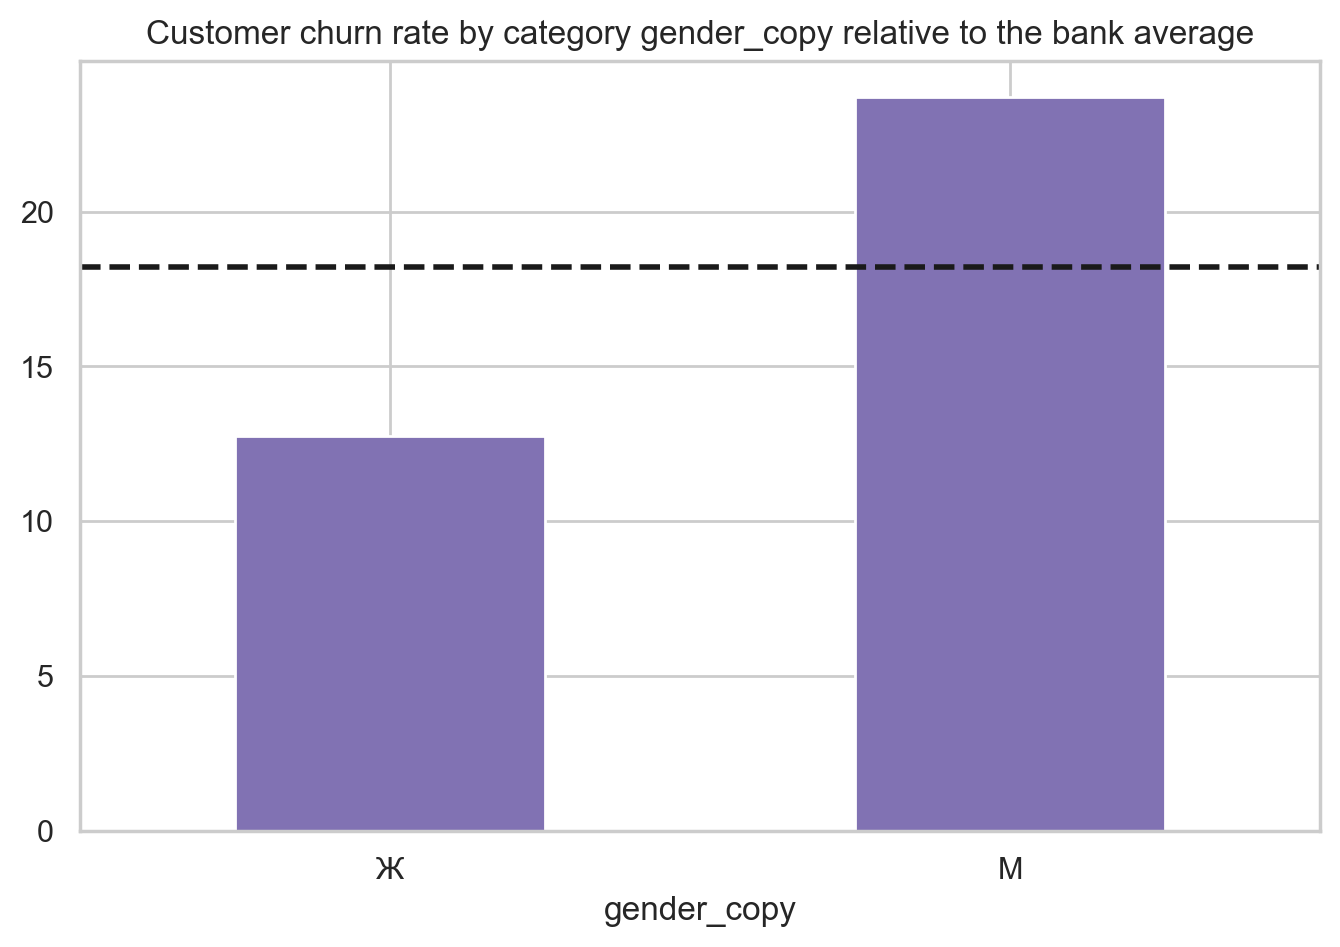

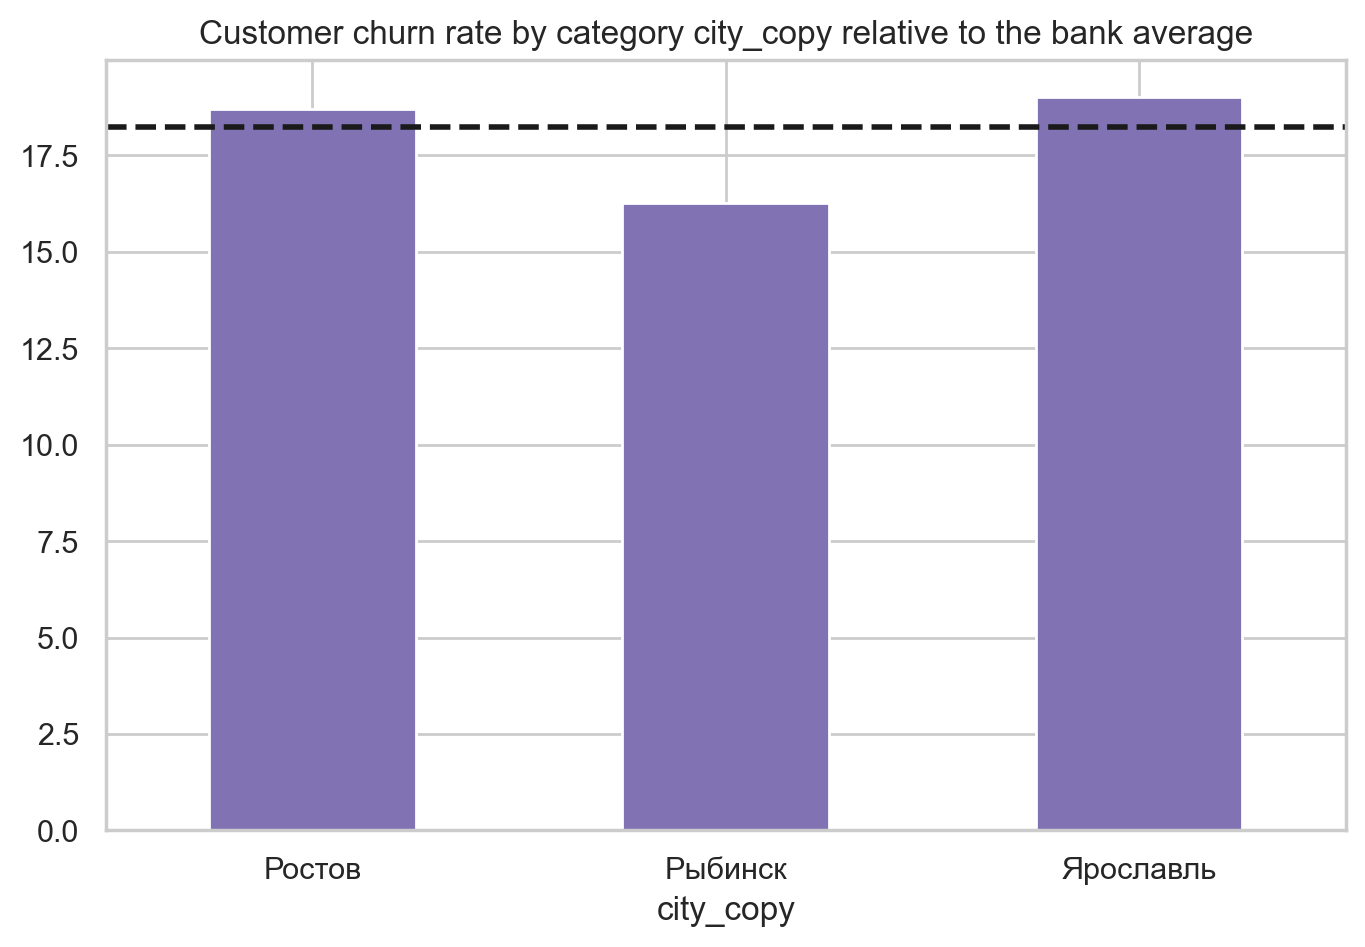

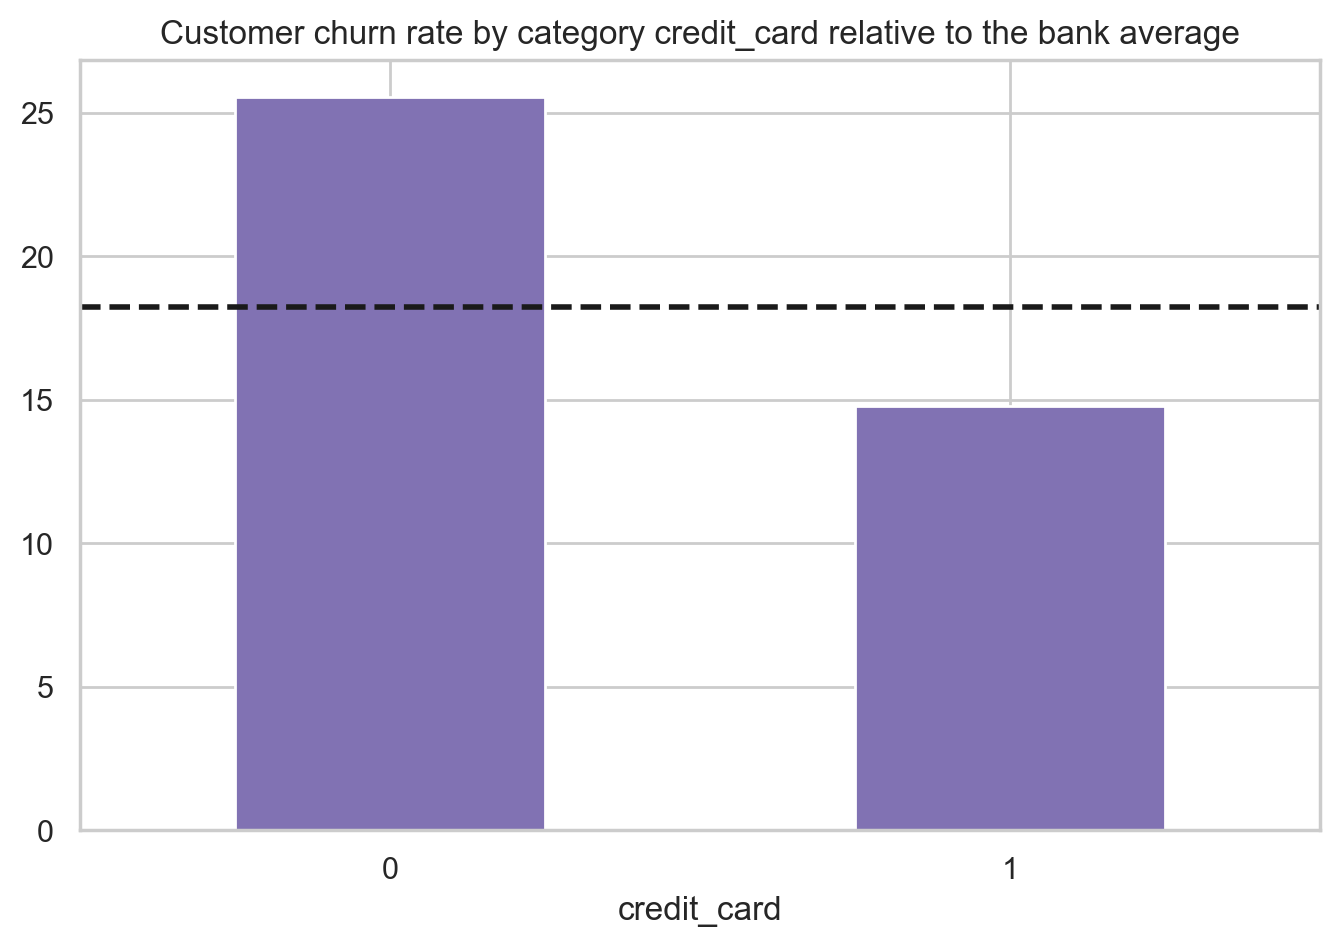

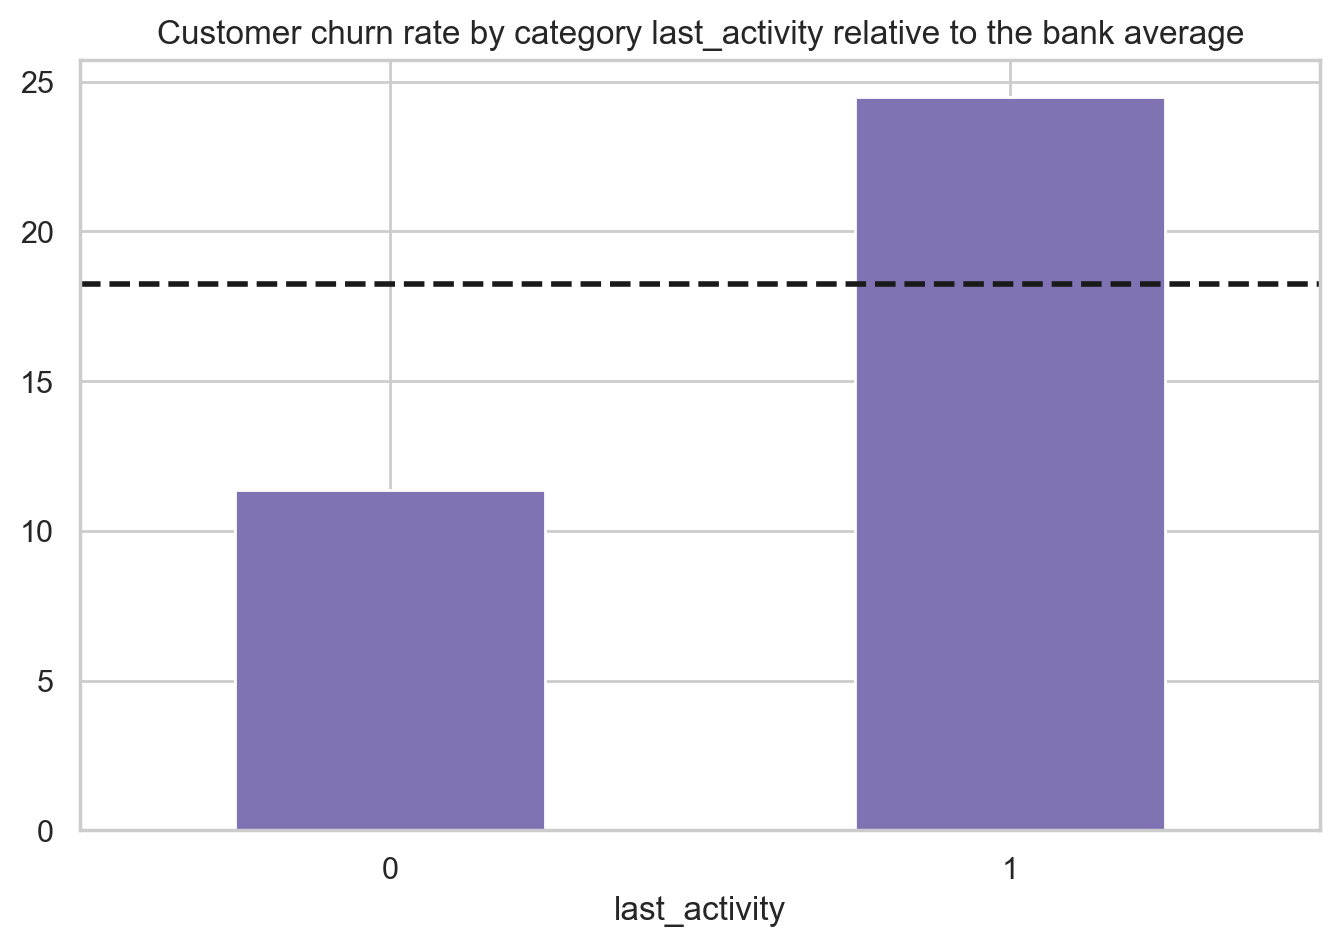

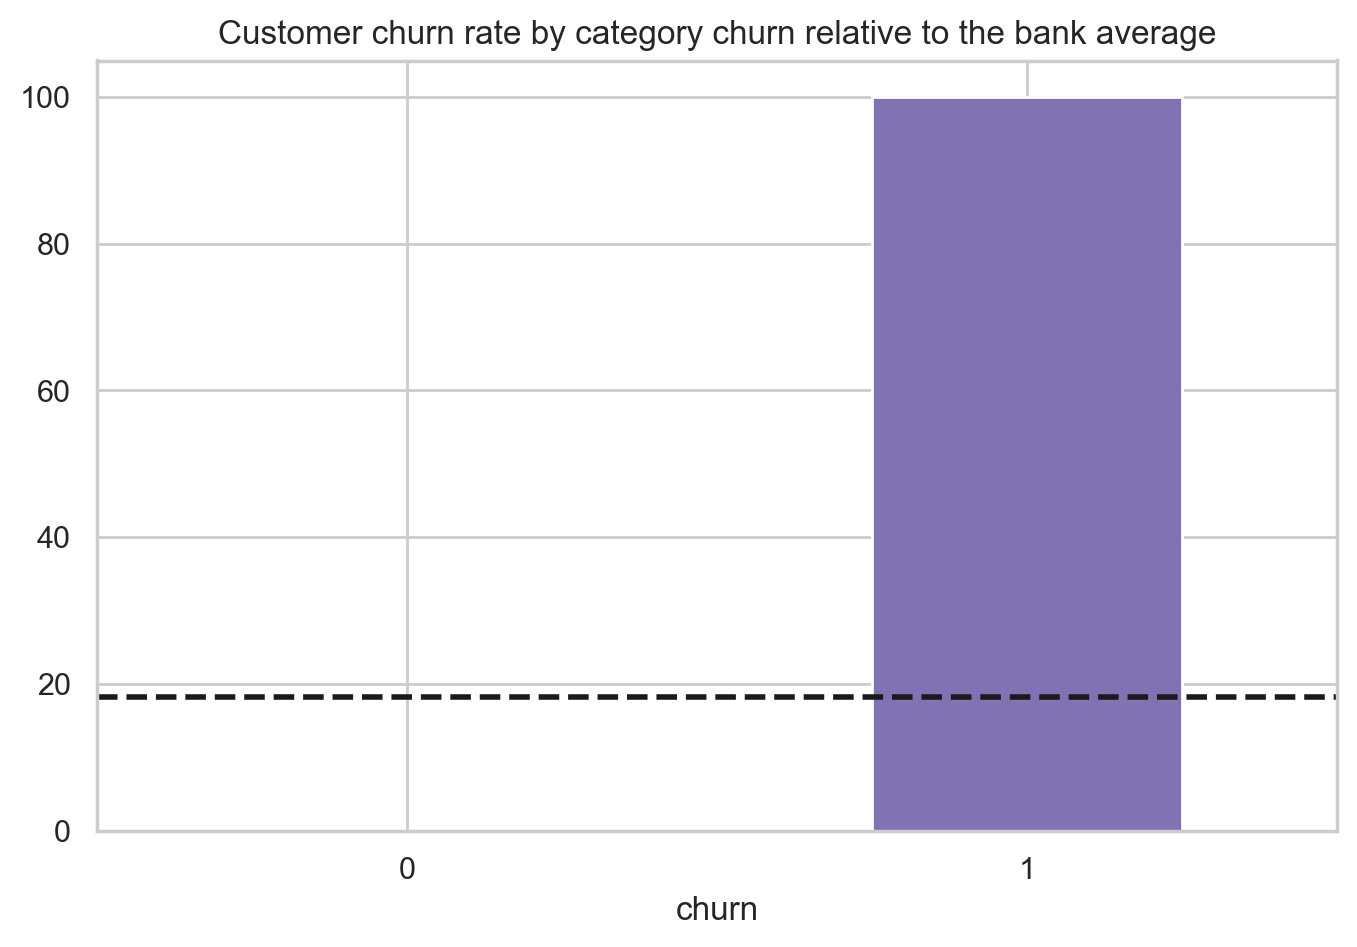

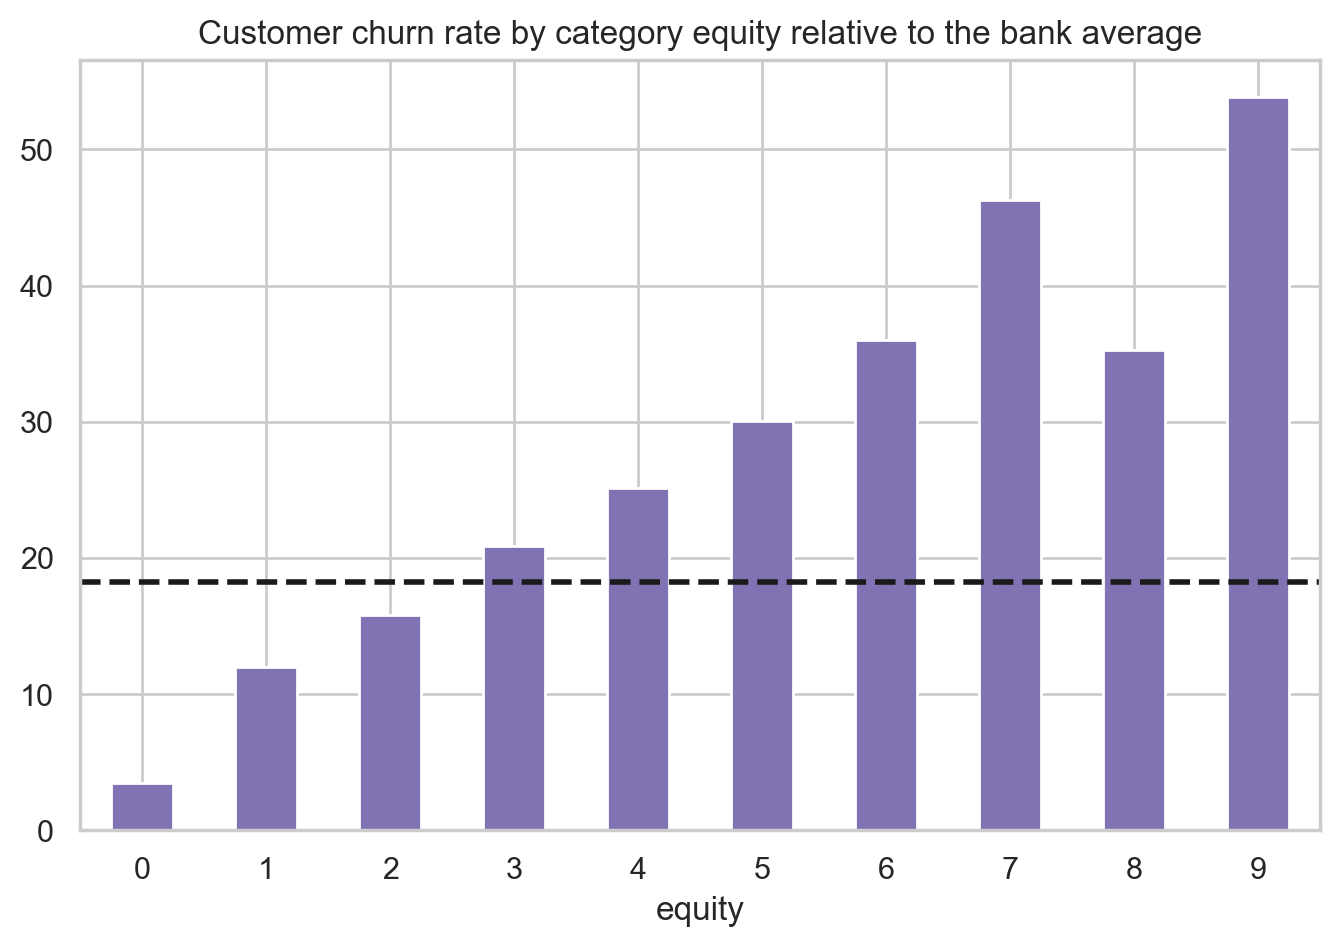

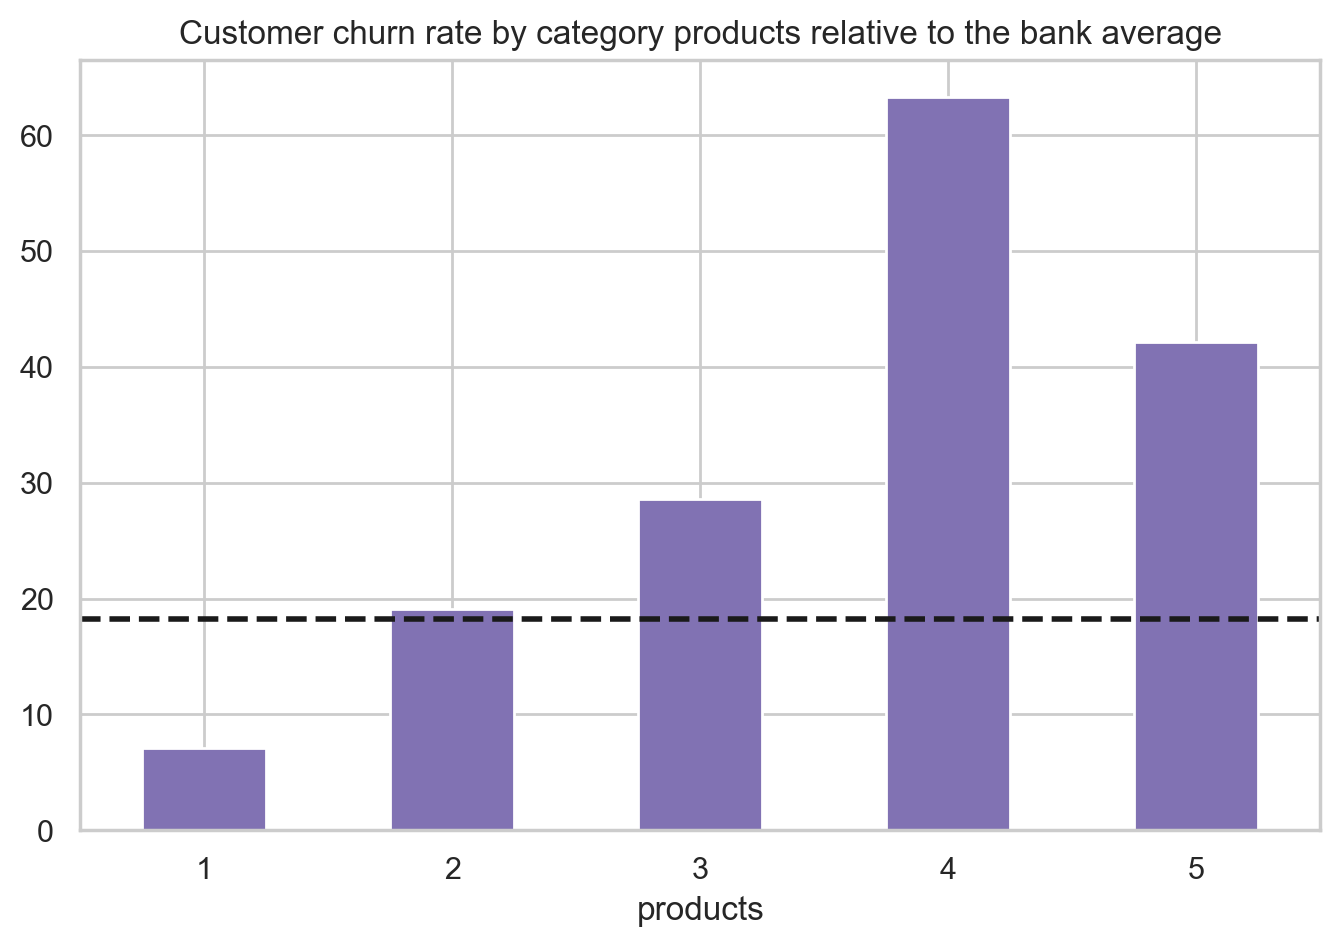

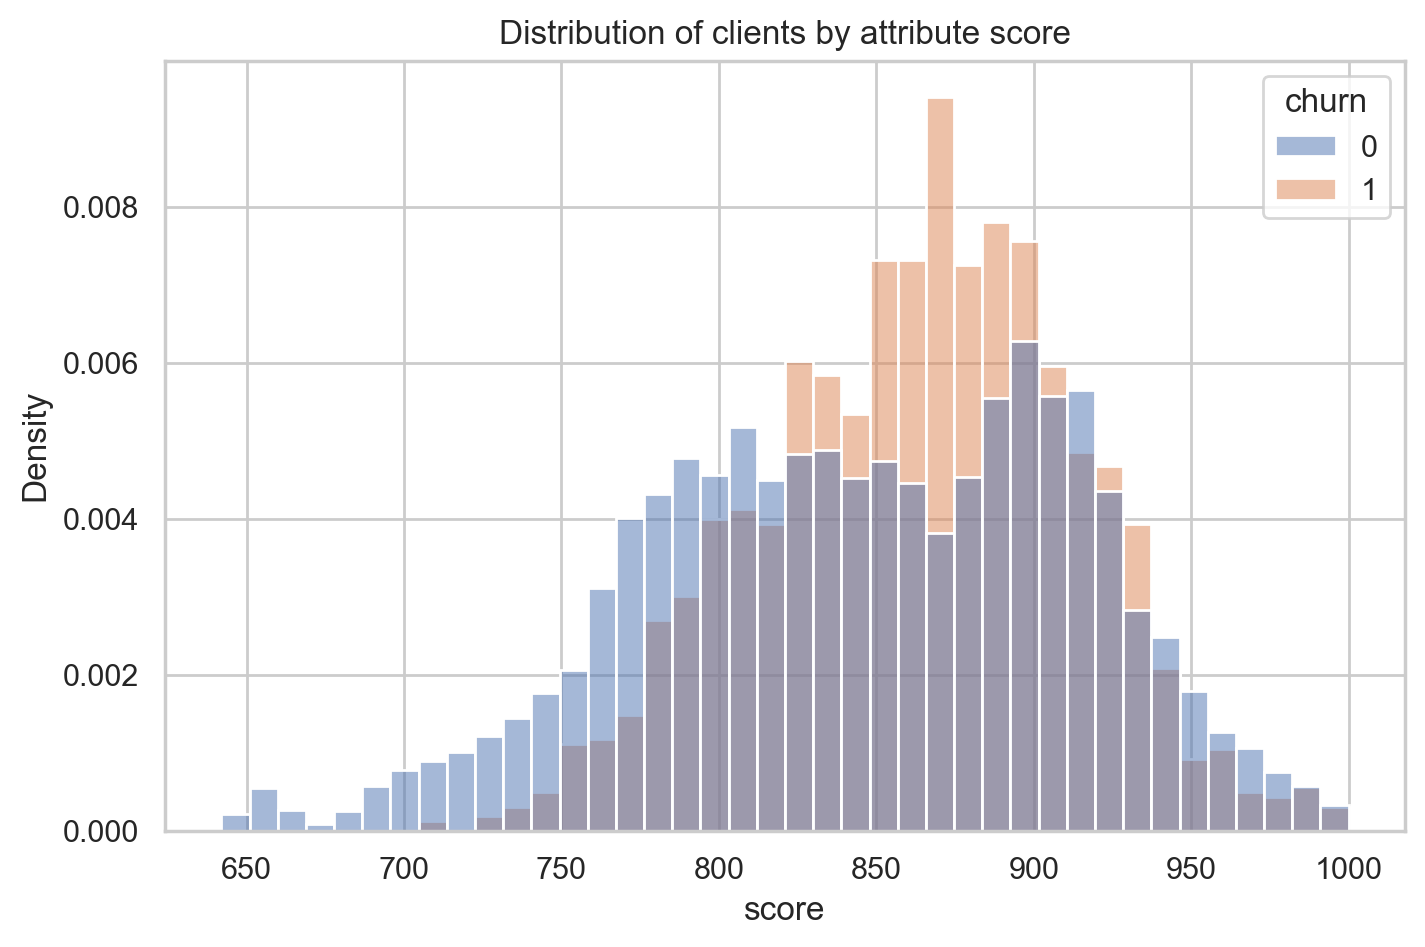

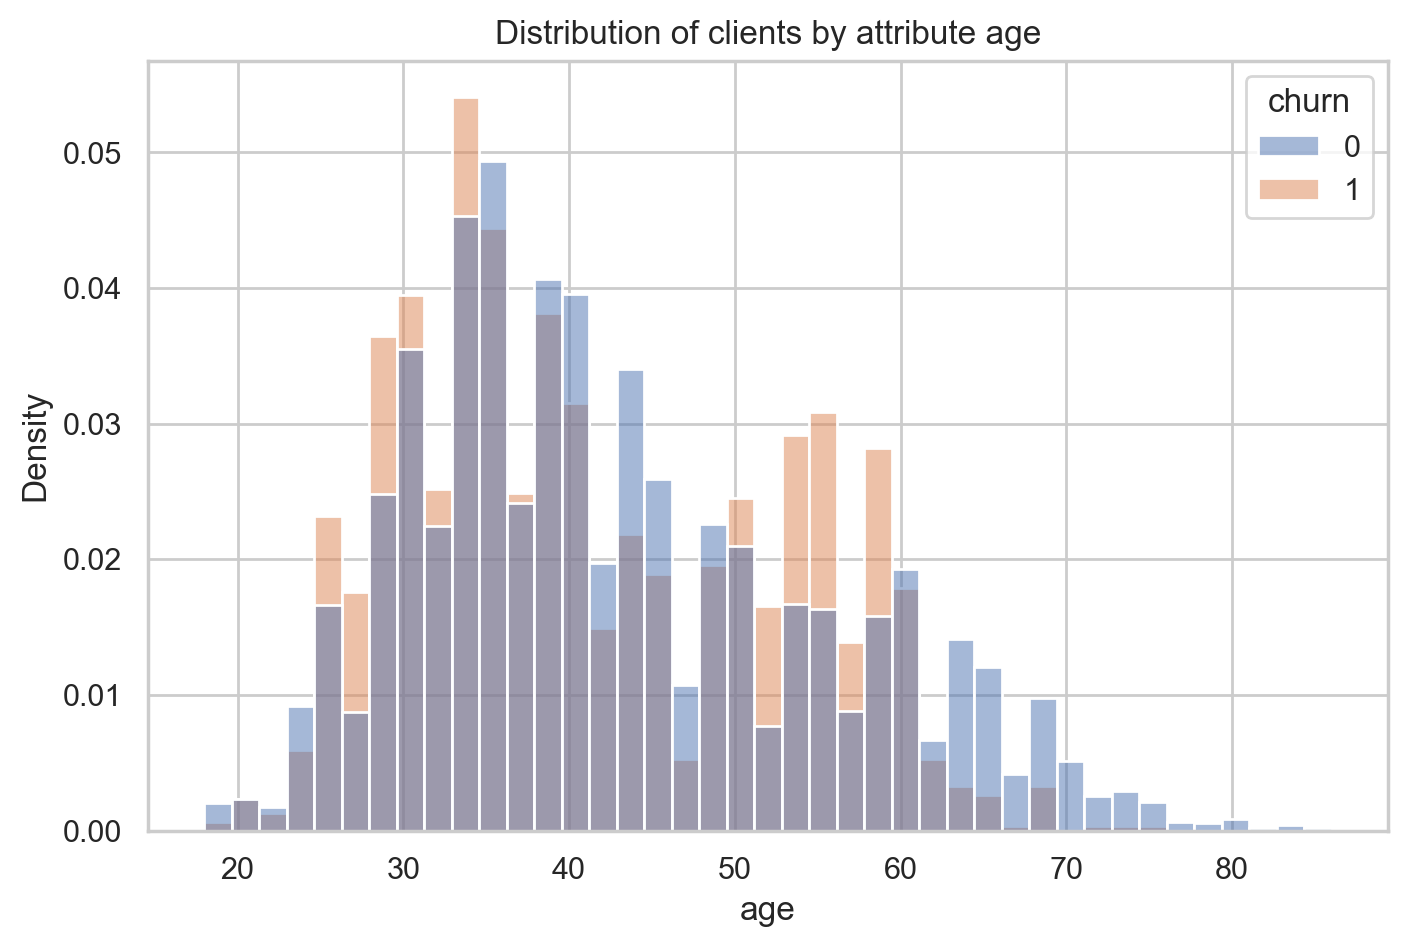

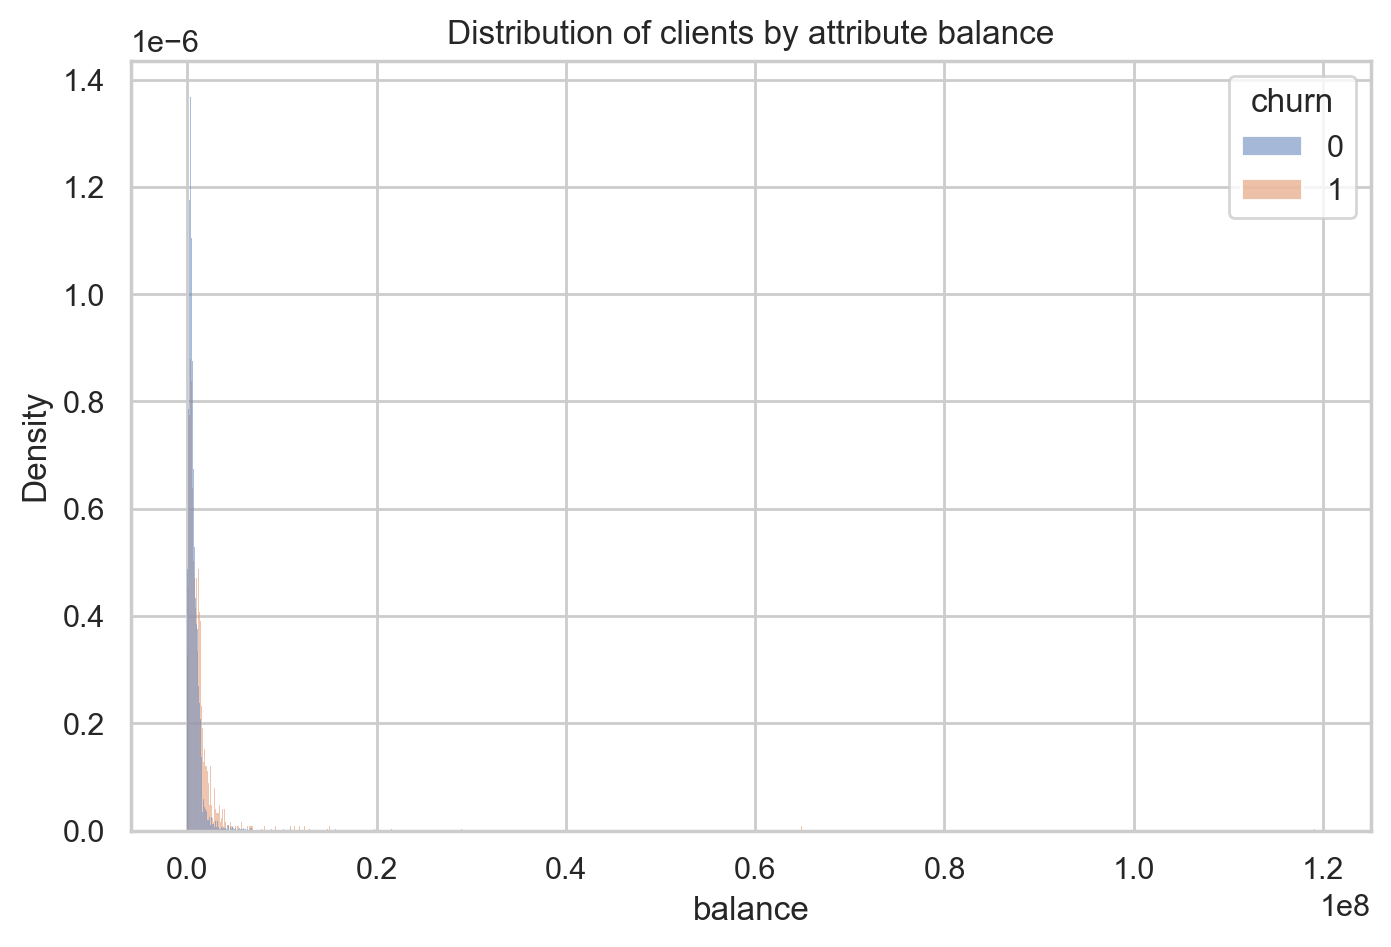

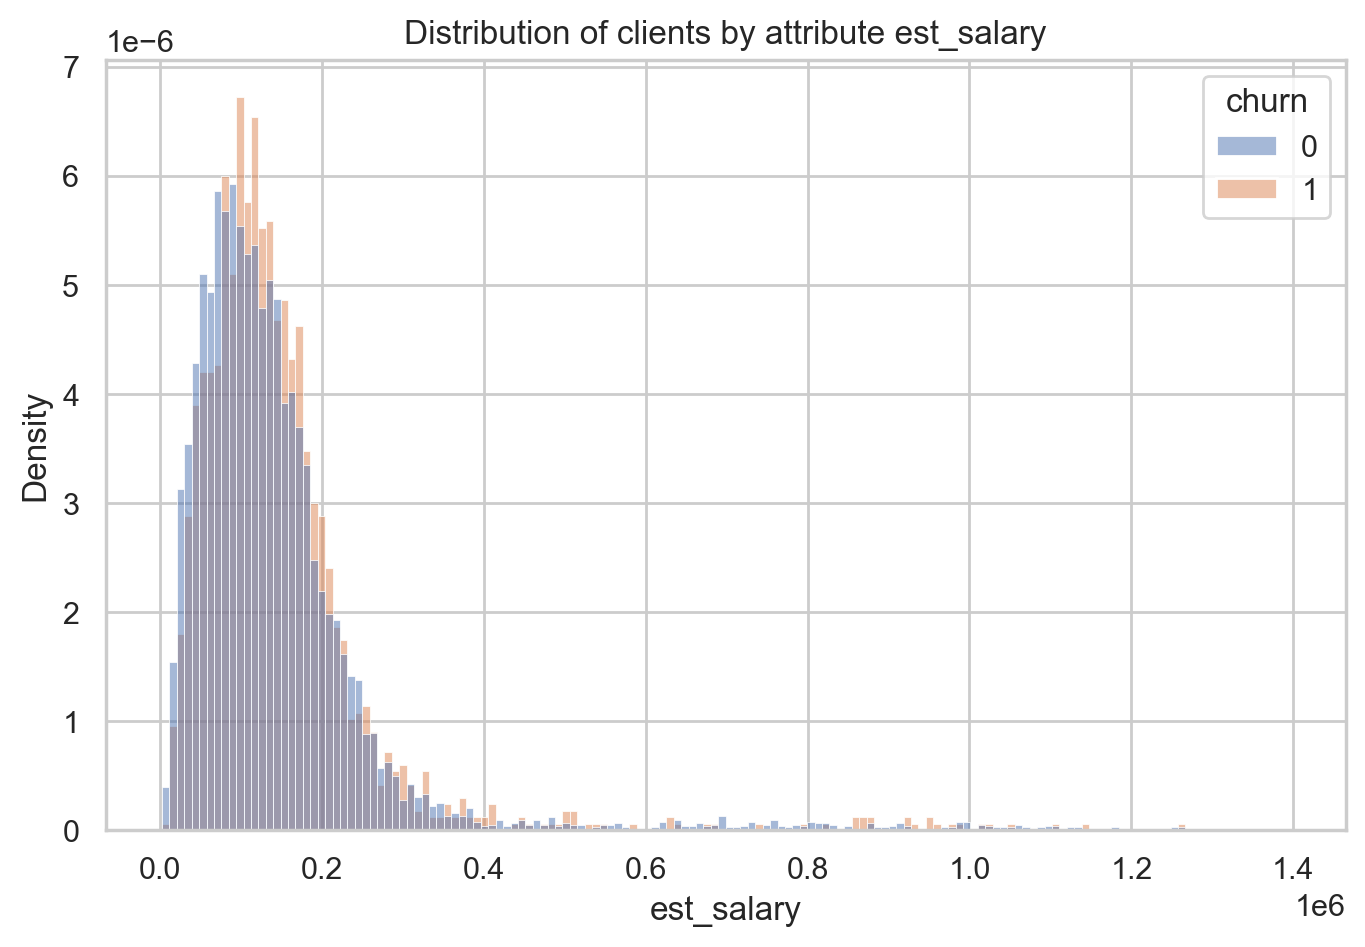

In [88]:
charts(data, 'churn')

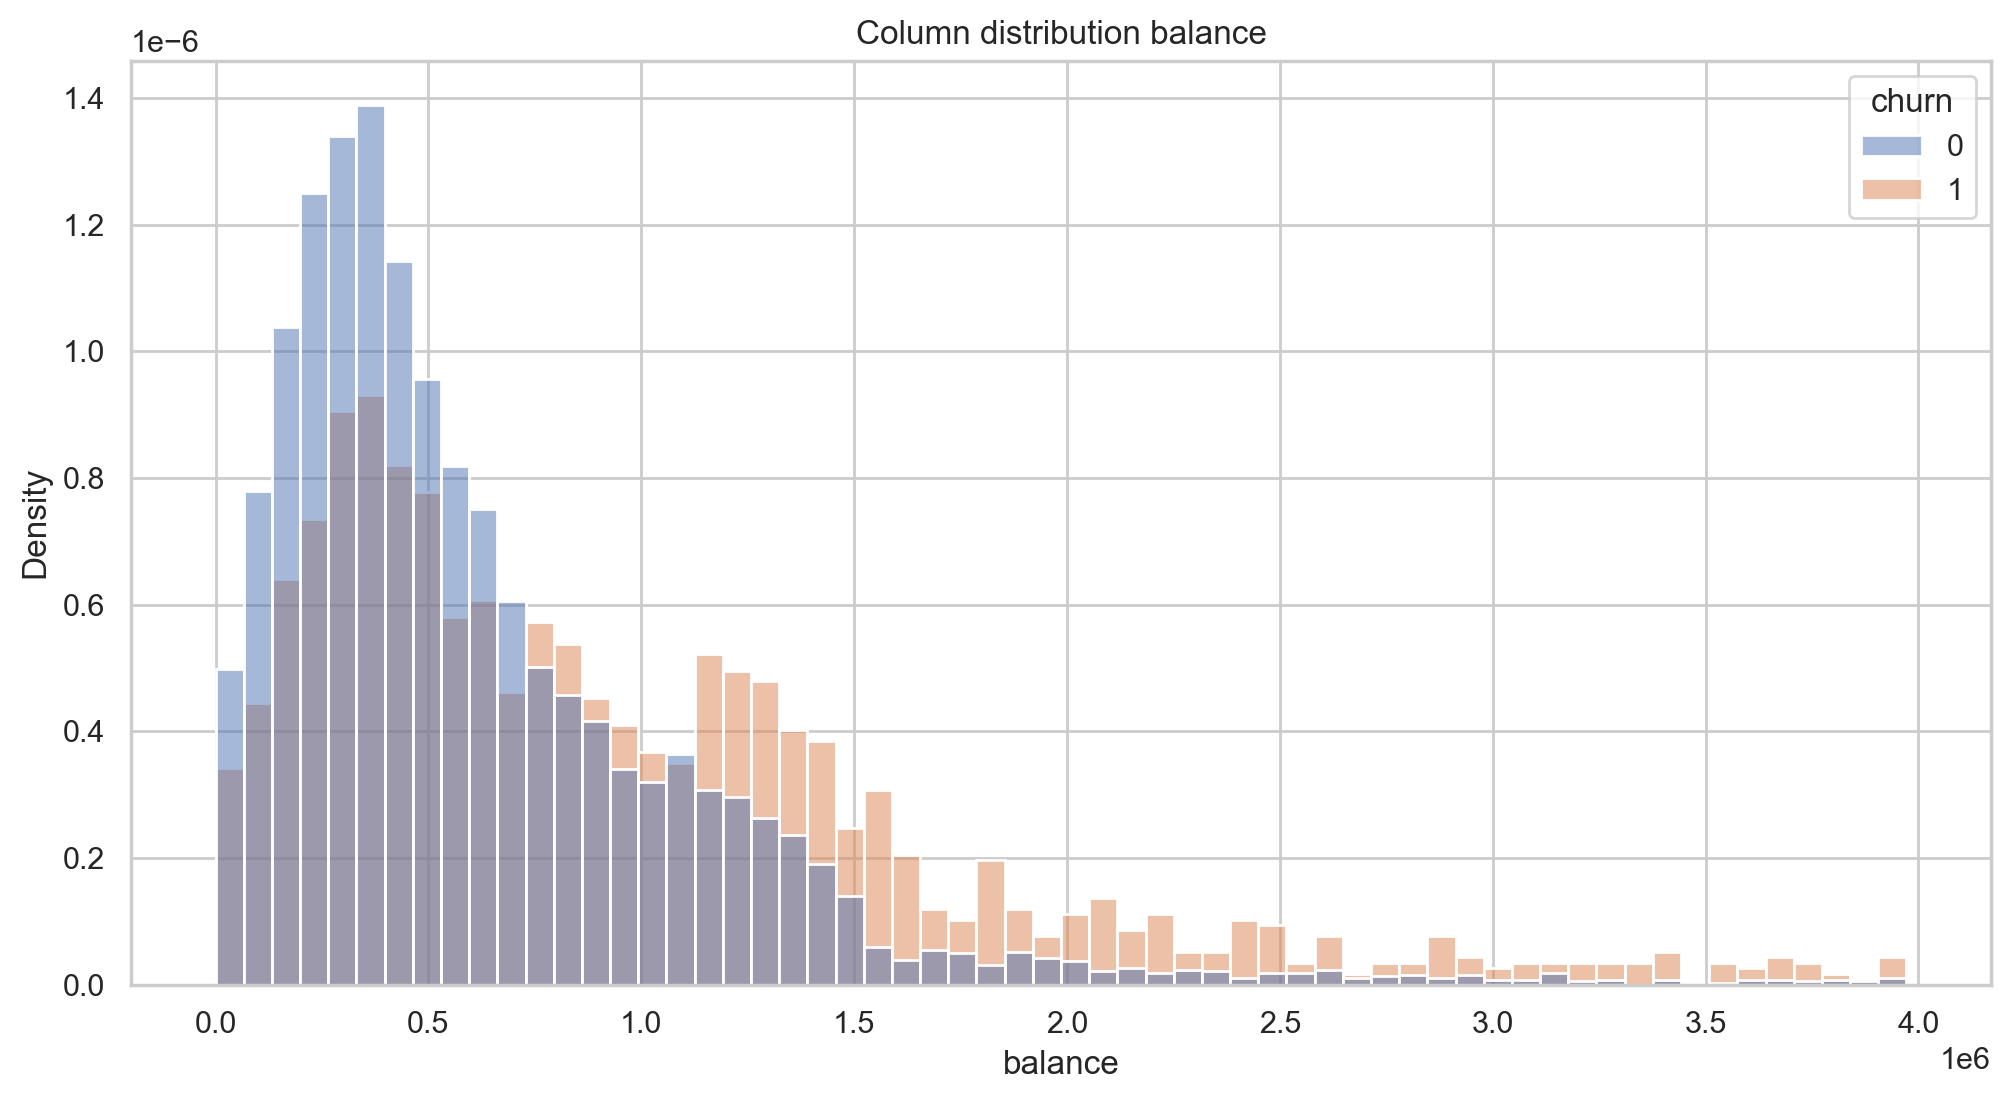

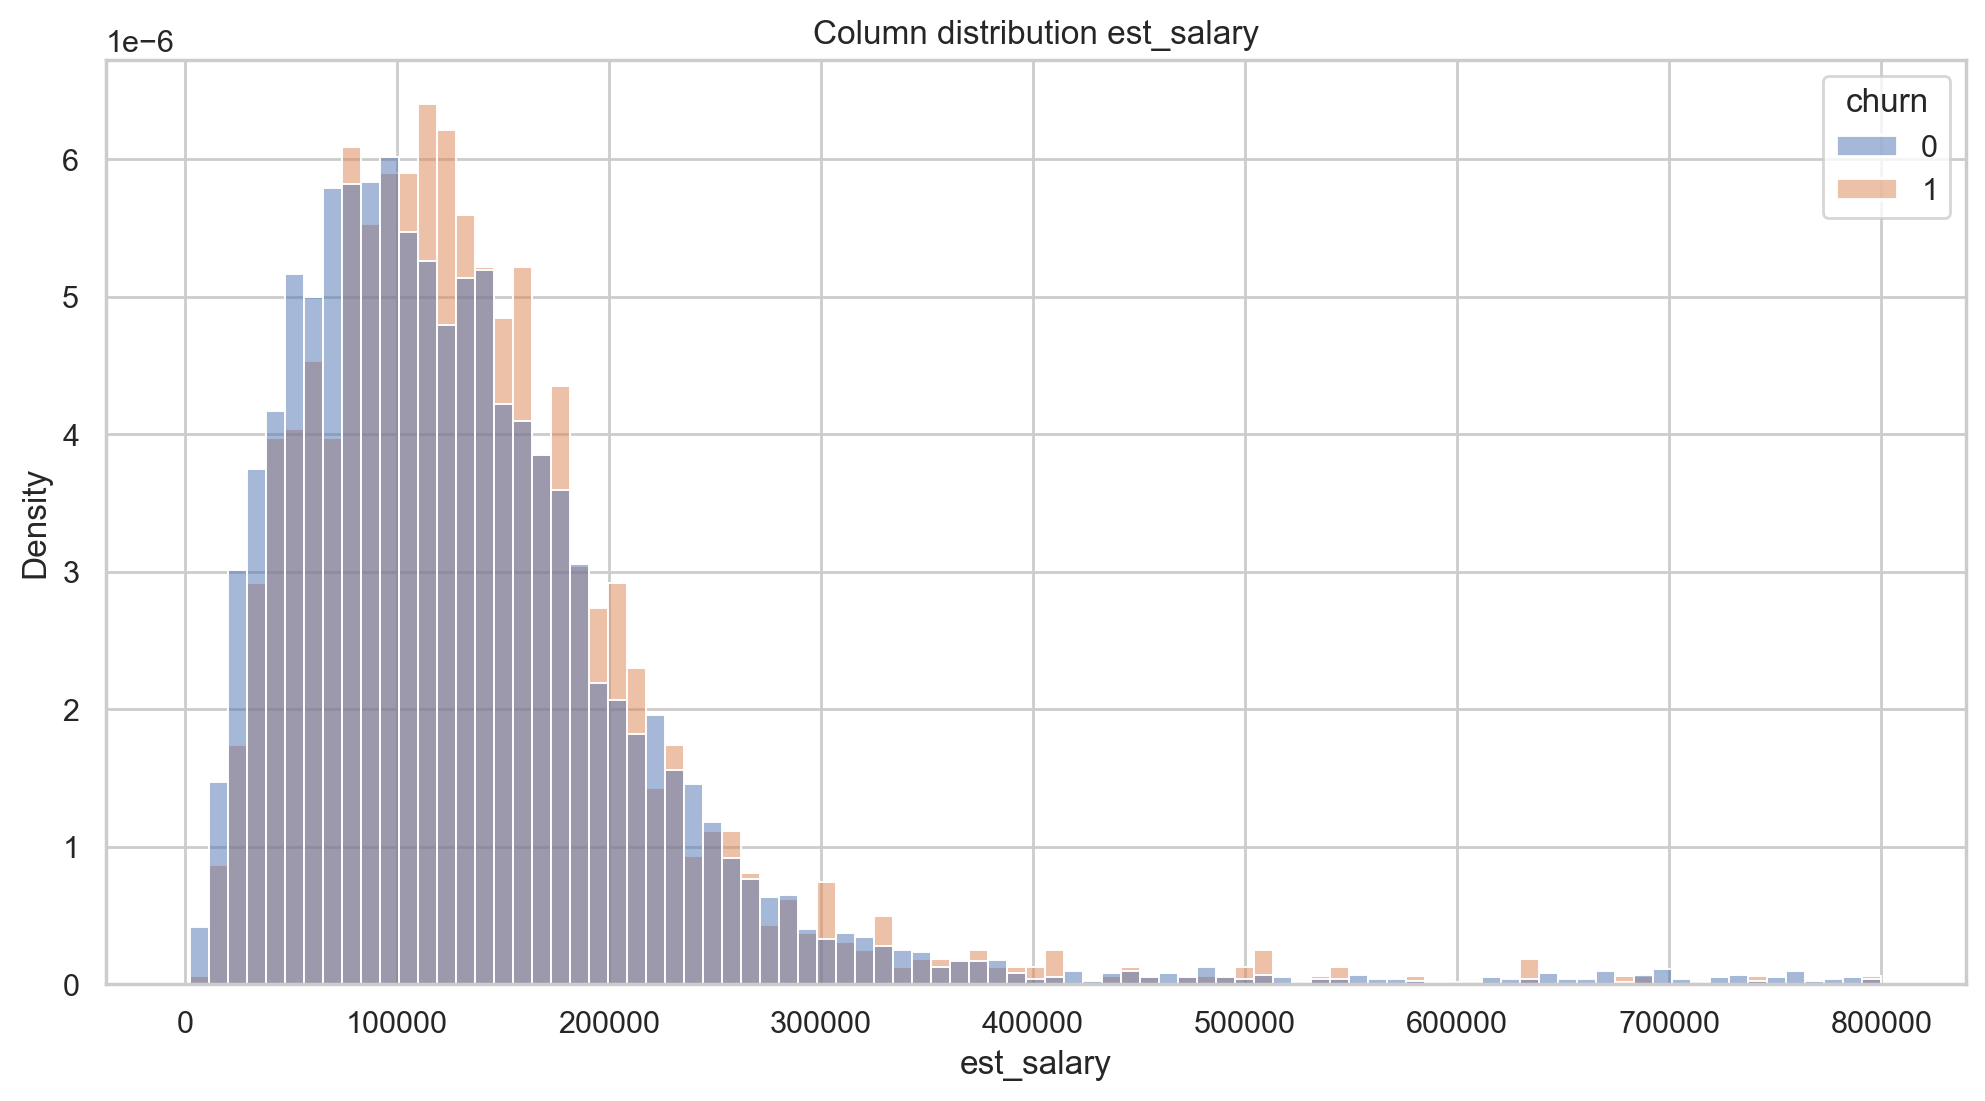

In [89]:
# cuting off values ​​that are too large and rarely encountered to better visualize the graph
plt.figure(figsize = (12, 6))
sns.histplot(data=data, x=data.query('balance < 4000000')['balance'], hue='churn', stat="density",common_norm=False)
plt.title('Column distribution balance')
plt.show()

plt.figure(figsize = (12, 6))
sns.histplot(data=data, x=data.query('est_salary < 800000')['est_salary'], hue='churn', stat="density",common_norm=False)
plt.title('Column distribution est_salary')
plt.show()

Conclusions based on the graphs:

1. The churn rate is higher for males compared to females.
2. The highest churn occurs in the Yaroslavl branch, while the lowest is in Rybinsk.
3. Most churn is among customers without credit cards.
4. Inactive customers are less likely to churn.
5. Customers with ownership scores of 3 or higher are more likely to churn. Over 50% of clients with a property score of 9 are inclined to leave.
6. Customers with more than 3 products are prone to churn.
7. Customers with credit scores between 830 and 900 are prone to churn.
8. Two client age groups are prone to churn: 25–35 years old and 50–60 years old.
9. Clients tend to churn when their balance is 700 thousand or more.
10. Clients with high salaries, over 100 thousand, are more likely to churn.

In [90]:
#Creating a table that categorizes bank clients into churn and non-churn categories based on specific parameters.

portrait = data.groupby(by="churn", as_index=False).agg(
    {
        "score": "median",
        "age": "median",
        "balance": "median",
        "est_salary": "median",
        "equity": "median",
        "products": "median",
        "credit_card": "mean",
        "last_activity": "mean",       
    }
)

rostov = data[data["city_Ростов"] == 1]["churn"].mean() * 100
rostov_1 = 100 - rostov

yaroslavl = data[data["city_Ярославль"] == 1]["churn"].mean() * 100
yaroslavl_1 = 100 - yaroslavl

rybinsk = data[data["city_Рыбинск"] == 1]["churn"].mean() * 100
rybinsk_1 = 100 - rybinsk

male = data[data["gender_М"] == 1]["churn"].mean() * 100
male_1 = 100 - male

female = data[data["gender_Ж"] == 1]["churn"].mean() * 100
female_1 = 100 - female

portrait['city_Ярославль'] = [yaroslavl_1,yaroslavl]
portrait['city_Ростов'] = [rostov_1,rostov]
portrait['city_Рыбинск'] = [rybinsk_1,rybinsk]
portrait['gender_М'] = [male_1,male]
portrait['gender_Ж'] = [female_1,female]

portrait = portrait.T

portrait.columns = ['Non-churn','Churn']

portrait

,Non-churn,Churn
churn,0,1
score,848.00,866.00
age,40.00,39.00
balance,"475,410.09","783,908.90"
est_salary,"118,227.60","125,408.88"
equity,3.00,4.00
products,2.00,2.00
credit_card,0.71,0.55
last_activity,0.48,0.70
city_Ярославль,80.99,19.01


### Correlation analysis of customer parameters and churn

Making the standard Spearman correlation matrix

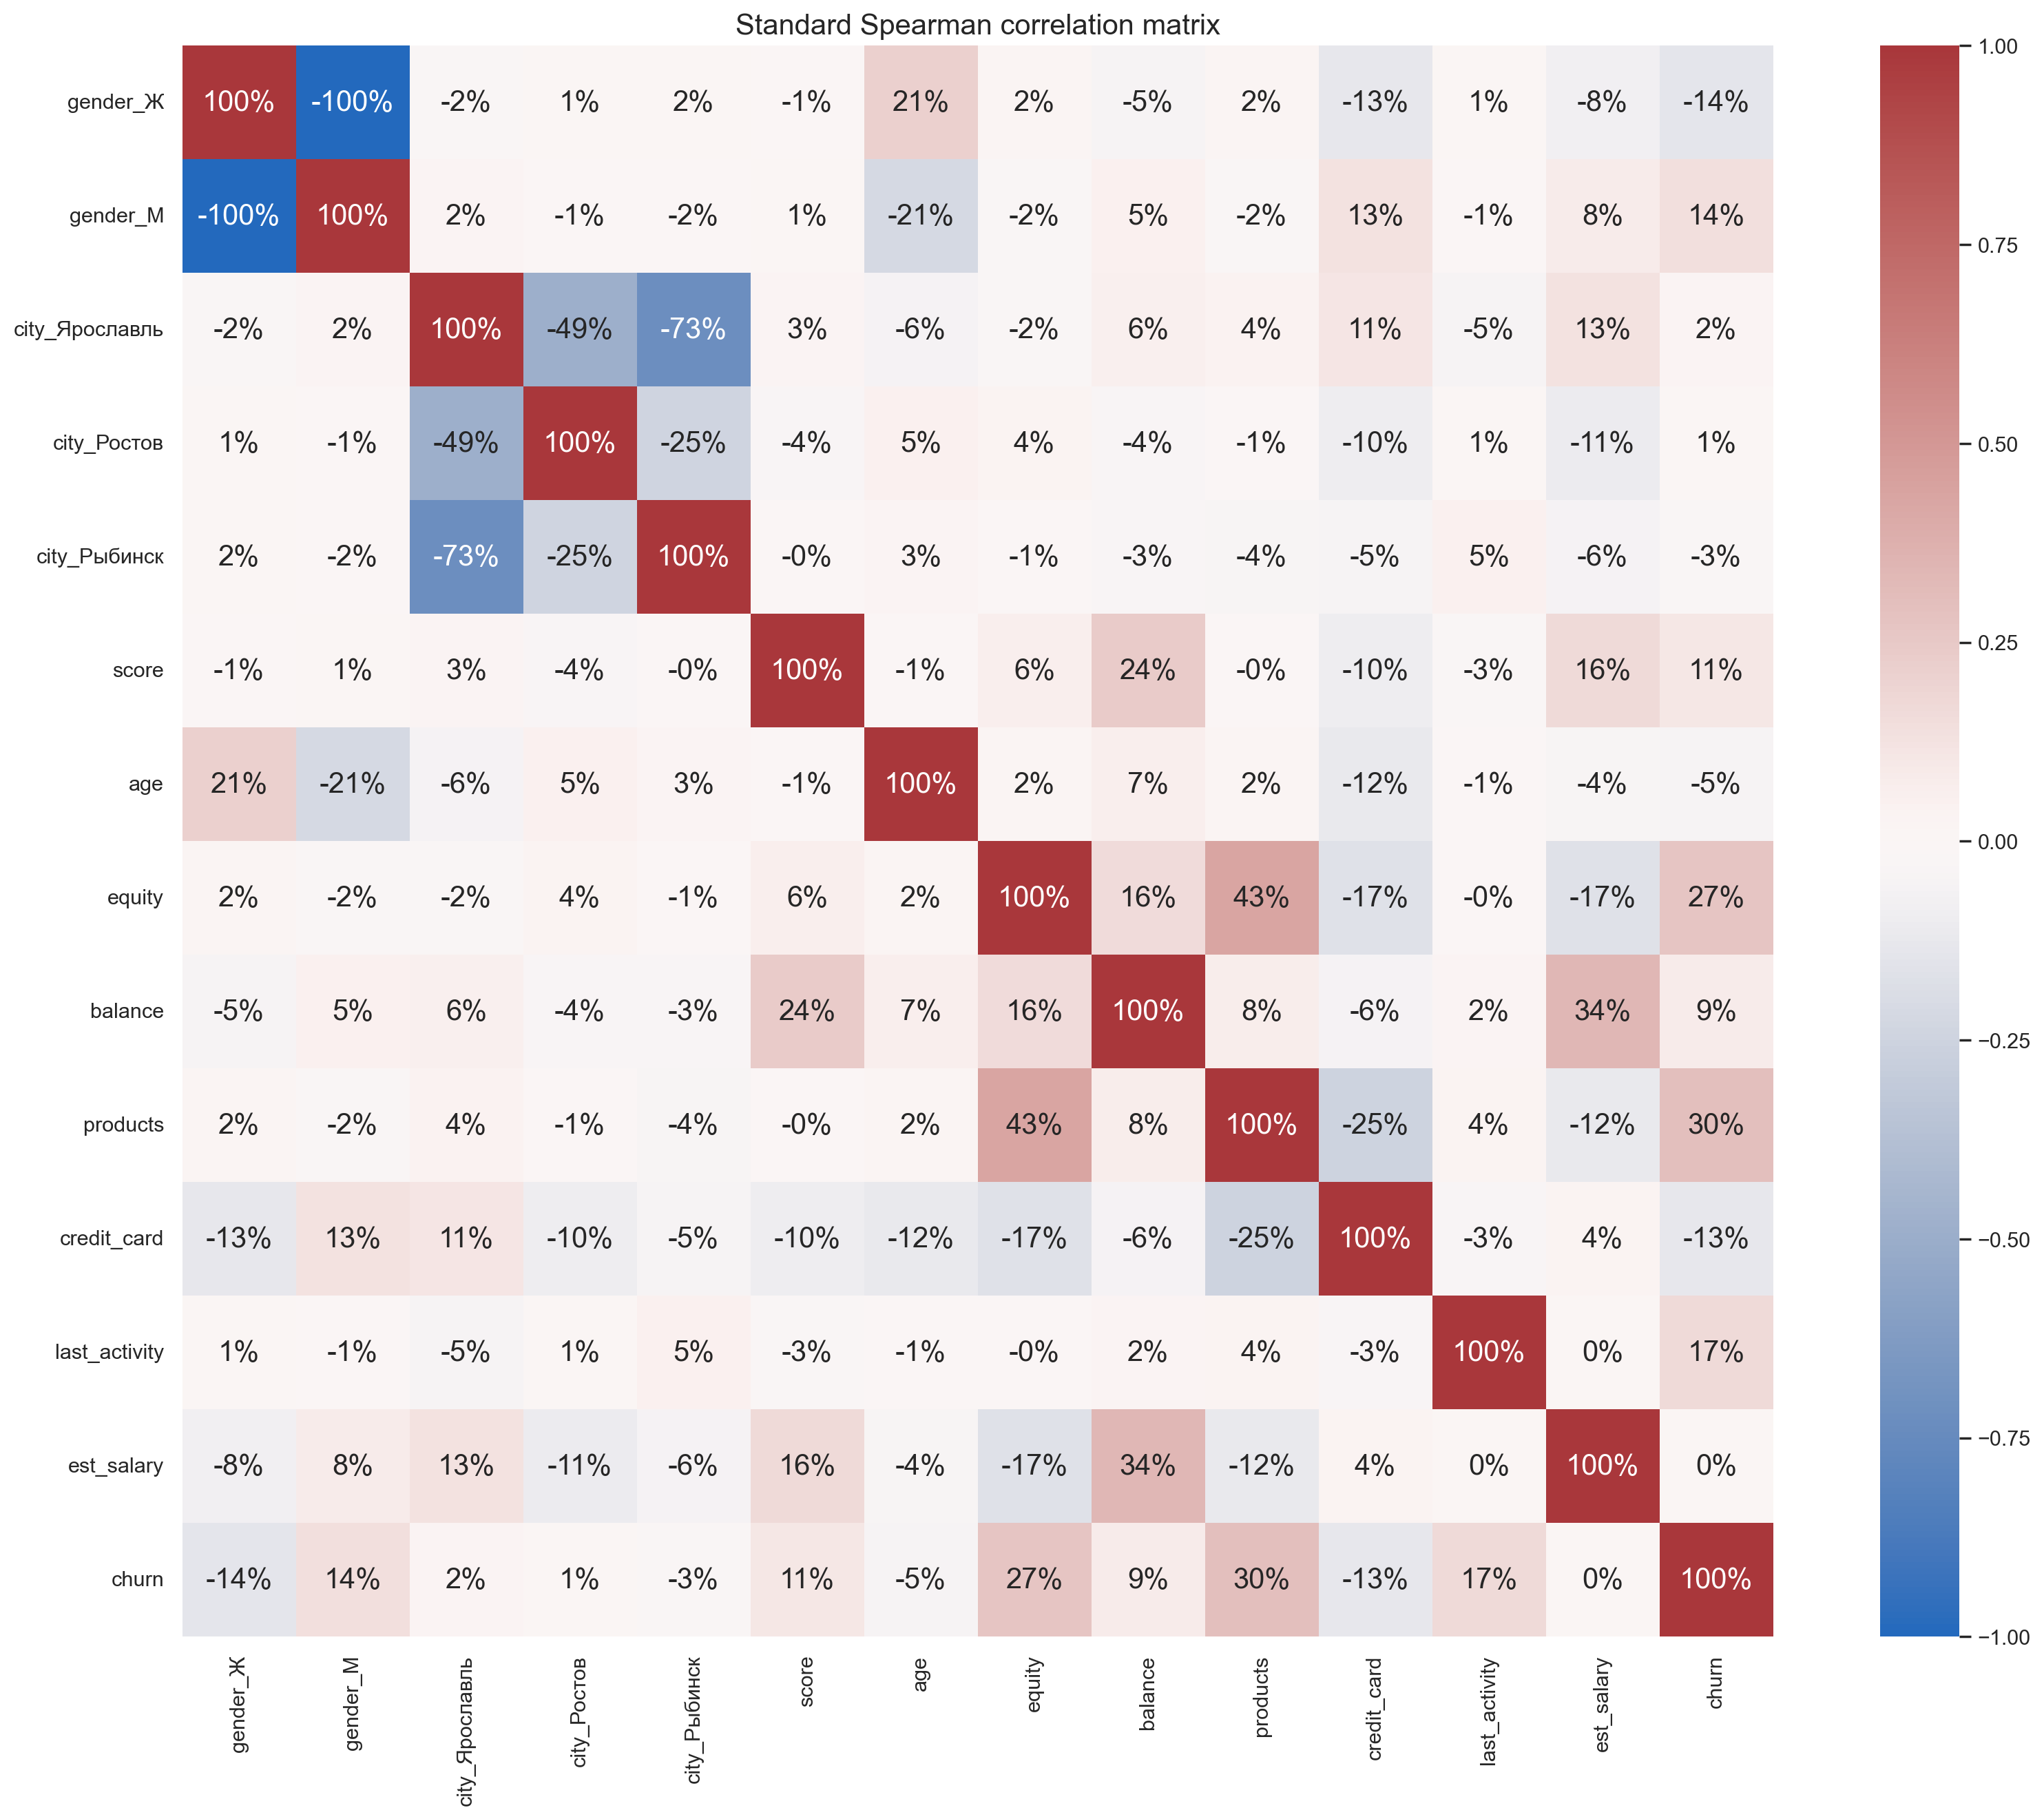

In [91]:
corr_columns = [
    "gender_Ж",
    "gender_М",
    "city_Ярославль",
    "city_Ростов",
    "city_Рыбинск",
    "score",
    "age",
    "equity",
    "balance",
    "products",
    "credit_card",
    "last_activity",
    "est_salary",
    "churn"
]

# Creating a subset of a dataframe with selected columns
data_corr = data[corr_columns]

# Creating a correlation matrix for a subset of a dataframe
corr_matrix = data_corr.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(
    corr_matrix,
    annot=True,
    square=True,
    cmap="vlag",
    annot_kws={"size": 15},
    fmt='.0%',
    center=0,
)
plt.title("Standard Spearman correlation matrix", fontsize=15)
plt.show()

The city and gender columns exhibit a 100% correlation in the correlation matrix because they are perfectly correlated. Each binary column represents a category from the original column, with one having a value of 1 (indicating presence) while the other has a value of 0 (indicating absence), and vice versa.

Based on the Chaddock scale, it can be concluded that there is no significant correlation between client parameters, falling within the range of 50-70%.

A moderate correlation (43%) exists between ownership scores and the number of products, suggesting that various ownership types or having a substantial net worth are linked to the use of diverse banking products.

There is a 34% correlation between salary and balance, which is logical since higher salaries often lead to larger savings in the account.

A 30% correlation exists between churn and the number of products, suggesting that the availability of multiple banking products may drive customers to explore better alternatives.

All other parameters exhibit weak correlations with each other.

It's worth noting that the correlation between churn and other parameters is also weak.

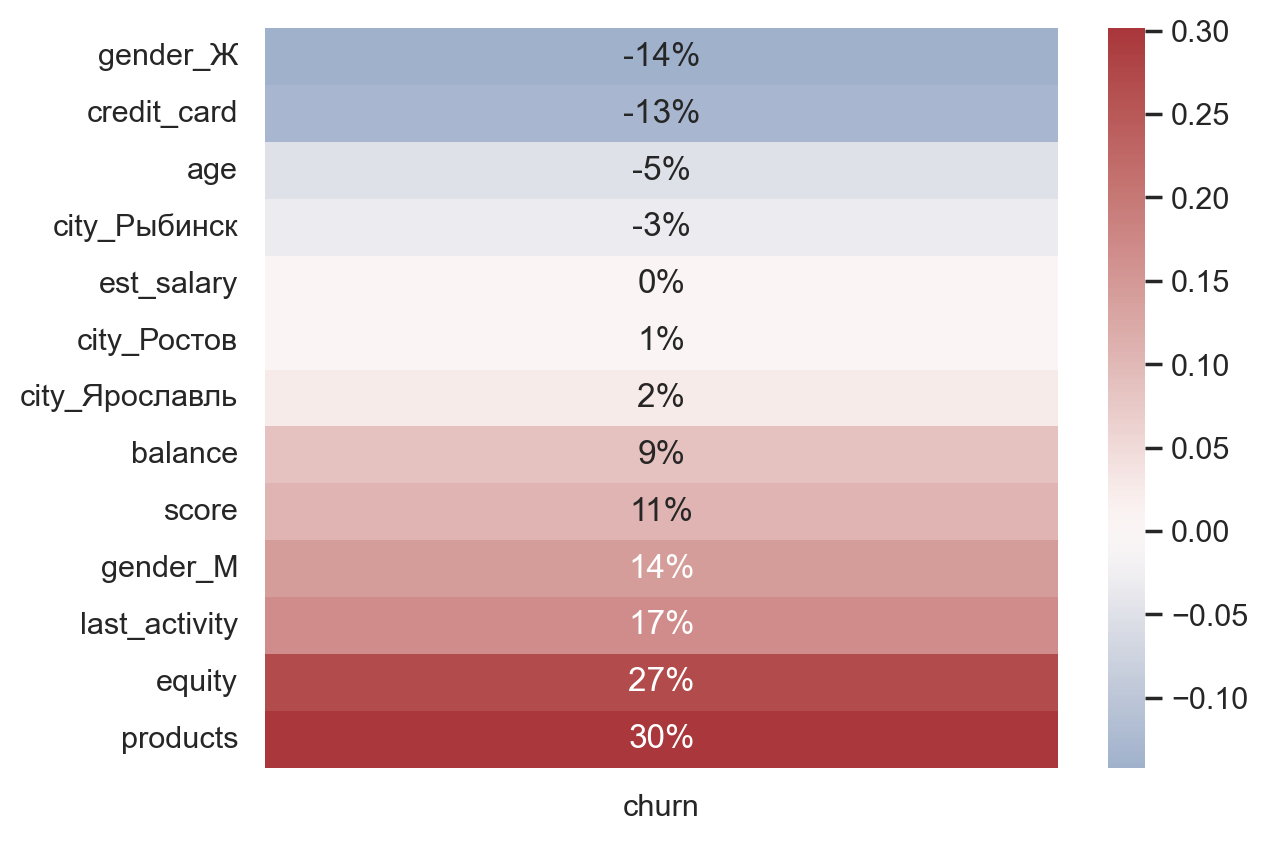

In [92]:
sns.heatmap(corr_matrix.loc[:,['churn']].drop('churn').sort_values('churn'),annot=True,fmt='.0%',cmap='vlag',center=0);

## Statistical analysis and hypothesis testing

### Hypothesis 1.

H0: Income among churned clients and retained clients is equal.

H1: Income among churned clients and retained clients differs.

We will use Student's t-test

Three things to check to see if a t-test can be used:

- Ensure that the observations or data points in your samples are independent.
- The data in each sample should follow a roughly normal distribution.
- The variances (or standard deviations) in the two samples should be approximately equal. 

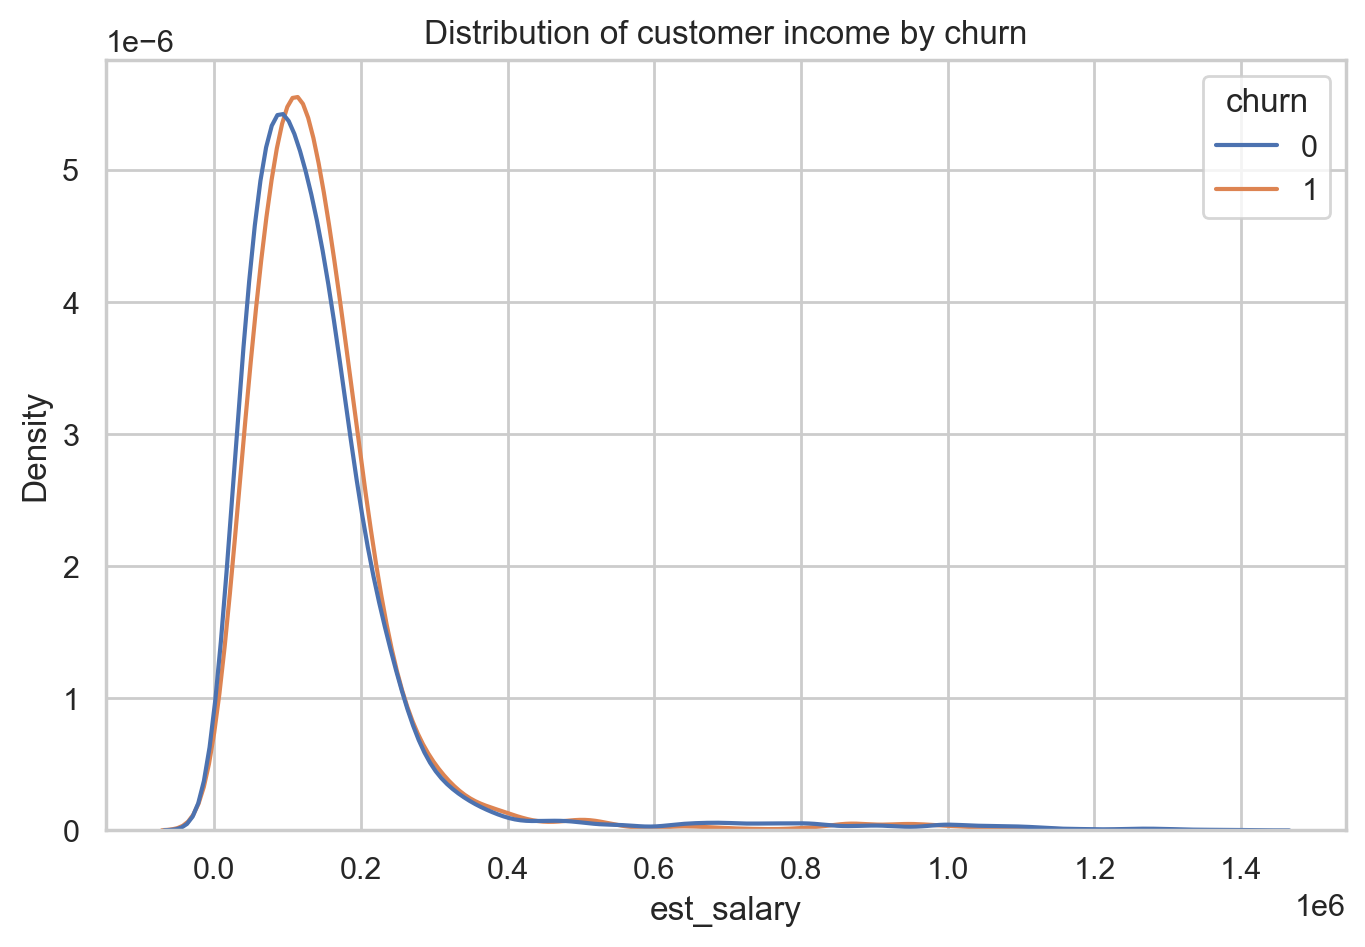

In [93]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=data, x='est_salary', hue='churn', common_norm=False);
plt.title(f'Distribution of customer income by churn')
plt.show()

The aggregates do not depend on each other, the level of income is distributed evenly.

In [94]:
salary_stay = data.query('churn == 0')['est_salary']
salary_churn = data.query('churn == 1')['est_salary']

print('Description salary_stay')
print(salary_stay.describe().round(2))
print('---------------------')
print('Description salary_churn')
print(salary_churn.describe().round(2))

Description salary_stay
count       8,155.00
mean      147,674.64
std       142,684.41
min         2,546.30
25%        73,445.55
50%       118,227.60
75%       173,960.92
max     1,395,064.45
Name: est_salary, dtype: float64
---------------------
Description salary_churn
count       1,818.00
mean      148,357.48
std       122,931.98
min        10,880.27
25%        83,285.66
50%       125,408.88
75%       176,017.84
max     1,263,028.49
Name: est_salary, dtype: float64


There are differences in standard deviations

In [95]:
alpha = 0.05

if np.var(salary_churn)>=np.var(salary_stay):
    print('The dispersion of the salaries of clients who left is higher than the dispersion of those who remained in', np.var(salary_churn)/np.var(salary_stay))
else:
    print('The dispersion of the salaries of the remaining clients is higher than the dispersion of those who left', np.var(salary_stay)/np.var(salary_churn))

The dispersion of the salaries of the remaining clients is higher than the dispersion of those who left 1.3477487698907304


The variances are quite different, so we set the parameter equal_var=False

In [96]:
alpha = 0.05

results = st.ttest_ind(salary_stay, salary_churn, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failing to reject the null hypothesis; there is no statistical difference in client income")

p-value: 0.8354803526840116
Failing to reject the null hypothesis; there is no statistical difference in client income


We will employ an alternative method for comparing samples. The primary distinction between the Mann-Whitney U-test and the Student's t-test lies in their treatment of ranks, focusing on the ordinal positions of values within an ordered series, while disregarding the actual values themselves. Therefore, the Mann-Whitney U-test is employed when the presence of outliers significantly influences the results, making it infeasible to work with the raw values.

In [97]:
alpha = 0.05 

results = st.mannwhitneyu(salary_stay, salary_churn)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failing to reject the null hypothesis; there is no statistical difference in client income") 

p-value:  0.00016830729188229058
Rejecting the null hypothesis


Conclusion: We conducted a hypothesis test to investigate income differences between customers who departed and those who remained. We employed two statistical methods to test this hypothesis: the Student's t-test, which affirmed the null hypothesis indicating no statistical difference in client income, and the Mann-Whitney U-test, which rejected the null hypothesis. The presence of outliers in the salary data significantly impacted the results, making the Mann-Whitney U-test more reliable in this scenario. This suggests a dependency in income between clients who remained and those who left.

### Hypothesis 2.

H0: Scoring among churned clients and retained clients is equal.

H1: Scoring among churned clients and retained clients differs.

In [98]:
alpha = 0.05
score_churn_1 = data[data['churn']==1]['score']
score_churn_0 = data[data['churn']==0]['score']

if np.var(score_churn_1)>=np.var(score_churn_0):
    print('The variance of scoring of clients who left is higher than the variance of those who remained in', np.var(score_churn_1)/np.var(score_churn_0))
else:
    print('The variance of the scoring of remaining clients is higher than the variance of those who left', np.var(score_churn_0)/np.var(score_churn_1))

The variance of the scoring of remaining clients is higher than the variance of those who left 1.881439431856115


The variances are quite different, so we set the parameter equal_var=False

In [99]:
alpha = 0.05

results = st.ttest_ind(score_churn_1.astype('int'), score_churn_0.astype('int'), equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failing to reject the null hypothesis; there is no statistical difference in clients score")

p-value: 1.3179430198200596e-37
Rejecting the null hypothesis


Conclusion: The credit scores of departing and remaining clients differ

## Interim conclusions:

We have identified portraits of typical clients and clients prone to leaving.

**Portrait of an ordinary client:**

- in general, clients have fairly high credit scores (most often 750-950 points)
- average age 40 years
- approximately the same number of male and female clients
- mostly clients have balances from 100 thousand to 600 thousand
- the majority of bank clients have salaries from 50 thousand to 170 thousand rubles
- more than half of clients have a credit card
- Most clients are in Yaroslavl, followed by Rybinsk and Rostov
- 48% of clients are not active
- most clients in the categories who have no property and who have 5 property points
- all clients use the bank’s products, most people use 2 products, followed by a category with 1 product


**Portrait of a churn client:**

- men
- bank branch in Yaroslavl and Rybinsk
- active clients
- presence of property points from 3 and above. More than 50% of clients with a property score of 9 are inclined to leave.
- clients with more than 3 products
- those with a credit rating from 830 to 900 are prone to leaving
- age of clients: 25-35 years and 50-60 years.
- with a significant amount of funds on the balance sheet
- clients with high salaries over 100 thousand
- less likely to have a credit card


A correlation was found between customer churn and parameters such as the number of banking products (30%).

Differences in salaries and average credit scores between clients who left and those who remained are statistically significant.

## Segmentation of churn signs

We conducted an exploratory data analysis and identified signs of churn:

    - clients from Yaroslavl and Rostov
    - men
    - clients with higher credit scores (830-900 points)
    - age groups: 25-35 years and 50-60 years
    - with a high balance and a high salary (from 100 thousand)
    - as property points increase, outflow also increases
    - clients using more than 3 products
    - active clients
    - do not have credit cards

### Segment №1

Segment criteria:

- clients with good credit score 830-900
- clients without a credit card
- active clients

In [100]:
s1 = data[  
    (data["score"] >= 830) & (data["score"] <= 900)
    & (data["credit_card"] == 0)
    & (data["last_activity"] == 1) 
]

s1_n = len(s1)
s1_churn_n = s1[s1["churn"] == 1]["churn"].count()
s1_churn = s1["churn"].mean()
s1_balance = s1[s1['churn']==1]['balance'].sum()

print("Number of clients:", s1_n)
print("Number of clients who left:", s1_churn_n)
print("Churn rate in the segment: {:.2%}".format(s1_churn))
print("Churn clients balance:",round(s1_balance/1000000),'mm')
print("Churn client average balance:",round(s1_balance/s1_churn_n/1000000,2),'mm')

Number of clients: 773
Number of clients who left: 373
Churn rate in the segment: 48.25%
Churn clients balance: 375 mm
Churn client average balance: 1.01 mm


### Segment №2

Segment criteria:

- clients over 50 years old
- male clients
- clients with property points above three

In [101]:
s2 = data[  
    (data['age']>50)
    &(data['gender_copy']=='М')
    &(data["equity"] > 3)       
]

s2_n = len(s2)
s2_churn_n = s2[s2["churn"] == 1]["churn"].count()
s2_churn = s2["churn"].mean()
s2_balance = s2[s2['churn']==1]['balance'].sum()

print("Number of clients:", s2_n)
print("Number of clients who left:", s2_churn_n)
print("Churn rate in the segment: {:.2%}".format(s2_churn))
print("Churn clients balance:",round(s2_balance/1000000),'mm')
print("Churn client average balance:",round(s2_balance/s2_churn_n/1000000,2),'mm')

Number of clients: 402
Number of clients who left: 181
Churn rate in the segment: 45.02%
Churn clients balance: 336 mm
Churn client average balance: 1.86 mm


### Segment №3

Segment criteria:

- young clients 25-35 years old
- clients with good credit score 830-900
- clients who have a credit card
- active clients

In [102]:
s3 = data[
    (data['age']>=25)&(data['age']<=35)
    &(data["score"] >= 830) & (data["score"] <= 900)
    & (data["credit_card"] == 1)
    & (data["last_activity"] == 1)
]

s3_n = len(s3)
s3_churn_n = s3[s3["churn"] == 1]["churn"].count()
s3_churn = s3["churn"].mean()
s3_balance = s3[s3['churn']==1]['balance'].sum()

print("Number of clients:", s3_n)
print("Number of clients who left:", s3_churn_n)
print("Churn rate in the segment: {:.2%}".format(s3_churn))
print("Churn clients balance:",round(s3_balance/1000000),'mm')
print("Churn client average balance:",round(s3_balance/s3_churn_n/1000000,2),'mm')

Number of clients: 427
Number of clients who left: 169
Churn rate in the segment: 39.58%
Churn clients balance: 115 mm
Churn client average balance: 0.68 mm


## Conclusions and recommendations

We conducted a study of Metanprom Bank clients and identified portraits of typical clients and clients prone to leaving.

Portrait of an ordinary client:

- in general, clients have fairly high credit score (most often 750-950 points)
- average age 40 years
- approximately the same number of male and female clients
- mostly clients have balances from 100 thousand to 600 thousand
- the majority of bank clients have salaries from 50 thousand to 170 thousand rubles
- more than half of clients have a credit card
- Most clients are in Yaroslavl, followed by Rybinsk and Rostov
- 48% of clients are not active
- most clients in the categories who have no property and who have 5 property points
- all clients use the bank’s products, most people use 2 products, followed by a category with 1 product

Portrait of a churn client:

- men
- bank branch in Yaroslavl and Rybinsk
- active clients
- presence of property points from 3 and above. More than 50% of clients with a property points of 9 are inclined to leave
- clients with more than 3 products
- those with a credit score from 830 to 900 are prone to leaving
- age of clients: 25-35 years and 50-60 years
- with a significant amount of funds on the balance sheet
- clients with high salaries over 100 thousand
- less likely to have a credit card

A correlation was found between customer churn and parameters such as the number of banking products (30%).

Differences in salaries and average credit scores between clients who left and those who remained are statistically significant.

We have identified 3 high-churn customer segments (churn 39-48% in the segment)

**Segment №1**

Segment criteria:

1. Clients with good credit score 830-900
2. Clients without a credit card
3. Active clients

- Number of clients: 773
- Number of clients who left: 373
- Churn rate in the segment: 48.25%
- Churn client balance: 375 mm
- Churn client average balance: 1.01 mm

Recommendations:

Since clients have a high credit score, the bank can offer them the following benefits without additional risks:

- Attractive credit cards with low interest rates and high limits.
- Cashback programs with increased rewards to select categories that are most interesting to customers.
- Installment purchase options with convenient conditions and flexible terms provided by the bank.

These measures will help attract and retain customers with high credit ratings, despite potential competitive offers.

**Segment №2**

Segment criteria:

1. Clients over 50 years old
2. Male clients
3. Clients with property points above three

- Number of clients: 402
- Number of clients who left: 181
- Churn rate in the segment: 45.02%
- Churn client balance: 336 mm
- Churn client average balance: 1.86 mm

Recommendations:

Considering that these are men over 50 who own property, it makes sense to offer the following beneficial services:

- Providing special mortgage programs with low interest rates or flexible terms to improve and maintain existing properties.
- Develop insurance products focused on protecting clients’ real estate, including insurance against damage and other risks that may arise to property owners.
- Provide favorable conditions for clients when simultaneously owning several properties, such as reduced loan rates and lines of credit secured by real estate.
- Help clients plan inheritance and transfer their real estate to heirs while minimizing tax and legal difficulties.

**Segment №3**

Segment criteria:

1. Young clients 25-35 years old
2. Clients with good credit score 830-900
3. Customers who have a credit card
4. Active clients

- Number of clients: 427
- Number of clients who left: 169
- Churn rate in the segment: 39.58%
- Churn client balance: 115 mm
- Churn client average balance: 0.68 mm

Recommendations:

When working with young clients, you can offer:

- Providing bonus programs, including cashback, bonus points or discounts when using credit cards to pay for goods and services. This may include higher reward categories such as restaurants, travel or online shopping.
- Offering investment products such as mutual funds or robotic portfolios to young clients to build their capital.
- Development of credit products aimed at young clients, with low interest rates and flexible repayment terms.
- Providing educational materials and resources on financial literacy, investing and financial management.